In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df=pd.read_csv('df.csv')

In [75]:
runs=pd.read_csv('runs.csv')

In [76]:
races=pd.read_csv('races.csv')

In [77]:
runs

race_id  horse_no  horse_id  result  won  lengths_behind  horse_age  \
0            0         1      3917      10  0.0            8.00          3   
1            0         2      2157       8  0.0            5.75          3   
2            0         3       858       7  0.0            4.75          3   
3            0         4      1853       9  0.0            6.25          3   
4            0         5      2796       6  0.0            3.75          3   
...        ...       ...       ...     ...  ...             ...        ...   
79442     6348        10      1238       6  0.0            1.25          5   
79443     6348        11       985       7  0.0            2.25          5   
79444     6348        12      3147      10  0.0            3.00          5   
79445     6348        13      1982       8  0.0            2.50          3   
79446     6348        14      3491      11  0.0            4.25          3   

      horse_country horse_type  horse_rating  ...  time2  time3  time4  time5  \
0               AUS    Gelding            60  ...  21.59  23.86  24.62    NaN   
1                NZ    Gelding            60  ...  21.99  23.30  23.70    NaN   
2                NZ    Gelding            60  ...  21.59  23.90  24.22    NaN   
3               SAF    Gelding            60  ...  21.83  23.70  24.00    NaN   
4                GB    Gelding            60  ...  21.75  23.22  23.50    NaN   
...             ...        ...           ...  ...    ...    ...    ...    ...   
79442           AUS    Gelding            87  ...  23.98  23.53  22.52    NaN   
79443            NZ    Gelding            84  ...  24.10  23.77  22.61    NaN   
79444            NZ    Gelding            83  ...  24.06  23.37  22.43    NaN   
79445           AUS    Gelding            82  ...  24.02  23.45  22.29    NaN   
79446           IRE    Gelding            81  ...  24.06  23.77  23.10    NaN   

       time6  finish_time  win_odds  place_odds  trainer_id  jockey_id  
0        NaN        83.92       9.7         3.7         118          2  
1        NaN        83.56      16.0         4.9         164         57  
2        NaN        83.40       3.5         1.5         137         18  
3        NaN        83.62      39.0        11.0          80         59  
4        NaN        83.24      50.0        14.0           9        154  
...      ...          ...       ...         ...         ...        ...  
79442    NaN        96.17      99.0         NaN          73         40  
79443    NaN        96.30      99.0         NaN         164         63  
79444    NaN        96.44      99.0         NaN         111         68  
79445    NaN        96.34       4.6         NaN         118         95  
79446    NaN        96.63      99.0         NaN          27          4  

[79447 rows x 37 columns]

In [78]:
drop_races=['sec_time1','sec_time2','sec_time3','sec_time4','sec_time5','sec_time6','sec_time7',
            'time1','time2','time3','time4','time5','time6','time7',
            'place_combination1','place_combination2','place_combination3','place_combination4',
            'place_dividend1','place_dividend2','place_dividend3','place_dividend4',
            'win_combination1','win_dividend1','win_combination2','win_dividend2','prize']

In [79]:
races.drop(drop_races,axis=1,inplace=True)

In [80]:
races.shape


(6349, 10)

In [81]:
runs.shape

(79447, 37)

Current condition:
- performance in recent races
- time since last race
- recent workout data
- age of horse

Past performance:
- finishing position in past races
- lengths behind winner in past races
- normalized times of past races

Adjustments to past performance:
- strength of competition in past races
-weight carried in past races
-jockey's contribution to past performances
- compensation for bad luck in past races
- compensation for advantageous or disadvantageous post position in past races

Present race situational factors:
- weight to be carried
- today's jockey's ability
- advantages or disadvantages of the assigned post position

Preferences which could influence the horse's performance in today's race:
- distance preference
- surface preference (turfvs dirt)
- condition of surface preference (wet vs dry)
- specific track preference 

In [82]:
#Merge datasets on race_id
df=pd.merge(races,runs,left_on='race_id',right_on='race_id',suffixes=('_races', '_runs'))

In [83]:
df

race_id        date venue  race_no config  surface  distance  \
0            0  1997-06-02    ST        1      A        0      1400   
1            0  1997-06-02    ST        1      A        0      1400   
2            0  1997-06-02    ST        1      A        0      1400   
3            0  1997-06-02    ST        1      A        0      1400   
4            0  1997-06-02    ST        1      A        0      1400   
...        ...         ...   ...      ...    ...      ...       ...   
79442     6348  2005-08-28    ST       10      A        0      1600   
79443     6348  2005-08-28    ST       10      A        0      1600   
79444     6348  2005-08-28    ST       10      A        0      1600   
79445     6348  2005-08-28    ST       10      A        0      1600   
79446     6348  2005-08-28    ST       10      A        0      1600   

              going horse_ratings  race_class  ...  time2  time3  time4  \
0      GOOD TO FIRM         40-15           5  ...  21.59  23.86  24.62   
1      GOOD TO FIRM         40-15           5  ...  21.99  23.30  23.70   
2      GOOD TO FIRM         40-15           5  ...  21.59  23.90  24.22   
3      GOOD TO FIRM         40-15           5  ...  21.83  23.70  24.00   
4      GOOD TO FIRM         40-15           5  ...  21.75  23.22  23.50   
...             ...           ...         ...  ...    ...    ...    ...   
79442          GOOD        100-80           2  ...  23.98  23.53  22.52   
79443          GOOD        100-80           2  ...  24.10  23.77  22.61   
79444          GOOD        100-80           2  ...  24.06  23.37  22.43   
79445          GOOD        100-80           2  ...  24.02  23.45  22.29   
79446          GOOD        100-80           2  ...  24.06  23.77  23.10   

       time5  time6  finish_time win_odds place_odds  trainer_id jockey_id  
0        NaN    NaN        83.92      9.7        3.7         118         2  
1        NaN    NaN        83.56     16.0        4.9         164        57  
2        NaN    NaN        83.40      3.5        1.5         137        18  
3        NaN    NaN        83.62     39.0       11.0          80        59  
4        NaN    NaN        83.24     50.0       14.0           9       154  
...      ...    ...          ...      ...        ...         ...       ...  
79442    NaN    NaN        96.17     99.0        NaN          73        40  
79443    NaN    NaN        96.30     99.0        NaN         164        63  
79444    NaN    NaN        96.44     99.0        NaN         111        68  
79445    NaN    NaN        96.34      4.6        NaN         118        95  
79446    NaN    NaN        96.63     99.0        NaN          27         4  

[79447 rows x 46 columns]

In [84]:
#Fixing the date
df['date'] = (pd.to_datetime(df['date'], infer_datetime_format=True) + pd.to_timedelta('4123 days')).astype(str)

In [85]:
#Creating new id
le = preprocessing.LabelEncoder()

horse_jockey=df.horse_id.apply(lambda x: str(x)) + str('-') + df.jockey_id.apply(lambda x: str(x))
horse_trainer=df.horse_id.apply(lambda x: str(x)) + str('-') + df.trainer_id.apply(lambda x: str(x))
jockey_trainer=df.jockey_id.apply(lambda x: str(x)) + str('-') + df.trainer_id.apply(lambda x: str(x))
horse_jockey_trainer=df.horse_id.apply(lambda x: str(x)) + str('-') + df.jockey_id.apply(lambda x: str(x)) + str('-') + df.trainer_id.apply(lambda x: str(x))

horse_jockey_en=le.fit_transform(horse_jockey)
horse_trainer_en=le.fit_transform(horse_trainer)
jockey_trainer_en=le.fit_transform(jockey_trainer)
horse_jockey_trainer_en=le.fit_transform(horse_jockey_trainer)

df['horse_jockey_id']=horse_jockey_en.astype('int')
df['horse_trainer_id']=horse_trainer_en.astype('int')
df['jockey_trainer_id']=jockey_trainer_en.astype('int')
df['horse_jockey_trainer_id']=horse_jockey_trainer_en.astype('int')

In [86]:
df

race_id        date venue  race_no config  surface  distance  \
0            0  2008-09-15    ST        1      A        0      1400   
1            0  2008-09-15    ST        1      A        0      1400   
2            0  2008-09-15    ST        1      A        0      1400   
3            0  2008-09-15    ST        1      A        0      1400   
4            0  2008-09-15    ST        1      A        0      1400   
...        ...         ...   ...      ...    ...      ...       ...   
79442     6348  2016-12-11    ST       10      A        0      1600   
79443     6348  2016-12-11    ST       10      A        0      1600   
79444     6348  2016-12-11    ST       10      A        0      1600   
79445     6348  2016-12-11    ST       10      A        0      1600   
79446     6348  2016-12-11    ST       10      A        0      1600   

              going horse_ratings  race_class  ...  time6  finish_time  \
0      GOOD TO FIRM         40-15           5  ...    NaN        83.92   
1      GOOD TO FIRM         40-15           5  ...    NaN        83.56   
2      GOOD TO FIRM         40-15           5  ...    NaN        83.40   
3      GOOD TO FIRM         40-15           5  ...    NaN        83.62   
4      GOOD TO FIRM         40-15           5  ...    NaN        83.24   
...             ...           ...         ...  ...    ...          ...   
79442          GOOD        100-80           2  ...    NaN        96.17   
79443          GOOD        100-80           2  ...    NaN        96.30   
79444          GOOD        100-80           2  ...    NaN        96.44   
79445          GOOD        100-80           2  ...    NaN        96.34   
79446          GOOD        100-80           2  ...    NaN        96.63   

       win_odds  place_odds  trainer_id  jockey_id horse_jockey_id  \
0           9.7         3.7         118          2           24344   
1          16.0         4.9         164         57            9814   
2           3.5         1.5         137         18           31953   
3          39.0        11.0          80         59            7325   
4          50.0        14.0           9        154           15116   
...         ...         ...         ...        ...             ...   
79442      99.0         NaN          73         40            2104   
79443      99.0         NaN         164         63           32973   
79444      99.0         NaN         111         68           18025   
79445       4.6         NaN         118         95            8495   
79446      99.0         NaN          27          4           20817   

      horse_trainer_id  jockey_trainer_id horse_jockey_trainer_id  
0                 4316               1165                   25525  
1                 1723               1658                   10289  
2                 5672               1079                   33536  
3                 1277               1698                    7692  
4                 2675                783                   15875  
...                ...                ...                     ...  
79442              376               1498                    2237  
79443             5853               1722                   34601  
79444             3193               1795                   18927  
79445             1463               2145                    8897  
79446             3690               1476                   21831  

[79447 rows x 50 columns]

In [87]:
#homestraight distance
#config = homestraight distance plus width

homestraight=df[['race_id','venue','config']]
homestraight[['homestraight']]=homestraight[['config']]
homestraight[['width']]=homestraight[['config']]
homestraight_ST=homestraight.loc[homestraight.venue == 'ST'].replace({"homestraight": {'A': 430, 'A+2': 430, 'A+3': 430, 'B': 430, 'B+2': 430, 'C': 430, 'C+3': 430, 'NA': '-', 'NA+2': '-', 'NB': '-', 'NB+2': '-', 'AWT': 365}})[['homestraight']]
homestraight_HV=homestraight.loc[homestraight.venue == 'HV'].replace({"homestraight": {'A': 312, 'A+2': 310, 'B': 338, 'B+2': 338, 'B+3': 338, 'C': 334, 'C+3': 335}})[['homestraight']]
width_ST=homestraight.loc[homestraight.venue == 'ST'].replace({"width": {'A': 30.5, 'A+2': 28.5, 'A+3': 27.5, 'B': 26, 'B+2': 24, 'C': 21.3, 'C+3': 18.3, 'NA': 30.5, 'NA+2': 28.5, 'NB': 26, 'NB+2': 24, 'AWT': 22.8}})[['width']]
width_HV=homestraight.loc[homestraight.venue == 'HV'].replace({"width": {'A': 30.5, 'A+2': 28.5, 'B': 26.5, 'B+2': 24.5, 'B+3': 23.5, 'C': 22.5, 'C+3': 19.5}})[['width']]

F:\Anaconda\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [130]:
def stick(df1,df2,cols):
    if type(df1)==pd.core.frame.DataFrame and type(df2)==pd.core.frame.DataFrame:
        col_names=list(df1.columns)
      
    if df1.shape[0]==df2.shape[0]:
          return pd.DataFrame(np.hstack([np.array(df1),np.array(df2)]),columns=cols)

    elif df1.shape[1]==df2.shape[1]:
        return pd.DataFrame(np.vstack([np.array(df1),np.array(df2)]),columns=col_names)

    if type(df1)==np.ndarray and type(df2)==np.ndarray:
      
        if df1.shape[0]==df2.shape[0]:
            return np.hstack([np.array(df1),np.array(df2)])

        elif df1.shape[1]==df2.shape[1]:
            return np.vstack([np.array(df1),np.array(df2)])

In [89]:
homestraight=stick(homestraight_ST,homestraight_HV,['homestraight'])
width=stick(width_ST,width_HV,['width'])

In [90]:
homestraight

homestraight
0               430
1               430
2               430
3               430
4               430
...             ...
79442           338
79443           338
79444           338
79445           338
79446           338

[79447 rows x 1 columns]

In [91]:
df=pd.merge(df,homestraight, left_index=True, right_index=True)
df=pd.merge(df,width, left_index=True, right_index=True)

In [92]:
df

race_id        date venue  race_no config  surface  distance  \
0            0  2008-09-15    ST        1      A        0      1400   
1            0  2008-09-15    ST        1      A        0      1400   
2            0  2008-09-15    ST        1      A        0      1400   
3            0  2008-09-15    ST        1      A        0      1400   
4            0  2008-09-15    ST        1      A        0      1400   
...        ...         ...   ...      ...    ...      ...       ...   
79442     6348  2016-12-11    ST       10      A        0      1600   
79443     6348  2016-12-11    ST       10      A        0      1600   
79444     6348  2016-12-11    ST       10      A        0      1600   
79445     6348  2016-12-11    ST       10      A        0      1600   
79446     6348  2016-12-11    ST       10      A        0      1600   

              going horse_ratings  race_class  ...  win_odds  place_odds  \
0      GOOD TO FIRM         40-15           5  ...       9.7         3.7   
1      GOOD TO FIRM         40-15           5  ...      16.0         4.9   
2      GOOD TO FIRM         40-15           5  ...       3.5         1.5   
3      GOOD TO FIRM         40-15           5  ...      39.0        11.0   
4      GOOD TO FIRM         40-15           5  ...      50.0        14.0   
...             ...           ...         ...  ...       ...         ...   
79442          GOOD        100-80           2  ...      99.0         NaN   
79443          GOOD        100-80           2  ...      99.0         NaN   
79444          GOOD        100-80           2  ...      99.0         NaN   
79445          GOOD        100-80           2  ...       4.6         NaN   
79446          GOOD        100-80           2  ...      99.0         NaN   

       trainer_id  jockey_id  horse_jockey_id  horse_trainer_id  \
0             118          2            24344              4316   
1             164         57             9814              1723   
2             137         18            31953              5672   
3              80         59             7325              1277   
4               9        154            15116              2675   
...           ...        ...              ...               ...   
79442          73         40             2104               376   
79443         164         63            32973              5853   
79444         111         68            18025              3193   
79445         118         95             8495              1463   
79446          27          4            20817              3690   

      jockey_trainer_id horse_jockey_trainer_id  homestraight width  
0                  1165                   25525           430  30.5  
1                  1658                   10289           430  30.5  
2                  1079                   33536           430  30.5  
3                  1698                    7692           430  30.5  
4                   783                   15875           430  30.5  
...                 ...                     ...           ...   ...  
79442              1498                    2237           338  26.5  
79443              1722                   34601           338  26.5  
79444              1795                   18927           338  26.5  
79445              2145                    8897           338  26.5  
79446              1476                   21831           338  26.5  

[79447 rows x 52 columns]

In [93]:
#homestraight time
def rightmost_col(df,feats,name2='rightmost_val'):
  dft=df[feats]
  rightmost_col_idxes=-1*dft.T.isnull().sum() -1 #rightmost col idx
  def get_last(df,i):
    r=list(df.groupby(-1*df.T.isnull().sum() -1))[i][0]
    return list(df.groupby(-1*df.T.isnull().sum() -1))[i][1].iloc[:,r].values
  list123=[]
  name=[]
  for i in range(0,len(list(dft.groupby(rightmost_col_idxes)))):
    list123.append(get_last(dft,i))
    name.append(list(dft.groupby(rightmost_col_idxes))[i][0])
  dic=dict(zip(name, list123))
  dft[name2]=rightmost_col_idxes
  dft.replace({name2: dic},inplace=True)
  return dft[[name2]]

In [94]:
homestraight_time=rightmost_col(df,['time1','time2','time3','time4','time5','time6'],'homestraight_time')
df=pd.merge(df,homestraight_time, left_index=True, right_index=True)

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
F:\Anaconda\lib\site-packages\pandas\core\generic.py:6666: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


In [95]:
#homestraight = homestraight distance/homestraight time
df['homestraight_speed']=df['homestraight']/df['homestraight_time']

In [96]:
df.head()

race_id        date venue  race_no config  surface  distance         going  \
0        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
1        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
2        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
3        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
4        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   

  horse_ratings  race_class  ...  trainer_id  jockey_id  horse_jockey_id  \
0         40-15           5  ...         118          2            24344   
1         40-15           5  ...         164         57             9814   
2         40-15           5  ...         137         18            31953   
3         40-15           5  ...          80         59             7325   
4         40-15           5  ...           9        154            15116   

   horse_trainer_id  jockey_trainer_id  horse_jockey_trainer_id homestraight  \
0              4316               1165                    25525          430   
1              1723               1658                    10289          430   
2              5672               1079                    33536          430   
3              1277               1698                     7692          430   
4              2675                783                    15875          430   

  width  homestraight_time homestraight_speed  
0  30.5              24.62          17.465475  
1  30.5              23.70          18.143460  
2  30.5              24.22          17.753922  
3  30.5              24.00          17.916667  
4  30.5              23.50          18.297872  

[5 rows x 54 columns]

days since last races:

Reoranizng the dataset by horse_id and sorting them by date and race_id in decending order. Then we create an identical dataset but shift the whole date column by -1. We turn the date into days then subtracting the shifted one from the original one to obtain the duration between each races by horse_id. Considering the fact that most of the horse will compete at the age of 2 and assume that the jockeys start to compete at the age of 18, hence we subsitute the missing value in each column with 730 days and 6570 days.

In [97]:
#days since last races
def days_since_last_race(df,id,name,assum):
  date=df.groupby(id).apply(lambda grp: grp.sort_values(by=['date','race_id'],ascending=False))['date']
  date_shifted=df.groupby(id).apply(lambda grp: grp.sort_values(by=['date','race_id'],ascending=False).shift(periods=-1, axis=0))['date']
  date=pd.DataFrame(date.str.split('-').tolist(), columns = ['Year','Month','Day'])
  date_shifted=pd.DataFrame(date_shifted.astype(str).str.split('-').tolist(), columns = ['Year_shifted','Month_Year_shifted','Day_Year_shifted'])
  date=date.astype(float)
  date_shifted=date_shifted.astype(float)
  date[['daysss']]=pd.DataFrame(date['Year']*365+date['Month']*12+date['Day'])
  date_shifted[['daysss_shifted']]=pd.DataFrame(date_shifted['Year_shifted']*365+date_shifted['Month_Year_shifted']*12+date_shifted['Day_Year_shifted'])
  days_since_last_race=pd.DataFrame(date.daysss-date_shifted.daysss_shifted,columns=['days_since_last_race']).fillna(assum)
  return days_since_last_race.rename(columns={'days_since_last_race':'days_since_last_race'+str('_')+str(name)})

In [98]:
days_since_last_race_horse=days_since_last_race(df,'horse_id','horse',730)
days_since_last_race_jockey=days_since_last_race(df,'jockey_id','jockey',6570)

In [99]:
df=pd.merge(df,days_since_last_race_horse,left_index=True,right_index=True)
df=pd.merge(df,days_since_last_race_jockey,left_index=True,right_index=True)

In [100]:
df.head()

race_id        date venue  race_no config  surface  distance         going  \
0        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
1        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
2        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
3        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
4        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   

  horse_ratings  race_class  ...  horse_jockey_id  horse_trainer_id  \
0         40-15           5  ...            24344              4316   
1         40-15           5  ...             9814              1723   
2         40-15           5  ...            31953              5672   
3         40-15           5  ...             7325              1277   
4         40-15           5  ...            15116              2675   

   jockey_trainer_id  horse_jockey_trainer_id  homestraight  width  \
0               1165                    25525           430   30.5   
1               1658                    10289           430   30.5   
2               1079                    33536           430   30.5   
3               1698                     7692           430   30.5   
4                783                    15875           430   30.5   

  homestraight_time homestraight_speed  days_since_last_race_horse  \
0             24.62          17.465475                         2.0   
1             23.70          18.143460                        18.0   
2             24.22          17.753922                         2.0   
3             24.00          17.916667                        25.0   
4             23.50          18.297872                         7.0   

  days_since_last_race_jockey  
0                      1825.0  
1                         0.0  
2                         0.0  
3                      6570.0  
4                         0.0  

[5 rows x 56 columns]

In [101]:
#speed
df['speed']=(df.distance)/(df.finish_time)

In [102]:
df

race_id        date venue  race_no config  surface  distance  \
0            0  2008-09-15    ST        1      A        0      1400   
1            0  2008-09-15    ST        1      A        0      1400   
2            0  2008-09-15    ST        1      A        0      1400   
3            0  2008-09-15    ST        1      A        0      1400   
4            0  2008-09-15    ST        1      A        0      1400   
...        ...         ...   ...      ...    ...      ...       ...   
79442     6348  2016-12-11    ST       10      A        0      1600   
79443     6348  2016-12-11    ST       10      A        0      1600   
79444     6348  2016-12-11    ST       10      A        0      1600   
79445     6348  2016-12-11    ST       10      A        0      1600   
79446     6348  2016-12-11    ST       10      A        0      1600   

              going horse_ratings  race_class  ...  horse_trainer_id  \
0      GOOD TO FIRM         40-15           5  ...              4316   
1      GOOD TO FIRM         40-15           5  ...              1723   
2      GOOD TO FIRM         40-15           5  ...              5672   
3      GOOD TO FIRM         40-15           5  ...              1277   
4      GOOD TO FIRM         40-15           5  ...              2675   
...             ...           ...         ...  ...               ...   
79442          GOOD        100-80           2  ...               376   
79443          GOOD        100-80           2  ...              5853   
79444          GOOD        100-80           2  ...              3193   
79445          GOOD        100-80           2  ...              1463   
79446          GOOD        100-80           2  ...              3690   

       jockey_trainer_id  horse_jockey_trainer_id  homestraight  width  \
0                   1165                    25525           430   30.5   
1                   1658                    10289           430   30.5   
2                   1079                    33536           430   30.5   
3                   1698                     7692           430   30.5   
4                    783                    15875           430   30.5   
...                  ...                      ...           ...    ...   
79442               1498                     2237           338   26.5   
79443               1722                    34601           338   26.5   
79444               1795                    18927           338   26.5   
79445               2145                     8897           338   26.5   
79446               1476                    21831           338   26.5   

       homestraight_time homestraight_speed days_since_last_race_horse  \
0                  24.62          17.465475                        2.0   
1                  23.70          18.143460                       18.0   
2                  24.22          17.753922                        2.0   
3                  24.00          17.916667                       25.0   
4                  23.50          18.297872                        7.0   
...                  ...                ...                        ...   
79442              22.52          15.008881                       22.0   
79443              22.61          14.949138                        3.0   
79444              22.43          15.069104                        8.0   
79445              22.29          15.163751                       -2.0   
79446              23.10          14.632035                      730.0   

       days_since_last_race_jockey      speed  
0                           1825.0  16.682555  
1                              0.0  16.754428  
2                              0.0  16.786571  
3                           6570.0  16.742406  
4                              0.0  16.818837  
...                            ...        ...  
79442                          0.0  16.637205  
79443                          4.0  16.614746  
79444                          0.0  16.590626  
79445                          

In [103]:
#median speed figures from the past 4 competitions
median_speed_past4=df.groupby(['horse_id']).apply(lambda grp: grp.sort_values(by=['date','race_id'],ascending=True)[['speed']].rolling(window=4, min_periods=1).median())
median_speed_past4.reset_index(level='horse_id',drop=True,inplace=True)
median_speed_past4.rename(columns={'speed':'median_speed_past4'},inplace=True)
df=pd.merge(df,median_speed_past4, left_index=True,right_index=True)

In [104]:
df.head()

race_id        date venue  race_no config  surface  distance         going  \
0        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
1        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
2        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
3        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
4        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   

  horse_ratings  race_class  ...  jockey_trainer_id  horse_jockey_trainer_id  \
0         40-15           5  ...               1165                    25525   
1         40-15           5  ...               1658                    10289   
2         40-15           5  ...               1079                    33536   
3         40-15           5  ...               1698                     7692   
4         40-15           5  ...                783                    15875   

   homestraight  width  homestraight_time  homestraight_speed  \
0           430   30.5              24.62           17.465475   
1           430   30.5              23.70           18.143460   
2           430   30.5              24.22           17.753922   
3           430   30.5              24.00           17.916667   
4           430   30.5              23.50           18.297872   

  days_since_last_race_horse days_since_last_race_jockey      speed  \
0                        2.0                      1825.0  16.682555   
1                       18.0                         0.0  16.754428   
2                        2.0                         0.0  16.786571   
3                       25.0                      6570.0  16.742406   
4                        7.0                         0.0  16.818837   

  median_speed_past4  
0          16.682555  
1          16.754428  
2          16.786571  
3          16.742406  
4          16.818837  

[5 rows x 58 columns]

What we did here is just grabing the dataset by horse_id and sort them by date in ascending order. Then by using the rolling median to find the median speed of the past 4 competetions to represent the current condition of the horse, hopefully.

In [105]:
#mead speed figures from the past 4 competitions
mean_speed_past4=df.groupby(['horse_id']).apply(lambda grp: grp.sort_values(by=['date','race_id'],ascending=True)[['speed']].rolling(window=4, min_periods=1).mean())
mean_speed_past4.reset_index(level='horse_id',drop=True,inplace=True)
mean_speed_past4.rename(columns={'speed':'mean_speed_past4'},inplace=True)
df=pd.merge(df,mean_speed_past4, left_index=True,right_index=True)

In [106]:
df.head()

race_id        date venue  race_no config  surface  distance         going  \
0        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
1        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
2        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
3        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
4        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   

  horse_ratings  race_class  ...  horse_jockey_trainer_id  homestraight  \
0         40-15           5  ...                    25525           430   
1         40-15           5  ...                    10289           430   
2         40-15           5  ...                    33536           430   
3         40-15           5  ...                     7692           430   
4         40-15           5  ...                    15875           430   

   width  homestraight_time  homestraight_speed  days_since_last_race_horse  \
0   30.5              24.62           17.465475                         2.0   
1   30.5              23.70           18.143460                        18.0   
2   30.5              24.22           17.753922                         2.0   
3   30.5              24.00           17.916667                        25.0   
4   30.5              23.50           18.297872                         7.0   

  days_since_last_race_jockey      speed  median_speed_past4 mean_speed_past4  
0                      1825.0  16.682555           16.682555        16.682555  
1                         0.0  16.754428           16.754428        16.754428  
2                         0.0  16.786571           16.786571        16.786571  
3                      6570.0  16.742406           16.742406        16.742406  
4                         0.0  16.818837           16.818837        16.818837  

[5 rows x 59 columns]

In [107]:
#win odd only considering the past 4 comps (horse,jockey,trainer)

def get_odd(df,id,name):
  won_sorted=df.groupby([id]).apply(lambda grp: grp.sort_values(by=['date','race_id'],ascending=True))[['won']]
  won_sorted['len']=1
  won_sorted_won=won_sorted[['won']].groupby(id).apply(lambda grp: grp.rolling(window=4,min_periods=1).sum())
  won_sorted_len=won_sorted[['len']].groupby(id).apply(lambda grp: grp.rolling(window=4,min_periods=1).sum())
  won_sorted['odds_horse_past4']=won_sorted_won.won/won_sorted_len.len
  return won_sorted.rename(columns={'odds_horse_past4':str('odds_')+str(name)+str('_past4')}).drop(['won','len'],axis=1).reset_index([id],drop=True)

In [108]:
odds_horse_past4=get_odd(df,'horse_id','horse')
odds_jockey_past4=get_odd(df,'jockey_id','jockey')
odds_trainer_past4=get_odd(df,'trainer_id','trainer')
odds_horse_jockey_past4=get_odd(df,'horse_jockey_id','horse_jockey')
odds_horse_trainer_past4=get_odd(df,'horse_trainer_id','horse_trainer')
odds_jockey_trainer_past4=get_odd(df,'jockey_trainer_id','jockey_trainer')
odds_horse_jockey_trainer_past4=get_odd(df,'horse_jockey_trainer_id','horse_jockey_trainer')

In [109]:
df=pd.merge(df,odds_horse_past4,left_index=True,right_index=True)
df=pd.merge(df,odds_jockey_past4,left_index=True,right_index=True)
df=pd.merge(df,odds_trainer_past4,left_index=True,right_index=True)
df=pd.merge(df,odds_horse_jockey_past4,left_index=True,right_index=True)
df=pd.merge(df,odds_horse_trainer_past4,left_index=True,right_index=True)
df=pd.merge(df,odds_jockey_trainer_past4,left_index=True,right_index=True)
df=pd.merge(df,odds_horse_jockey_trainer_past4,left_index=True,right_index=True)

In [110]:
df.head()

race_id        date venue  race_no config  surface  distance         going  \
0        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
1        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
2        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
3        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
4        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   

  horse_ratings  race_class  ...      speed  median_speed_past4  \
0         40-15           5  ...  16.682555           16.682555   
1         40-15           5  ...  16.754428           16.754428   
2         40-15           5  ...  16.786571           16.786571   
3         40-15           5  ...  16.742406           16.742406   
4         40-15           5  ...  16.818837           16.818837   

   mean_speed_past4  odds_horse_past4  odds_jockey_past4  odds_trainer_past4  \
0         16.682555               0.0                0.0                 0.0   
1         16.754428               0.0                0.0                 0.0   
2         16.786571               0.0                0.0                 0.0   
3         16.742406               0.0                0.0                 0.0   
4         16.818837               0.0                0.0                 0.0   

  odds_horse_jockey_past4 odds_horse_trainer_past4  odds_jockey_trainer_past4  \
0                     0.0                      0.0                        0.0   
1                     0.0                      0.0                        0.0   
2                     0.0                      0.0                        0.0   
3                     0.0                      0.0                        0.0   
4                     0.0                      0.0                        0.0   

  odds_horse_jockey_trainer_past4  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  

[5 rows x 66 columns]

In [111]:
#win odd (horse,jockey,trainer)
def get_odd2(df,id,name):
  won_sorted=df.groupby([id]).apply(lambda grp: grp.sort_values(by=['date','race_id'],ascending=True))[['won']]
  won_sorted['len']=1
  won_sorted_won=won_sorted[['won']].groupby(id).apply(lambda grp: grp.expanding().sum())
  won_sorted_len=won_sorted[['len']].groupby(id).apply(lambda grp: grp.expanding().sum())
  won_sorted['odds_horse_past4']=won_sorted_won.won/won_sorted_len.len
  return won_sorted.rename(columns={'odds_horse_past4':str('odds_')+str(name)}).drop(['won','len'],axis=1).reset_index([id],drop=True)

In [112]:
odds_horse=get_odd2(df,'horse_id','horse')
odds_jockey=get_odd2(df,'jockey_id','jockey')
odds_trainer=get_odd2(df,'trainer_id','trainer')
odds_horse_jockey=get_odd2(df,'horse_jockey_id','horse_jockey')
odds_horse_trainer=get_odd2(df,'horse_trainer_id','horse_trainer')
odds_jockey_trainer=get_odd2(df,'jockey_trainer_id','jockey_trainer')
odds_horse_jockey_trainer=get_odd2(df,'horse_jockey_trainer_id','horse_jockey_trainer')

In [113]:
df=pd.merge(df,odds_horse,left_index=True,right_index=True)
df=pd.merge(df,odds_jockey,left_index=True,right_index=True)
df=pd.merge(df,odds_trainer,left_index=True,right_index=True)
df=pd.merge(df,odds_horse_jockey,left_index=True,right_index=True)
df=pd.merge(df,odds_horse_trainer,left_index=True,right_index=True)
df=pd.merge(df,odds_jockey_trainer,left_index=True,right_index=True)
df=pd.merge(df,odds_horse_jockey_trainer,left_index=True,right_index=True)

In [114]:
df.head()

race_id        date venue  race_no config  surface  distance         going  \
0        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
1        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
2        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
3        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
4        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   

  horse_ratings  race_class  ...  odds_horse_trainer_past4  \
0         40-15           5  ...                       0.0   
1         40-15           5  ...                       0.0   
2         40-15           5  ...                       0.0   
3         40-15           5  ...                       0.0   
4         40-15           5  ...                       0.0   

   odds_jockey_trainer_past4  odds_horse_jockey_trainer_past4  odds_horse  \
0                        0.0                              0.0         0.0   
1                        0.0                              0.0         0.0   
2                        0.0                              0.0         0.0   
3                        0.0                              0.0         0.0   
4                        0.0                              0.0         0.0   

   odds_jockey  odds_trainer odds_horse_jockey odds_horse_trainer  \
0          0.0           0.0               0.0                0.0   
1          0.0           0.0               0.0                0.0   
2          0.0           0.0               0.0                0.0   
3          0.0           0.0               0.0                0.0   
4          0.0           0.0               0.0                0.0   

   odds_jockey_trainer odds_horse_jockey_trainer  
0                  0.0                       0.0  
1                  0.0                       0.0  
2                  0.0                       0.0  
3                  0.0                       0.0  
4                  0.0                       0.0  

[5 rows x 73 columns]

In [115]:
#MSRM: median speed rank of matches
median_rank=df.groupby(['race_id']).apply(lambda grp: grp.sort_values(['date'],ascending=True)[['median_speed_past4']].rank(method='max')).astype(int)
median_rank2=median_rank.rename({'median_speed_past4':'MSRM'},axis=1).reset_index(['race_id'])
df=pd.merge(df,median_rank2[['MSRM']],left_index=True,right_index=True)

In [116]:
df[['result','MSRM']]

result  MSRM
0          10     5
1           8     7
2           7     8
3           9     6
4           6     9
...       ...   ...
79442       6     9
79443       7     2
79444      10     5
79445       8    10
79446      11     3

[79447 rows x 2 columns]

In [117]:
#number of comp participated
no_of_participations=df.groupby(['horse_id']).apply(lambda grp: grp.sort_values(by=['date','race_id'],ascending=True))[['won']]
no_of_participations['len']=1
no_of_participations_sorted_won=no_of_participations[['won']].groupby('horse_id').apply(lambda grp: grp.expanding().sum())
no_of_participations_sorted_len=no_of_participations[['len']].groupby('horse_id').apply(lambda grp: grp.expanding().sum())

In [118]:
no_of_participations_sorted_won.reset_index('horse_id',drop=True,inplace=True)
no_of_participations_sorted_len.reset_index('horse_id',drop=True,inplace=True)
no_of_participations_sorted_won.rename(columns={'won':'no_won'},inplace=True)
no_of_participations_sorted_len.rename(columns={'len':'no_of_participations'},inplace=True)

In [119]:
df=pd.merge(df,no_of_participations_sorted_won.astype(int),left_index=True,right_index=True)
df=pd.merge(df,no_of_participations_sorted_len.astype(int),left_index=True,right_index=True)

In [120]:
#Shifting Features
shift_list=['result','lengths_behind','finish_time','homestraight_speed','homestraight_time','speed','position_sec1','position_sec2','position_sec3','position_sec4','position_sec5','position_sec6',
            'behind_sec1','behind_sec2','behind_sec3','behind_sec4','behind_sec5','behind_sec6','time1','time2','time3','time4','time5','time6','draw','declared_weight','actual_weight','horse_gear']

In [89]:
shift_list2=[]
for i in shift_list:
  shift_list2.append(str('last_')+str(i))

In [90]:
res = {shift_list[i]: shift_list2[i] for i in range(len(shift_list))}

In [91]:
def shift(df,list123,res):
  shifted=df.groupby(['horse_id']).apply(lambda grp: grp.sort_values(by=['date','race_id'],ascending=False).shift(periods=-1, axis=0))[list123].reset_index(level='horse_id').rename(columns=res).drop('horse_id',axis=1)
  return shifted

In [92]:
shift_list=['median_speed_past4',
'mean_speed_past4',
'odds_horse_past4',
'odds_jockey_past4',
'odds_trainer_past4',
'odds_horse_jockey_past4',
'odds_horse_trainer_past4',
'odds_jockey_trainer_past4',
'odds_horse_jockey_trainer_past4',
'odds_horse',
'odds_jockey',
'odds_trainer',
'odds_horse_jockey',
'odds_horse_trainer',
'odds_jockey_trainer',
'odds_horse_jockey_trainer']

In [93]:
shifted=shift(df,shift_list,res)

In [94]:
shifted

last_median_speed_past4  last_mean_speed_past4  last_odds_horse_past4  \
78360                16.753125              16.713558               0.000000   
77675                16.753125              16.712348               0.000000   
77070                16.915183              16.793377               0.000000   
76574                16.961737              16.816654               0.000000   
76264                16.826205              16.733529               0.000000   
...                        ...                    ...                    ...   
16732                16.768656              16.826971               0.250000   
15987                16.982734              16.917769               0.333333   
15429                17.140390              17.140390               0.500000   
14606                17.298045              17.298045               0.000000   
14168                      NaN                    NaN                    NaN   

       last_odds_jockey_past4  last_odds_trainer_past4  \
78360                    0.00                     0.00   
77675                    0.00                     0.00   
77070                    0.25                     0.00   
76574                    0.00                     0.00   
76264                    0.00                     0.00   
...                       ...                      ...   
16732                    0.75                     0.75   
15987                    0.00                     0.00   
15429                    0.50                     0.25   
14606                    0.00                     0.00   
14168                     NaN                      NaN   

       last_odds_horse_jockey_past4  last_odds_horse_trainer_past4  \
78360                      0.000000                       0.000000   
77675                      0.000000                       0.000000   
77070                      0.000000                       0.000000   
76574                      0.000000                       0.000000   
76264                      0.000000                       0.000000   
...                             ...                            ...   
16732                      0.333333                       0.250000   
15987                      0.000000                       0.333333   
15429                      0.500000                       0.500000   
14606                      0.000000                       0.000000   
14168                           NaN                            NaN   

       last_odds_jockey_trainer_past4  last_odds_horse_jockey_trainer_past4  \
78360                            0.00                              0.000000   
77675                            0.00                              0.000000   
77070                            0.00                              0.000000   
76574                            0.00                              0.000000   
76264                            0.00                              0.000000   
...                               ...                                   ...   
16732                            0.75                              0.333333   
15987                            0.00                              0.000000   
15429                            0.50                              0.500000   
14606                            0.00                              0.000000   
14168                             NaN                                   NaN   

       last_odds_horse  last_odds_jockey  last_odds_trainer  \
78360         0.105263          0.053194           0.083333   
77675         0.108108          0.052916           0.084656   
77070         0.111111          0.053377           0.086331   
76574         0.114286          0.043011           0.087193   
76264         0.117647          0.000000           0.089035   
...                ...               ...                ...   
16732         0.250000          0.119205           0.129310   
15987         0.333333          0.047348           0.12

In [95]:
df=pd.merge(df,shifted,left_index=True,right_index=True)

'DOK' - this variable equals one if the horse finished in the upper 50th percentile or within 6.25 lengths of the winner in a prior race within 1/16 of a mile of today's distance, or zero otherwise

In [126]:
#DOK
df[['DOK']]=df[['last_lengths_behind']]
df[['DOK']]=df[['DOK']].apply(lambda x: (x<6.25)).replace({True:1,False:0})

'NEWDIST' - this variable equals one if a horse has run three of its four previous races at a distance less than a mile, zero otherwise. (Note: Bolton and Chapman's model was only used to predict races of 1 - 1.25 miles.)

In [127]:
#NEWDIST
def NEWDIST(df,dis):
  df[[str('NEWDIST'+str('_')+str(dis))]]=df[['distance']]
  df[[str('NEWDIST'+str('_')+str(dis))]]=df[[str('NEWDIST'+str('_')+str(dis))]].apply(lambda x: (x>=dis)).replace({True:1,False:0})
  return 

In [128]:
NEWDIST(df,1200)
NEWDIST(df,1400)
NEWDIST(df,1600)
NEWDIST(df,1000)
NEWDIST(df,1650)
NEWDIST(df,1800)
NEWDIST(df,2200)
NEWDIST(df,2000)
NEWDIST(df,2400)

In [129]:
NEWDIST=df.groupby('horse_id').apply(lambda grp: grp.sort_values(by=['date','race_id'],ascending=True).rolling(window=4,min_periods=3).sum())[['NEWDIST_1200', 'NEWDIST_1400', 'NEWDIST_1600', 'NEWDIST_1000','NEWDIST_1650', 'NEWDIST_1800', 'NEWDIST_2200', 'NEWDIST_2000','NEWDIST_2400']]
NEWDIST2=(NEWDIST>=3)
NEWDIST2=NEWDIST2.replace({True:1,False:0,np.NaN:0})

In [130]:
NEWDIST2=NEWDIST2.reset_index('horse_id',drop=True)
df.drop(['NEWDIST_1200', 'NEWDIST_1400', 'NEWDIST_1600', 'NEWDIST_1000','NEWDIST_1650', 'NEWDIST_1800', 'NEWDIST_2200', 'NEWDIST_2000','NEWDIST_2400'],axis=1,inplace=True)

In [131]:
df=pd.merge(df,NEWDIST2,left_index=True,right_index=True)

In [132]:
#gear changed
df[['gear_changed']]=(df['horse_gear']==df['last_horse_gear']).to_frame().rename(columns={0:'gear_changed'})
df[['gear_changed']]=df[['gear_changed']].replace({True:0,False:1})

In [133]:
df[['gear_changed']]

gear_changed
0                 1
1                 1
2                 1
3                 1
4                 1
...             ...
79442             0
79443             0
79444             0
79445             0
79446             0

[79447 rows x 1 columns]

In [145]:
df.head()

race_id        date venue  race_no config  surface  distance         going  \
0        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
1        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
2        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
3        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
4        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   

  horse_ratings  race_class  ...  NEWDIST_1200  NEWDIST_1400  NEWDIST_1600  \
0         40-15           5  ...             0             0             0   
1         40-15           5  ...             0             0             0   
2         40-15           5  ...             0             0             0   
3         40-15           5  ...             0             0             0   
4         40-15           5  ...             0             0             0   

   NEWDIST_1000  NEWDIST_1650  NEWDIST_1800 NEWDIST_2200 NEWDIST_2000  \
0             0             0             0            0            0   
1             0             0             0            0            0   
2             0             0             0            0            0   
3             0             0             0            0            0   
4             0             0             0            0            0   

   NEWDIST_2400 gear_changed  
0             0            1  
1             0            1  
2             0            1  
3             0            1  
4             0            1  

[5 rows x 115 columns]

In [149]:
shift_list2=['gear_changed','NEWDIST_1000','NEWDIST_1200','NEWDIST_1400','NEWDIST_1600','NEWDIST_1650','NEWDIST_1800','NEWDIST_2000','NEWDIST_2200','NEWDIST_2400']

In [151]:
def shift(df,shift_list,id):
  shift_list2=[]
  for i in shift_list:
    shift_list2.append(str('last_')+str(i))

  res = {shift_list[i]: shift_list2[i] for i in range(len(shift_list))}

  shifted=df.groupby([id]).apply(lambda grp: grp.sort_values(by=['date','race_id'],ascending=False).shift(periods=-1, axis=0))[shift_list].reset_index(level=id).rename(columns=res).drop(id,axis=1)
  return shifted

In [152]:
shifted_2=shift(df,shift_list2,'horse_id')

In [153]:
shifted_2

last_gear_changed  last_NEWDIST_1000  last_NEWDIST_1200  \
78360                0.0                1.0                1.0   
77675                0.0                1.0                1.0   
77070                0.0                1.0                1.0   
76574                0.0                1.0                1.0   
76264                0.0                1.0                1.0   
...                  ...                ...                ...   
16732                0.0                1.0                1.0   
15987                0.0                1.0                0.0   
15429                0.0                0.0                0.0   
14606                1.0                0.0                0.0   
14168                NaN                NaN                NaN   

       last_NEWDIST_1400  last_NEWDIST_1600  last_NEWDIST_1650  \
78360                1.0                1.0                0.0   
77675                1.0                1.0                0.0   
77070                1.0                1.0                0.0   
76574                1.0                1.0                0.0   
76264                1.0                1.0                0.0   
...                  ...                ...                ...   
16732                0.0                0.0                0.0   
15987                0.0                0.0                0.0   
15429                0.0                0.0                0.0   
14606                0.0                0.0                0.0   
14168                NaN                NaN                NaN   

       last_NEWDIST_1800  last_NEWDIST_2000  last_NEWDIST_2200  \
78360                0.0                0.0                0.0   
77675                0.0                0.0                0.0   
77070                0.0                0.0                0.0   
76574                0.0                0.0                0.0   
76264                0.0                0.0                0.0   
...                  ...                ...                ...   
16732                0.0                0.0                0.0   
15987                0.0                0.0                0.0   
15429                0.0                0.0                0.0   
14606                0.0                0.0                0.0   
14168                NaN                NaN                NaN   

       last_NEWDIST_2400  
78360                0.0  
77675                0.0  
77070                0.0  
76574                0.0  
76264                0.0  
...                  ...  
16732                0.0  
15987                0.0  
15429                0.0  
14606                0.0  
14168                NaN  

[79447 rows x 10 columns]

In [154]:
df=pd.merge(df,shifted_2,left_index=True,right_index=True)

In [155]:
df.head()

race_id        date venue  race_no config  surface  distance         going  \
0        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
1        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
2        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
3        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
4        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   

  horse_ratings  race_class  ...  last_gear_changed  last_NEWDIST_1000  \
0         40-15           5  ...                NaN                NaN   
1         40-15           5  ...                NaN                NaN   
2         40-15           5  ...                NaN                NaN   
3         40-15           5  ...                NaN                NaN   
4         40-15           5  ...                NaN                NaN   

   last_NEWDIST_1200  last_NEWDIST_1400  last_NEWDIST_1600  last_NEWDIST_1650  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  last_NEWDIST_1800 last_NEWDIST_2000  last_NEWDIST_2200 last_NEWDIST_2400  
0               NaN               NaN                NaN               NaN  
1               NaN               NaN                NaN               NaN  
2               NaN               NaN                NaN               NaN  
3               NaN               NaN                NaN               NaN  
4               NaN               NaN                NaN               NaN  

[5 rows x 125 columns]

In [157]:
#No. of detour
df['no_detour'] = df[['distance', 'venue','surface']].astype(str).agg('-'.join, axis=1)
df[['no_detour']]=df[['no_detour']].replace({'1400-ST-0':1, '1200-ST-0':1, '1600-ST-0':1, '1000-ST-0':0, '1650-HV-0':2,'1200-HV-0':1, '1000-HV-0':1, '1200-ST-1':1, '1800-HV-0':2, '1800-ST-0':1,'1650-ST-1':2, '2200-HV-0':3, '2000-ST-0':2, '1800-ST-1':2, '2400-ST-0':2,'1600-HV-0':1, '1400-HV-0':2, '2200-ST-0':2})

In [15]:
#No. of straight
df['no_straight'] = df[['distance', 'venue','surface']].astype(str).agg('-'.join, axis=1)
df[['no_straight']]=df[['no_straight']].replace({'1400-ST-0':2, '1200-ST-0':2, '1600-ST-0':2, '1000-ST-0':1, '1650-HV-0':4,'1200-HV-0':3, '1000-HV-0':2, '1200-ST-1':2, '1800-HV-0':2, '1800-ST-0':4,'1650-ST-1':3, '2200-HV-0':5, '2000-ST-0':4, '1800-ST-1':3, '2400-ST-0':5,'1600-HV-0':4, '1400-HV-0':3, '2200-ST-0':5})

In [22]:
#straight to detour ratio
df['sd_ratio']=df['no_straight']/df['no_detour']

In [158]:
df.head()

race_id        date venue  race_no config  surface  distance         going  \
0        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
1        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
2        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
3        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
4        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   

  horse_ratings  race_class  ...  last_NEWDIST_1000  last_NEWDIST_1200  \
0         40-15           5  ...                NaN                NaN   
1         40-15           5  ...                NaN                NaN   
2         40-15           5  ...                NaN                NaN   
3         40-15           5  ...                NaN                NaN   
4         40-15           5  ...                NaN                NaN   

   last_NEWDIST_1400  last_NEWDIST_1600  last_NEWDIST_1650  last_NEWDIST_1800  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  last_NEWDIST_2000 last_NEWDIST_2200  last_NEWDIST_2400 no_detour  
0               NaN               NaN                NaN         1  
1               NaN               NaN                NaN         1  
2               NaN               NaN                NaN         1  
3               NaN               NaN                NaN         1  
4               NaN               NaN                NaN         1  

[5 rows x 126 columns]

In [81]:
# horse_country_type
df['horse_country_type']=df.horse_country.astype(str)+str('_')+df.horse_type.astype(str)

In [11]:
# venue_surface
df['venue_surface']=df.venue.astype(str)+str('_')+df.surface.astype(str)

In [12]:
# venue_surface_going
df['venue_surface_going']=df.venue.astype(str)+str('_')+df.surface.astype(str)+str('_')+df.going.astype(str)

In [13]:
# distance_race_class_hkjc
df['distance_race_class_hkjc']=df.distance.astype(str)+str('_')+df.race_class_hkjc.astype(str)+str('_')+df.going.astype(str)

In [28]:
#Race class hkjc
classes = pd.IntervalIndex.from_tuples([(0, 40), (41, 60), (61, 80),(81,100),(101,120)])

horse_ratings1=pd.DataFrame(df["horse_ratings"].str.split('-').tolist(), columns = ['horse_ratings1','horse_ratings2']).replace({'G':-1,None:-1}).horse_ratings1.str.replace('+', '').fillna(-1).astype(int)
horse_ratings2=pd.DataFrame(df["horse_ratings"].str.split('-').tolist(), columns = ['horse_ratings1','horse_ratings2']).replace({'G':-1,None:-1}).horse_ratings2.str.replace('+', '').fillna(-1).astype(int)

horse_ratings=pd.DataFrame([horse_ratings1,horse_ratings2]).T

horse_ratings['horse_ratings3']=(horse_ratings.horse_ratings1+horse_ratings.horse_ratings2)/2

horse_class=pd.cut(horse_ratings.horse_ratings3, classes).astype(str).replace({'nan':'G','(0.0, 40.0]':5,'(41.0, 60.0]':4,'(61.0, 80.0]':3,'(81.0, 100.0]':2,'(101.0, 120.0]':1})

horse_class=horse_class.to_frame()

horse_class.rename(columns={'horse_ratings3':'race_class_hkjc'},inplace=True)

df=pd.merge(df,horse_class,left_index=True,right_index=True)

In [30]:
df.head()

race_id        date venue  race_no config  surface  distance         going  \
0        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
1        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
2        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
3        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
4        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   

  horse_ratings  race_class  ...  last_NEWDIST_1200  last_NEWDIST_1400  \
0         40-15           5  ...                NaN                NaN   
1         40-15           5  ...                NaN                NaN   
2         40-15           5  ...                NaN                NaN   
3         40-15           5  ...                NaN                NaN   
4         40-15           5  ...                NaN                NaN   

   last_NEWDIST_1600  last_NEWDIST_1650  last_NEWDIST_1800  last_NEWDIST_2000  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  last_NEWDIST_2200 last_NEWDIST_2400  no_detour race_class_hkjc  
0               NaN               NaN          1               5  
1               NaN               NaN          1               5  
2               NaN               NaN          1               5  
3               NaN               NaN          1               5  
4               NaN               NaN          1               5  

[5 rows x 127 columns]

In [31]:
weather=pd.read_csv('weather.csv')

In [36]:
df=pd.merge(df,weather,left_on='date',right_on='date')

In [37]:
df.head()

race_id        date venue  race_no config  surface  distance         going  \
0        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
1        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
2        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
3        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   
4        0  2008-09-15    ST        1      A        0      1400  GOOD TO FIRM   

  horse_ratings  race_class  ...  last_NEWDIST_1650  last_NEWDIST_1800  \
0         40-15           5  ...                NaN                NaN   
1         40-15           5  ...                NaN                NaN   
2         40-15           5  ...                NaN                NaN   
3         40-15           5  ...                NaN                NaN   
4         40-15           5  ...                NaN                NaN   

   last_NEWDIST_2000  last_NEWDIST_2200  last_NEWDIST_2400  no_detour  \
0                NaN                NaN                NaN          1   
1                NaN                NaN                NaN          1   
2                NaN                NaN                NaN          1   
3                NaN                NaN                NaN          1   
4                NaN                NaN                NaN          1   

  race_class_hkjc mean_temp  mean_RH mean_pressure  
0               5      30.8     60.0        1004.9  
1               5      30.8     60.0        1004.9  
2               5      30.8     60.0        1004.9  
3               5      30.8     60.0        1004.9  
4               5      30.8     60.0        1004.9  

[5 rows x 130 columns]

# Better speed

In [25]:
better_speed=df.sort_values(['date','race_id'],ascending=False).groupby(['horse_id','distance','race_class_hkjc'])[['speed']].shift(periods=-1, axis=0)

In [26]:
df['better_speed']=better_speed

In [27]:
df['better_speed'].isnull().sum()

24709

# Better finish time

In [86]:
df['better_finish_time']=df.distance/df.better_speed

# EDA

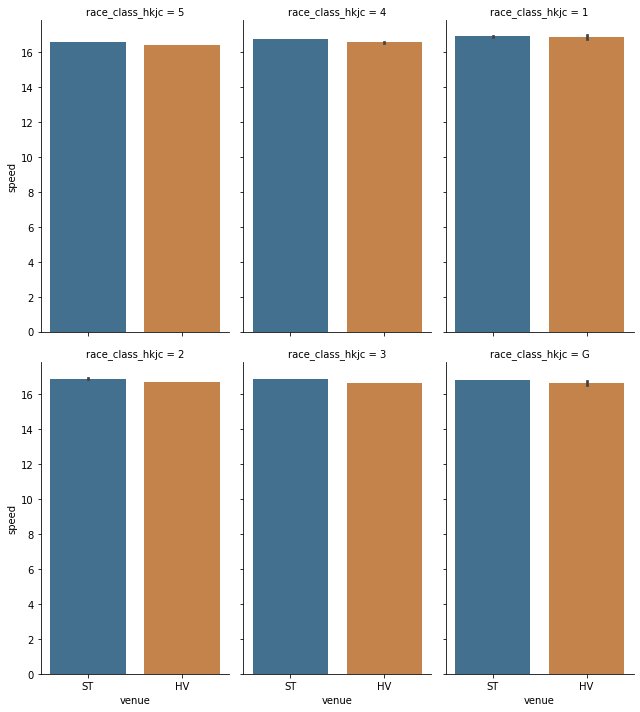

In [45]:
g = sns.catplot(x="venue", y="speed", col="race_class_hkjc",data=df, saturation=.5,kind="bar",aspect=.6,col_wrap=3)

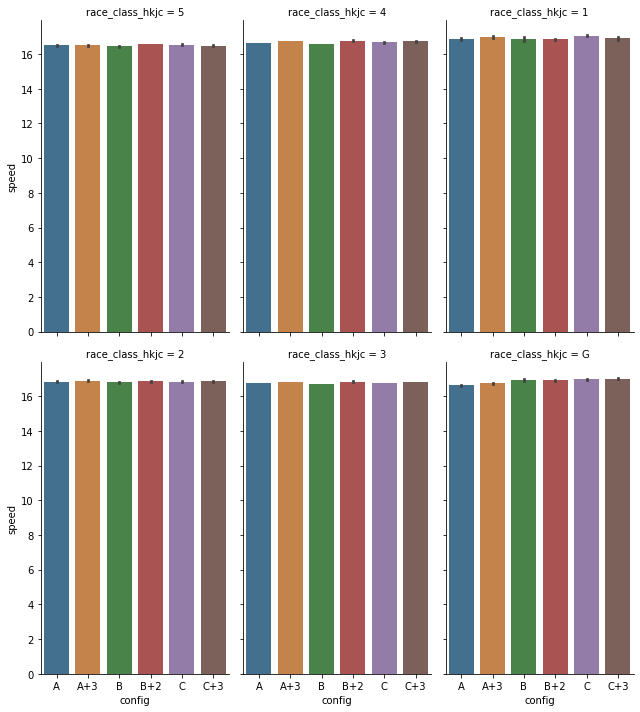

In [46]:
g = sns.catplot(x="config", y="speed", col="race_class_hkjc",data=df, saturation=.5,kind="bar",aspect=.6,col_wrap=3)

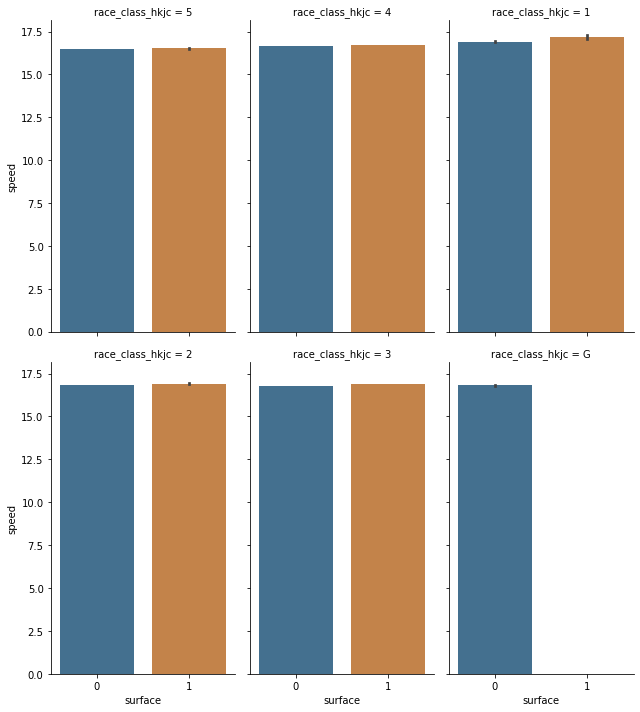

In [47]:
g = sns.catplot(x="surface", y="speed", col="race_class_hkjc",data=df, saturation=.5,kind="bar",aspect=.6,col_wrap=3)

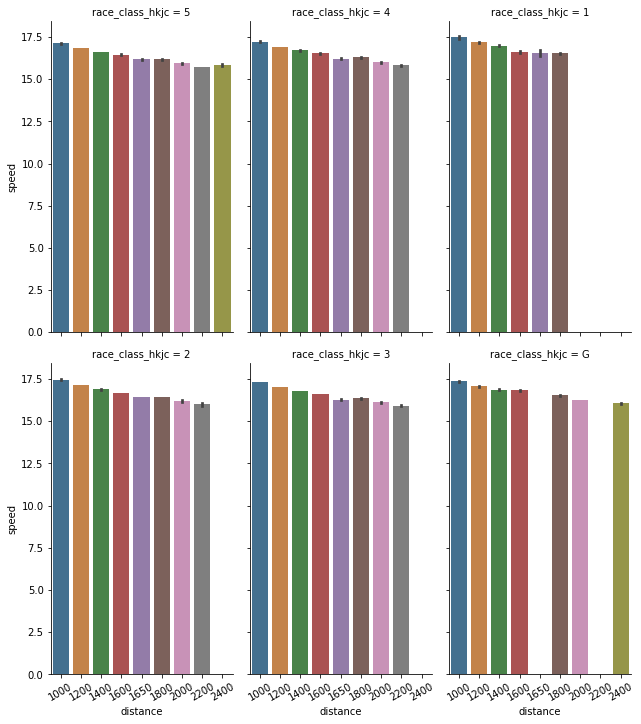

In [66]:
g = sns.catplot(x="distance", y="speed", col="race_class_hkjc",data=df, saturation=.5,kind="bar",aspect=.6,col_wrap=3)
g.set_xticklabels(rotation=30)

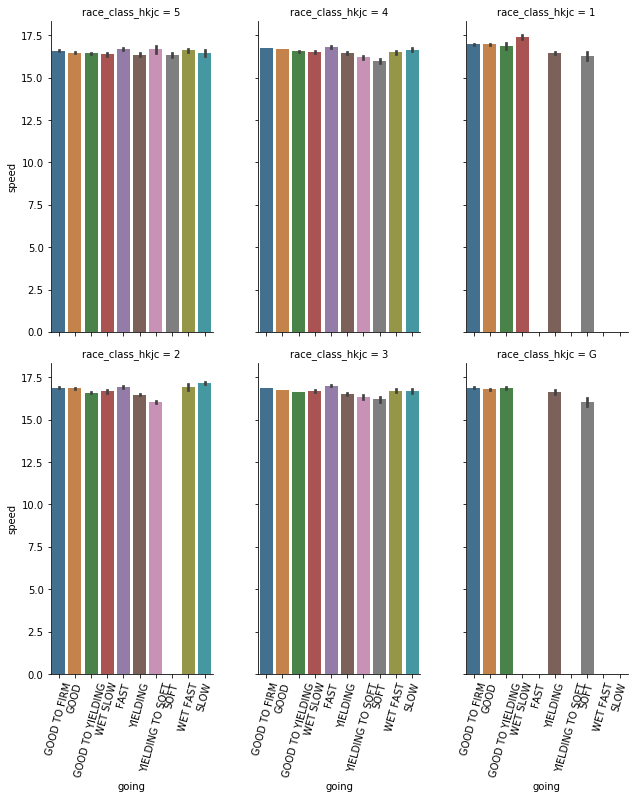

In [71]:
g = sns.catplot(x="going", y="speed", col="race_class_hkjc",data=df, saturation=.5,kind="bar",aspect=.6,col_wrap=3)
g.set_xticklabels(rotation=75)

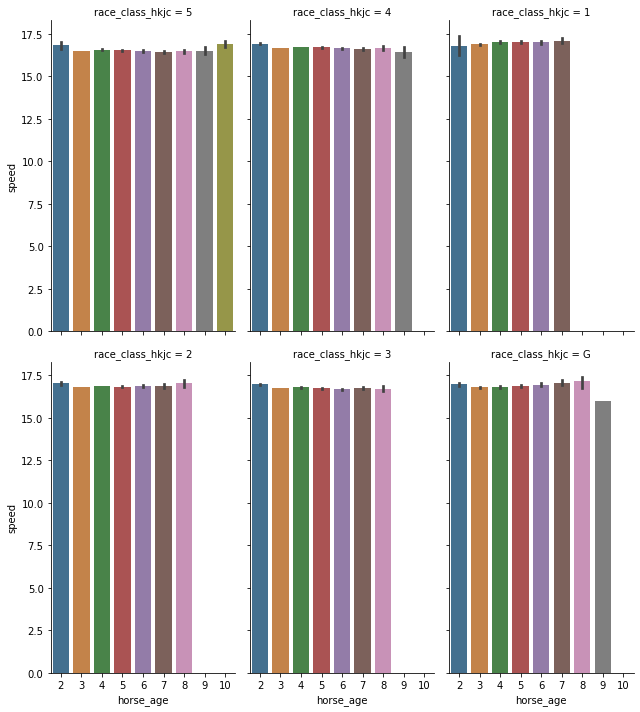

In [73]:
g = sns.catplot(x="horse_age", y="speed", col="race_class_hkjc",data=df, saturation=.5,kind="bar",aspect=.6,col_wrap=3)

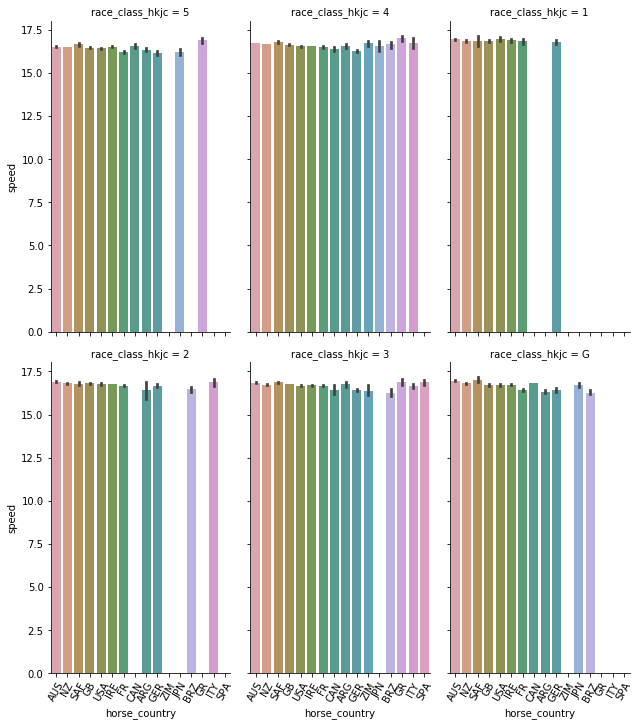

In [77]:
g = sns.catplot(x="horse_country", y="speed", col="race_class_hkjc",data=df, saturation=.5,kind="bar",aspect=.6,col_wrap=3)
g.set_xticklabels(rotation=60)

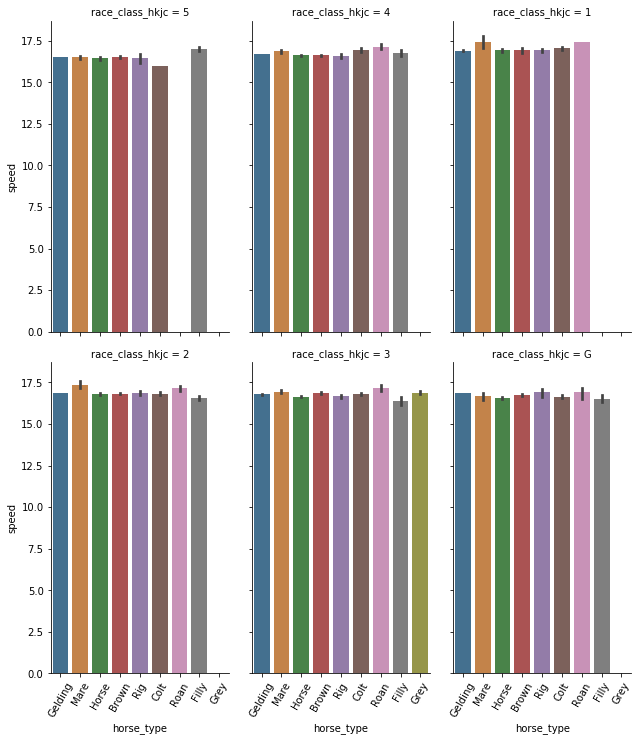

In [78]:
g = sns.catplot(x="horse_type", y="speed", col="race_class_hkjc",data=df, saturation=.5,kind="bar",aspect=.6,col_wrap=3)
g.set_xticklabels(rotation=60)

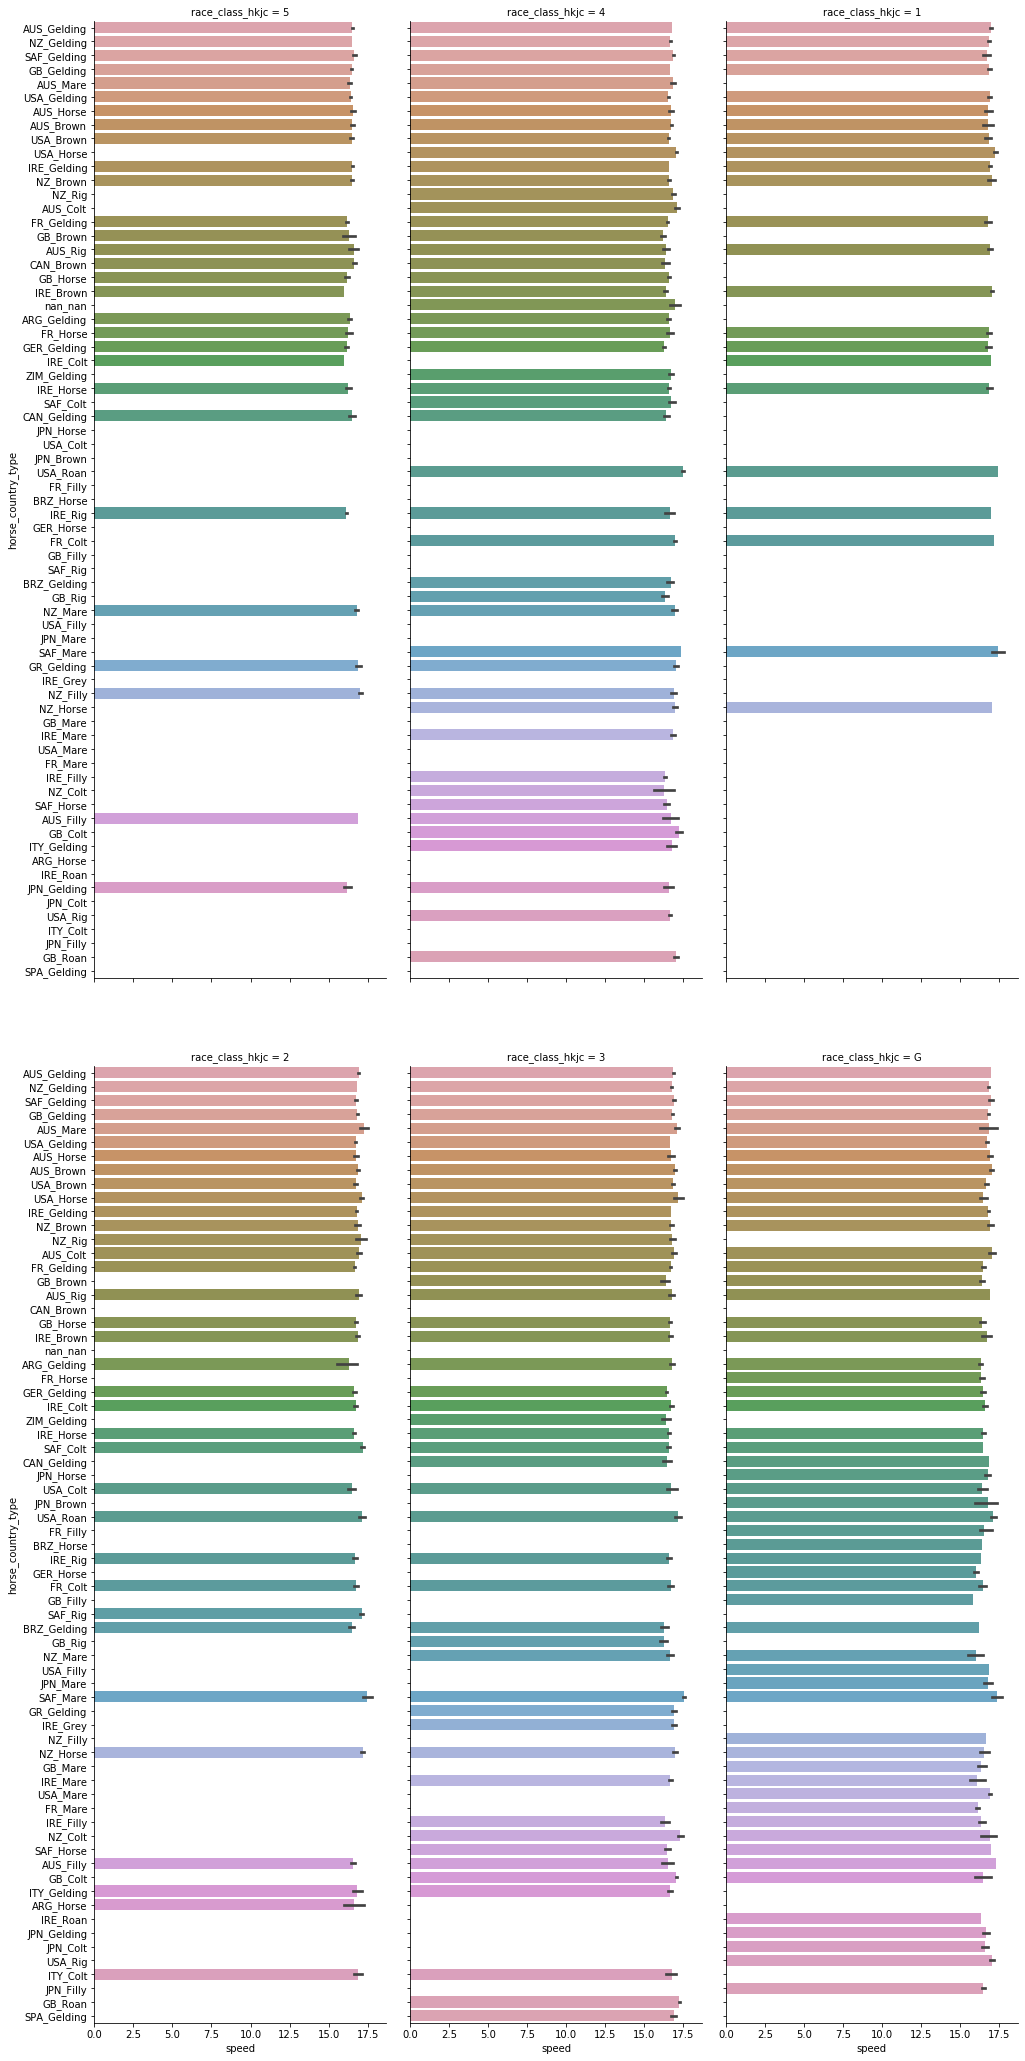

In [20]:
g = sns.catplot(x="speed", y="horse_country_type", col="race_class_hkjc",data=df, saturation=.5,kind="bar",aspect=.6,col_wrap=3)
g.fig.set_size_inches(15,30)

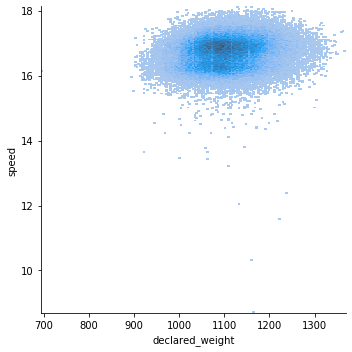

In [6]:
sns.displot(df, x="declared_weight", y="speed")

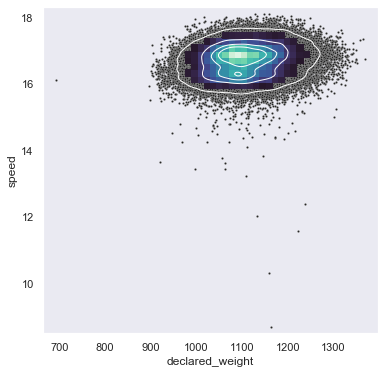

In [8]:
x=df['declared_weight']
y=df['speed']
sns.set_theme(style="dark")

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

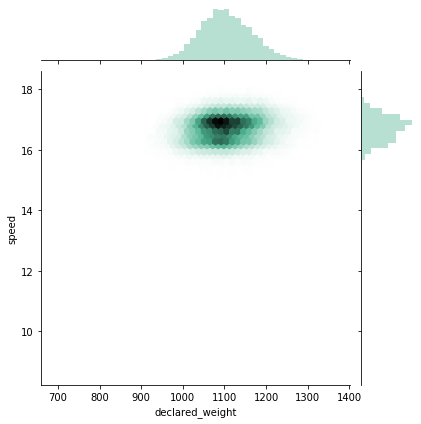

In [14]:
x=df['declared_weight']
y=df['speed']
sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")

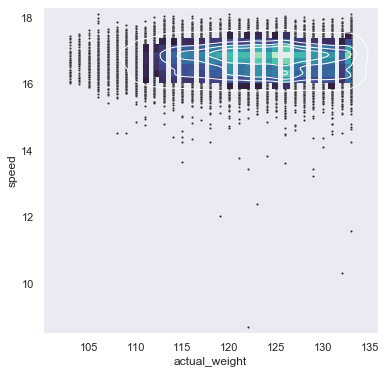

In [9]:
x=df['actual_weight']
y=df['speed']
sns.set_theme(style="dark")

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

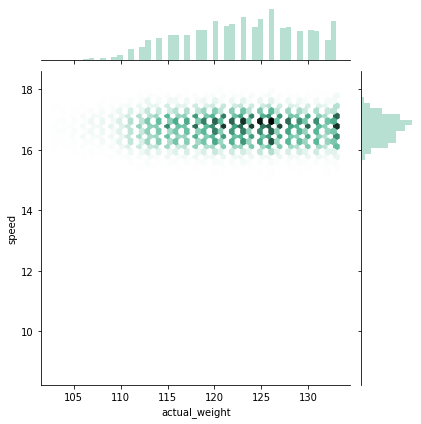

In [18]:
x=df['actual_weight']
y=df['speed']
sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")

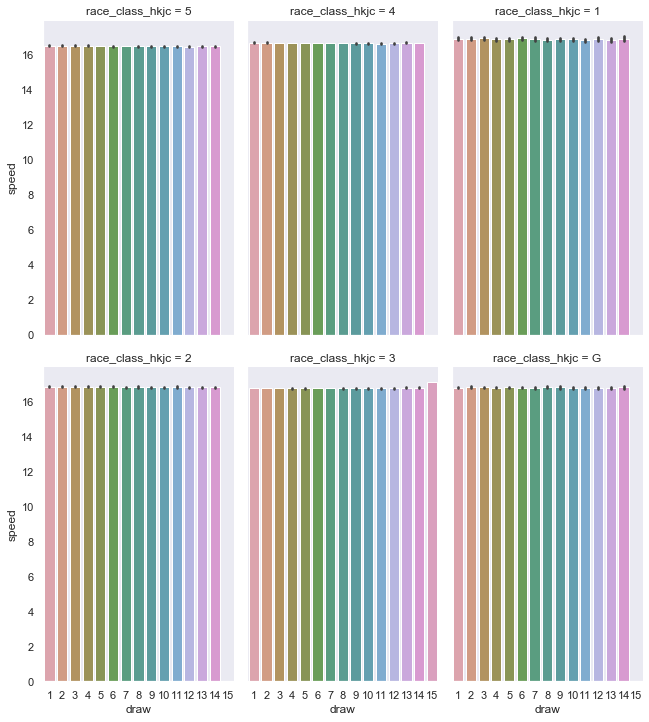

In [11]:
g = sns.catplot(x="draw", y="speed", col="race_class_hkjc",data=df, saturation=.5,kind="bar",aspect=.6,col_wrap=3)

In [18]:
df_race_class=df.groupby('race_class_hkjc')

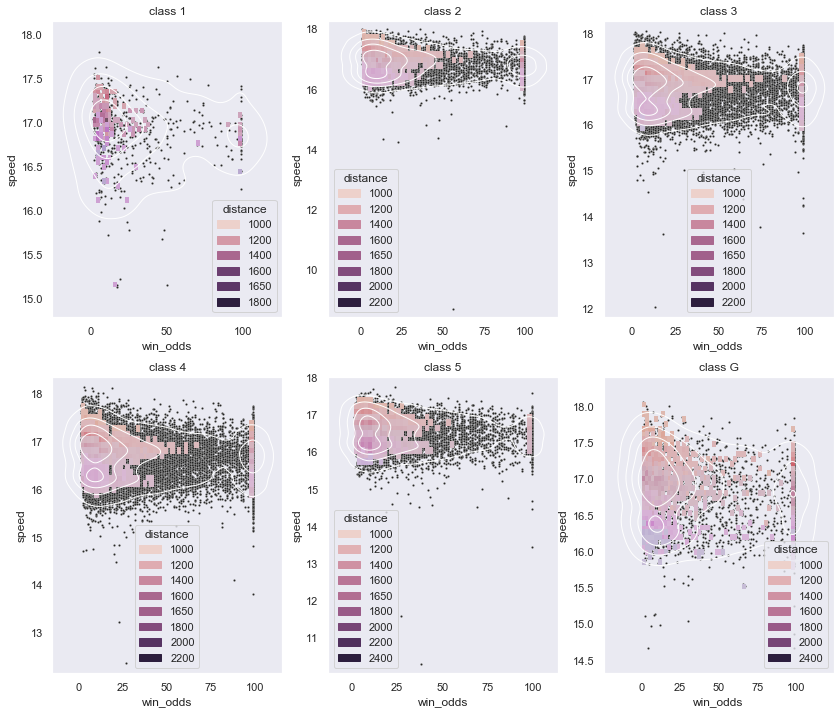

In [37]:
fig = plt.figure(figsize=(14,12))

plt.subplot(231)
plt.title('class 1')
sns.scatterplot(x=df_race_class.get_group('1')['win_odds'], y=df_race_class.get_group('1')['speed'], s=5, color=".15")
sns.histplot(x=df_race_class.get_group('1')['win_odds'],y=df_race_class.get_group('1')['speed'],hue=df_race_class.get_group('1')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('1')['win_odds'], y=df_race_class.get_group('1')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(232)
plt.title('class 2')
sns.scatterplot(x=df_race_class.get_group('2')['win_odds'], y=df_race_class.get_group('2')['speed'], s=5, color=".15")
sns.histplot(x=df_race_class.get_group('2')['win_odds'],y=df_race_class.get_group('2')['speed'],hue=df_race_class.get_group('2')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('2')['win_odds'], y=df_race_class.get_group('2')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(233)
plt.title('class 3')
sns.scatterplot(x=df_race_class.get_group('3')['win_odds'], y=df_race_class.get_group('3')['speed'], s=5, color=".15")
sns.histplot(x=df_race_class.get_group('3')['win_odds'],y=df_race_class.get_group('3')['speed'],hue=df_race_class.get_group('3')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('3')['win_odds'], y=df_race_class.get_group('3')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(234)
plt.title('class 4')
sns.scatterplot(x=df_race_class.get_group('4')['win_odds'], y=df_race_class.get_group('4')['speed'], s=5, color=".15")
sns.histplot(x=df_race_class.get_group('4')['win_odds'],y=df_race_class.get_group('4')['speed'],hue=df_race_class.get_group('4')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('4')['win_odds'], y=df_race_class.get_group('4')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(235)
plt.title('class 5')
sns.scatterplot(x=df_race_class.get_group('5')['win_odds'], y=df_race_class.get_group('5')['speed'], s=5, color=".15")
sns.histplot(x=df_race_class.get_group('5')['win_odds'],y=df_race_class.get_group('5')['speed'],hue=df_race_class.get_group('5')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('5')['win_odds'], y=df_race_class.get_group('5')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(236)
plt.title('class G')
sns.scatterplot(x=df_race_class.get_group('G')['win_odds'], y=df_race_class.get_group('G')['speed'], s=5, color=".15")
sns.histplot(x=df_race_class.get_group('G')['win_odds'],y=df_race_class.get_group('G')['speed'],hue=df_race_class.get_group('G')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('G')['win_odds'], y=df_race_class.get_group('G')['speed'], levels=5, color="w", linewidths=1)

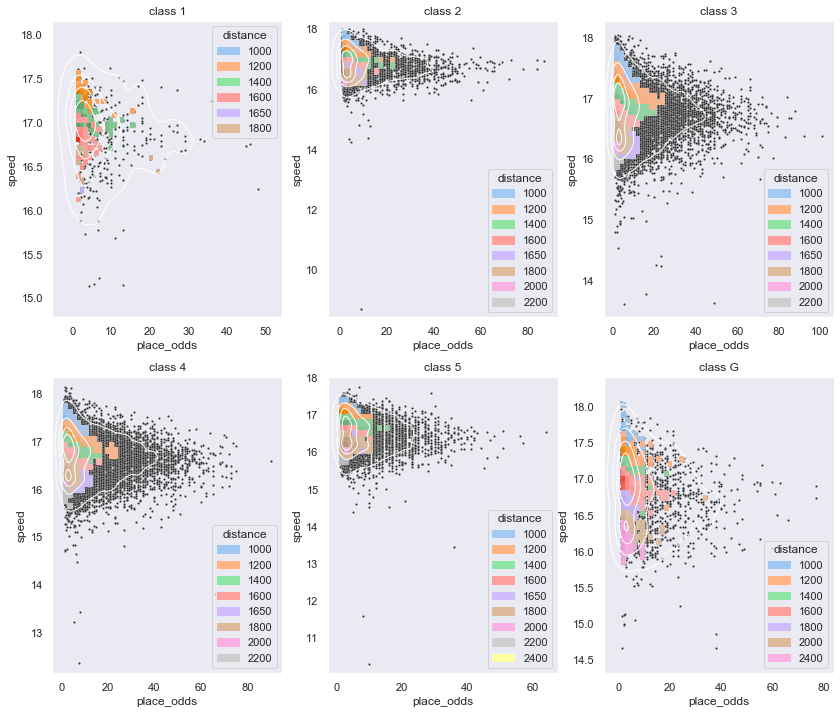

In [39]:
fig = plt.figure(figsize=(14,12))

plt.subplot(231)
plt.title('class 1')
sns.scatterplot(x=df_race_class.get_group('1')['place_odds'], y=df_race_class.get_group('1')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('1')['place_odds'],y=df_race_class.get_group('1')['speed'],hue=df_race_class.get_group('1')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('1')['place_odds'], y=df_race_class.get_group('1')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(232)
plt.title('class 2')
sns.scatterplot(x=df_race_class.get_group('2')['place_odds'], y=df_race_class.get_group('2')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('2')['place_odds'],y=df_race_class.get_group('2')['speed'],hue=df_race_class.get_group('2')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('2')['place_odds'], y=df_race_class.get_group('2')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(233)
plt.title('class 3')
sns.scatterplot(x=df_race_class.get_group('3')['place_odds'], y=df_race_class.get_group('3')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('3')['place_odds'],y=df_race_class.get_group('3')['speed'],hue=df_race_class.get_group('3')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('3')['place_odds'], y=df_race_class.get_group('3')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(234)
plt.title('class 4')
sns.scatterplot(x=df_race_class.get_group('4')['place_odds'], y=df_race_class.get_group('4')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('4')['place_odds'],y=df_race_class.get_group('4')['speed'],hue=df_race_class.get_group('4')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('4')['place_odds'], y=df_race_class.get_group('4')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(235)
plt.title('class 5')
sns.scatterplot(x=df_race_class.get_group('5')['place_odds'], y=df_race_class.get_group('5')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('5')['place_odds'],y=df_race_class.get_group('5')['speed'],hue=df_race_class.get_group('5')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('5')['place_odds'], y=df_race_class.get_group('5')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(236)
plt.title('class G')
sns.scatterplot(x=df_race_class.get_group('G')['place_odds'], y=df_race_class.get_group('G')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('G')['place_odds'],y=df_race_class.get_group('G')['speed'],hue=df_race_class.get_group('G')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('G')['place_odds'], y=df_race_class.get_group('G')['speed'], levels=5, color="w", linewidths=1)

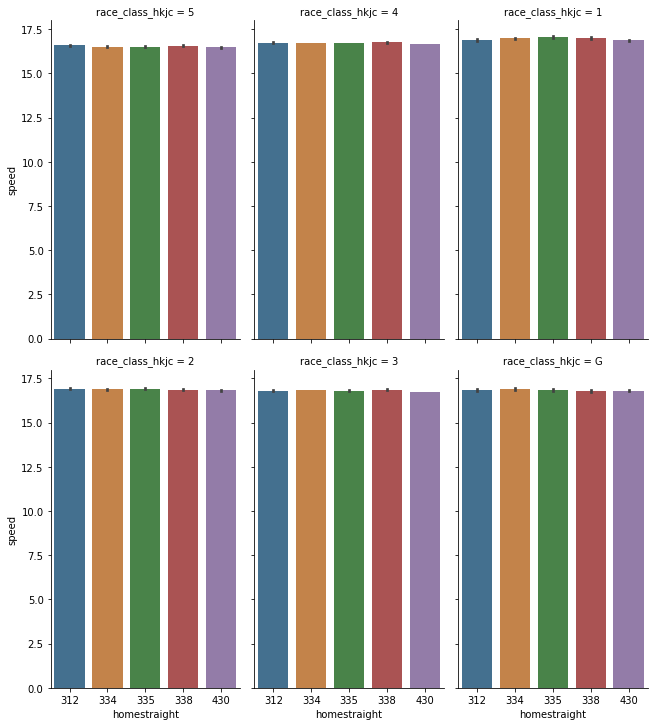

In [4]:
g = sns.catplot(x="homestraight", y="speed", col="race_class_hkjc",data=df, saturation=.5,kind="bar",aspect=.6,col_wrap=3)

In [ ]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="width", y="speed",hue='race_class_hkjc' data=df,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="distance", y="method", data=planets,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

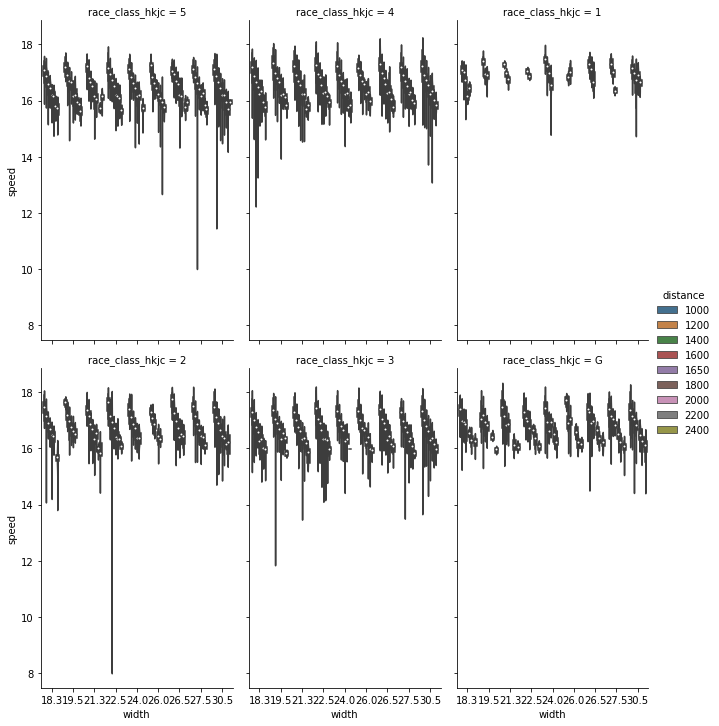

In [12]:
g = sns.catplot(x="width", y="speed", col="race_class_hkjc",hue='distance',data=df, saturation=.5,kind="violin",aspect=.6,col_wrap=3)

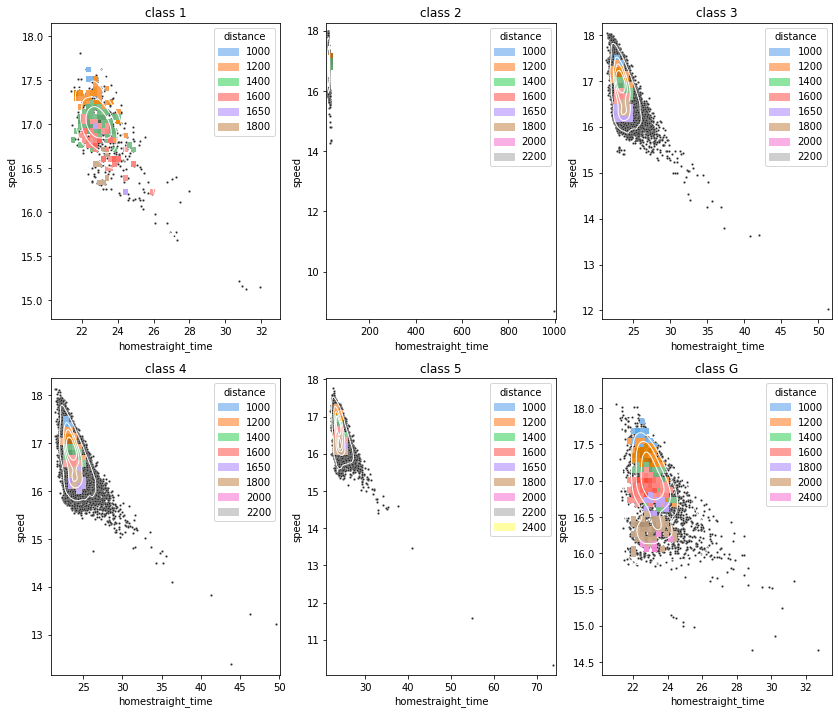

In [9]:
fig = plt.figure(figsize=(14,12))

plt.subplot(231)
plt.title('class 1')
sns.scatterplot(x=df_race_class.get_group('1')['homestraight_time'], y=df_race_class.get_group('1')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('1')['homestraight_time'],y=df_race_class.get_group('1')['speed'],hue=df_race_class.get_group('1')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('1')['homestraight_time'], y=df_race_class.get_group('1')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(232)
plt.title('class 2')
sns.scatterplot(x=df_race_class.get_group('2')['homestraight_time'], y=df_race_class.get_group('2')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('2')['homestraight_time'],y=df_race_class.get_group('2')['speed'],hue=df_race_class.get_group('2')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('2')['homestraight_time'], y=df_race_class.get_group('2')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(233)
plt.title('class 3')
sns.scatterplot(x=df_race_class.get_group('3')['homestraight_time'], y=df_race_class.get_group('3')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('3')['homestraight_time'],y=df_race_class.get_group('3')['speed'],hue=df_race_class.get_group('3')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('3')['homestraight_time'], y=df_race_class.get_group('3')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(234)
plt.title('class 4')
sns.scatterplot(x=df_race_class.get_group('4')['homestraight_time'], y=df_race_class.get_group('4')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('4')['homestraight_time'],y=df_race_class.get_group('4')['speed'],hue=df_race_class.get_group('4')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('4')['homestraight_time'], y=df_race_class.get_group('4')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(235)
plt.title('class 5')
sns.scatterplot(x=df_race_class.get_group('5')['homestraight_time'], y=df_race_class.get_group('5')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('5')['homestraight_time'],y=df_race_class.get_group('5')['speed'],hue=df_race_class.get_group('5')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('5')['homestraight_time'], y=df_race_class.get_group('5')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(236)
plt.title('class G')
sns.scatterplot(x=df_race_class.get_group('G')['homestraight_time'], y=df_race_class.get_group('G')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('G')['homestraight_time'],y=df_race_class.get_group('G')['speed'],hue=df_race_class.get_group('G')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('G')['homestraight_time'], y=df_race_class.get_group('G')['speed'], levels=5, color="w", linewidths=1)

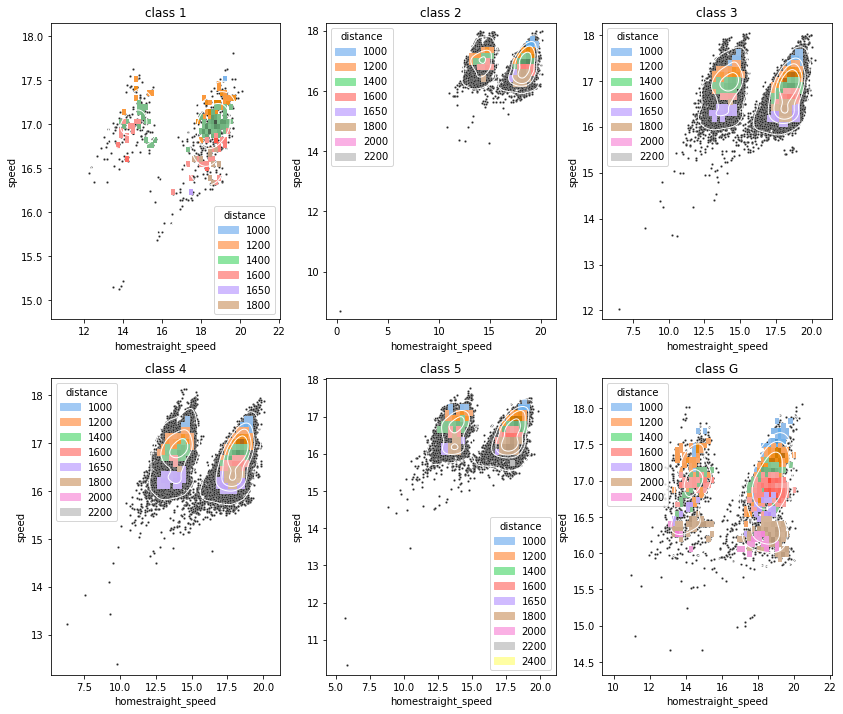

In [10]:
fig = plt.figure(figsize=(14,12))

feat='homestraight_speed'

plt.subplot(231)
plt.title('class 1')
sns.scatterplot(x=df_race_class.get_group('1')[feat], y=df_race_class.get_group('1')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('1')[feat],y=df_race_class.get_group('1')['speed'],hue=df_race_class.get_group('1')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('1')[feat], y=df_race_class.get_group('1')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(232)
plt.title('class 2')
sns.scatterplot(x=df_race_class.get_group('2')[feat], y=df_race_class.get_group('2')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('2')[feat],y=df_race_class.get_group('2')['speed'],hue=df_race_class.get_group('2')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('2')[feat], y=df_race_class.get_group('2')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(233)
plt.title('class 3')
sns.scatterplot(x=df_race_class.get_group('3')[feat], y=df_race_class.get_group('3')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('3')[feat],y=df_race_class.get_group('3')['speed'],hue=df_race_class.get_group('3')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('3')[feat], y=df_race_class.get_group('3')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(234)
plt.title('class 4')
sns.scatterplot(x=df_race_class.get_group('4')[feat], y=df_race_class.get_group('4')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('4')[feat],y=df_race_class.get_group('4')['speed'],hue=df_race_class.get_group('4')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('4')[feat], y=df_race_class.get_group('4')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(235)
plt.title('class 5')
sns.scatterplot(x=df_race_class.get_group('5')[feat], y=df_race_class.get_group('5')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('5')[feat],y=df_race_class.get_group('5')['speed'],hue=df_race_class.get_group('5')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('5')[feat], y=df_race_class.get_group('5')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(236)
plt.title('class G')
sns.scatterplot(x=df_race_class.get_group('G')[feat], y=df_race_class.get_group('G')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('G')[feat],y=df_race_class.get_group('G')['speed'],hue=df_race_class.get_group('G')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('G')[feat], y=df_race_class.get_group('G')['speed'], levels=5, color="w", linewidths=1)

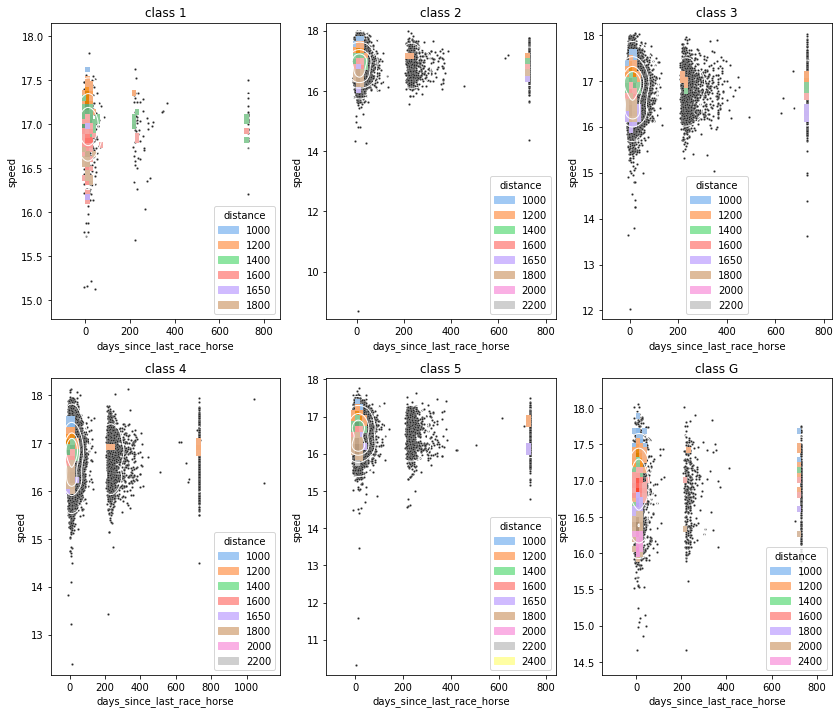

In [13]:
fig = plt.figure(figsize=(14,12))

feat='days_since_last_race_horse'

plt.subplot(231)
plt.title('class 1')
sns.scatterplot(x=df_race_class.get_group('1')[feat], y=df_race_class.get_group('1')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('1')[feat],y=df_race_class.get_group('1')['speed'],hue=df_race_class.get_group('1')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('1')[feat], y=df_race_class.get_group('1')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(232)
plt.title('class 2')
sns.scatterplot(x=df_race_class.get_group('2')[feat], y=df_race_class.get_group('2')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('2')[feat],y=df_race_class.get_group('2')['speed'],hue=df_race_class.get_group('2')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('2')[feat], y=df_race_class.get_group('2')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(233)
plt.title('class 3')
sns.scatterplot(x=df_race_class.get_group('3')[feat], y=df_race_class.get_group('3')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('3')[feat],y=df_race_class.get_group('3')['speed'],hue=df_race_class.get_group('3')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('3')[feat], y=df_race_class.get_group('3')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(234)
plt.title('class 4')
sns.scatterplot(x=df_race_class.get_group('4')[feat], y=df_race_class.get_group('4')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('4')[feat],y=df_race_class.get_group('4')['speed'],hue=df_race_class.get_group('4')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('4')[feat], y=df_race_class.get_group('4')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(235)
plt.title('class 5')
sns.scatterplot(x=df_race_class.get_group('5')[feat], y=df_race_class.get_group('5')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('5')[feat],y=df_race_class.get_group('5')['speed'],hue=df_race_class.get_group('5')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('5')[feat], y=df_race_class.get_group('5')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(236)
plt.title('class G')
sns.scatterplot(x=df_race_class.get_group('G')[feat], y=df_race_class.get_group('G')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('G')[feat],y=df_race_class.get_group('G')['speed'],hue=df_race_class.get_group('G')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('G')[feat], y=df_race_class.get_group('G')['speed'], levels=5, color="w", linewidths=1)

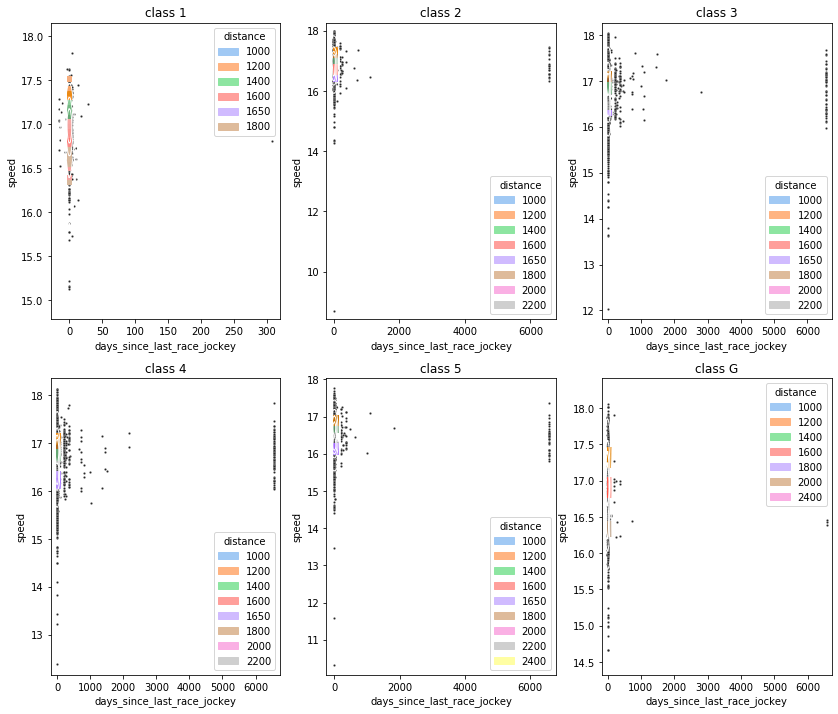

In [14]:
fig = plt.figure(figsize=(14,12))

feat='days_since_last_race_jockey'

plt.subplot(231)
plt.title('class 1')
sns.scatterplot(x=df_race_class.get_group('1')[feat], y=df_race_class.get_group('1')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('1')[feat],y=df_race_class.get_group('1')['speed'],hue=df_race_class.get_group('1')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('1')[feat], y=df_race_class.get_group('1')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(232)
plt.title('class 2')
sns.scatterplot(x=df_race_class.get_group('2')[feat], y=df_race_class.get_group('2')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('2')[feat],y=df_race_class.get_group('2')['speed'],hue=df_race_class.get_group('2')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('2')[feat], y=df_race_class.get_group('2')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(233)
plt.title('class 3')
sns.scatterplot(x=df_race_class.get_group('3')[feat], y=df_race_class.get_group('3')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('3')[feat],y=df_race_class.get_group('3')['speed'],hue=df_race_class.get_group('3')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('3')[feat], y=df_race_class.get_group('3')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(234)
plt.title('class 4')
sns.scatterplot(x=df_race_class.get_group('4')[feat], y=df_race_class.get_group('4')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('4')[feat],y=df_race_class.get_group('4')['speed'],hue=df_race_class.get_group('4')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('4')[feat], y=df_race_class.get_group('4')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(235)
plt.title('class 5')
sns.scatterplot(x=df_race_class.get_group('5')[feat], y=df_race_class.get_group('5')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('5')[feat],y=df_race_class.get_group('5')['speed'],hue=df_race_class.get_group('5')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('5')[feat], y=df_race_class.get_group('5')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(236)
plt.title('class G')
sns.scatterplot(x=df_race_class.get_group('G')[feat], y=df_race_class.get_group('G')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('G')[feat],y=df_race_class.get_group('G')['speed'],hue=df_race_class.get_group('G')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('G')[feat], y=df_race_class.get_group('G')['speed'], levels=5, color="w", linewidths=1)

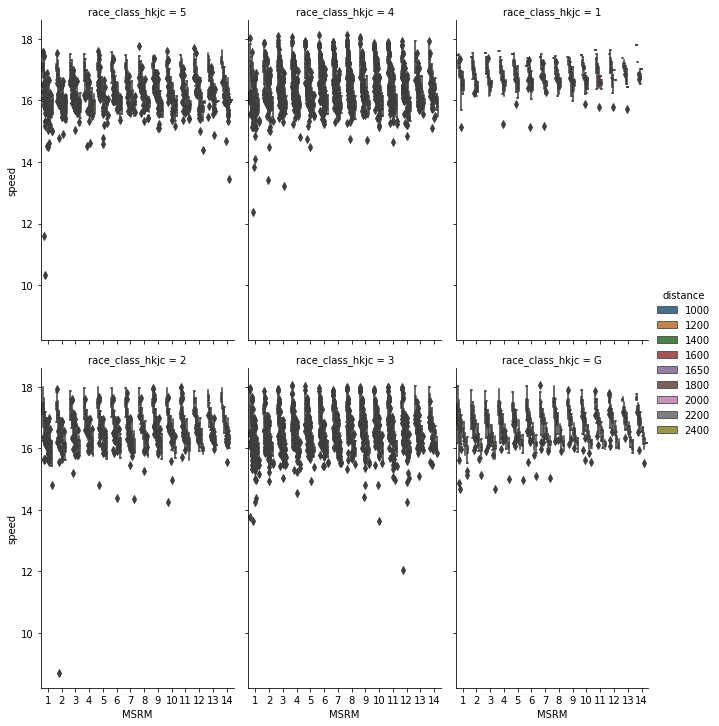

In [15]:
g = sns.catplot(x="MSRM", y="speed", col="race_class_hkjc",hue='distance',data=df, saturation=.5,kind="box",aspect=.6,col_wrap=3)

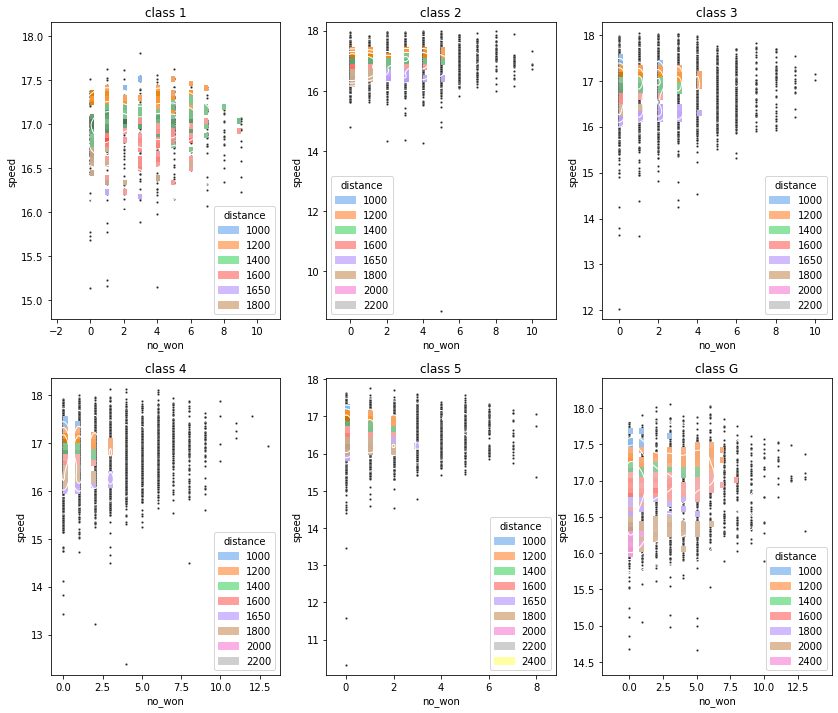

In [16]:
fig = plt.figure(figsize=(14,12))

feat='no_won'

plt.subplot(231)
plt.title('class 1')
sns.scatterplot(x=df_race_class.get_group('1')[feat], y=df_race_class.get_group('1')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('1')[feat],y=df_race_class.get_group('1')['speed'],hue=df_race_class.get_group('1')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('1')[feat], y=df_race_class.get_group('1')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(232)
plt.title('class 2')
sns.scatterplot(x=df_race_class.get_group('2')[feat], y=df_race_class.get_group('2')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('2')[feat],y=df_race_class.get_group('2')['speed'],hue=df_race_class.get_group('2')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('2')[feat], y=df_race_class.get_group('2')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(233)
plt.title('class 3')
sns.scatterplot(x=df_race_class.get_group('3')[feat], y=df_race_class.get_group('3')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('3')[feat],y=df_race_class.get_group('3')['speed'],hue=df_race_class.get_group('3')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('3')[feat], y=df_race_class.get_group('3')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(234)
plt.title('class 4')
sns.scatterplot(x=df_race_class.get_group('4')[feat], y=df_race_class.get_group('4')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('4')[feat],y=df_race_class.get_group('4')['speed'],hue=df_race_class.get_group('4')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('4')[feat], y=df_race_class.get_group('4')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(235)
plt.title('class 5')
sns.scatterplot(x=df_race_class.get_group('5')[feat], y=df_race_class.get_group('5')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('5')[feat],y=df_race_class.get_group('5')['speed'],hue=df_race_class.get_group('5')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('5')[feat], y=df_race_class.get_group('5')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(236)
plt.title('class G')
sns.scatterplot(x=df_race_class.get_group('G')[feat], y=df_race_class.get_group('G')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('G')[feat],y=df_race_class.get_group('G')['speed'],hue=df_race_class.get_group('G')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('G')[feat], y=df_race_class.get_group('G')['speed'], levels=5, color="w", linewidths=1)

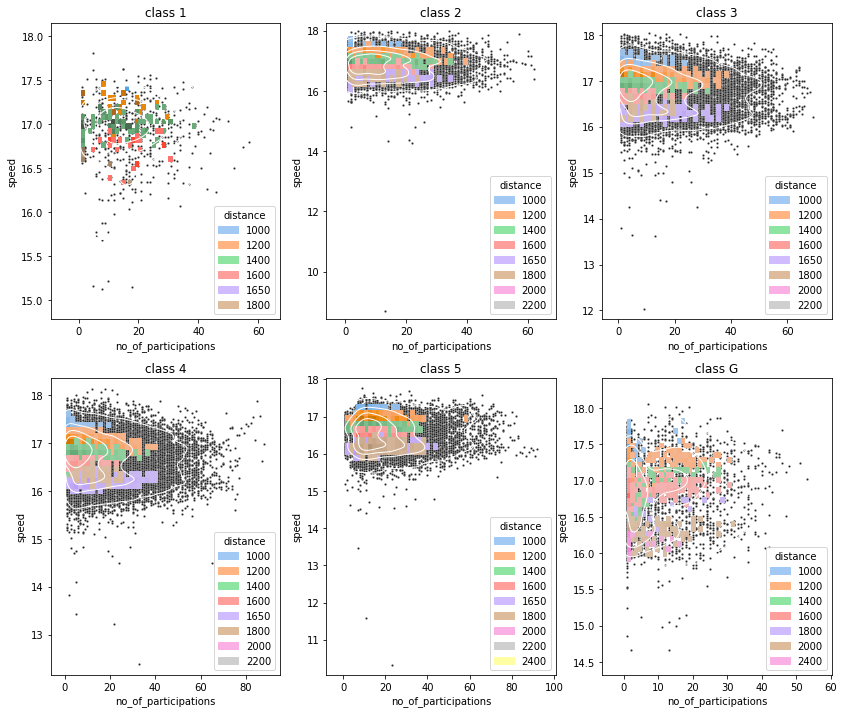

In [17]:
fig = plt.figure(figsize=(14,12))

feat='no_of_participations'

plt.subplot(231)
plt.title('class 1')
sns.scatterplot(x=df_race_class.get_group('1')[feat], y=df_race_class.get_group('1')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('1')[feat],y=df_race_class.get_group('1')['speed'],hue=df_race_class.get_group('1')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('1')[feat], y=df_race_class.get_group('1')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(232)
plt.title('class 2')
sns.scatterplot(x=df_race_class.get_group('2')[feat], y=df_race_class.get_group('2')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('2')[feat],y=df_race_class.get_group('2')['speed'],hue=df_race_class.get_group('2')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('2')[feat], y=df_race_class.get_group('2')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(233)
plt.title('class 3')
sns.scatterplot(x=df_race_class.get_group('3')[feat], y=df_race_class.get_group('3')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('3')[feat],y=df_race_class.get_group('3')['speed'],hue=df_race_class.get_group('3')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('3')[feat], y=df_race_class.get_group('3')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(234)
plt.title('class 4')
sns.scatterplot(x=df_race_class.get_group('4')[feat], y=df_race_class.get_group('4')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('4')[feat],y=df_race_class.get_group('4')['speed'],hue=df_race_class.get_group('4')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('4')[feat], y=df_race_class.get_group('4')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(235)
plt.title('class 5')
sns.scatterplot(x=df_race_class.get_group('5')[feat], y=df_race_class.get_group('5')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('5')[feat],y=df_race_class.get_group('5')['speed'],hue=df_race_class.get_group('5')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('5')[feat], y=df_race_class.get_group('5')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(236)
plt.title('class G')
sns.scatterplot(x=df_race_class.get_group('G')[feat], y=df_race_class.get_group('G')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('G')[feat],y=df_race_class.get_group('G')['speed'],hue=df_race_class.get_group('G')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('G')[feat], y=df_race_class.get_group('G')['speed'], levels=5, color="w", linewidths=1)

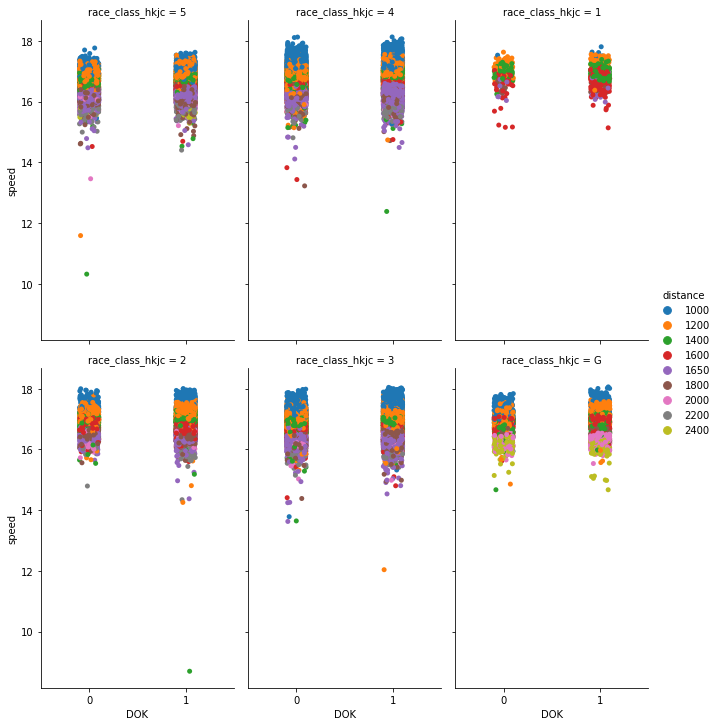

In [9]:
g = sns.catplot(x="DOK", y="speed", col="race_class_hkjc",hue='distance',data=df,kind="strip",aspect=.6,col_wrap=3)

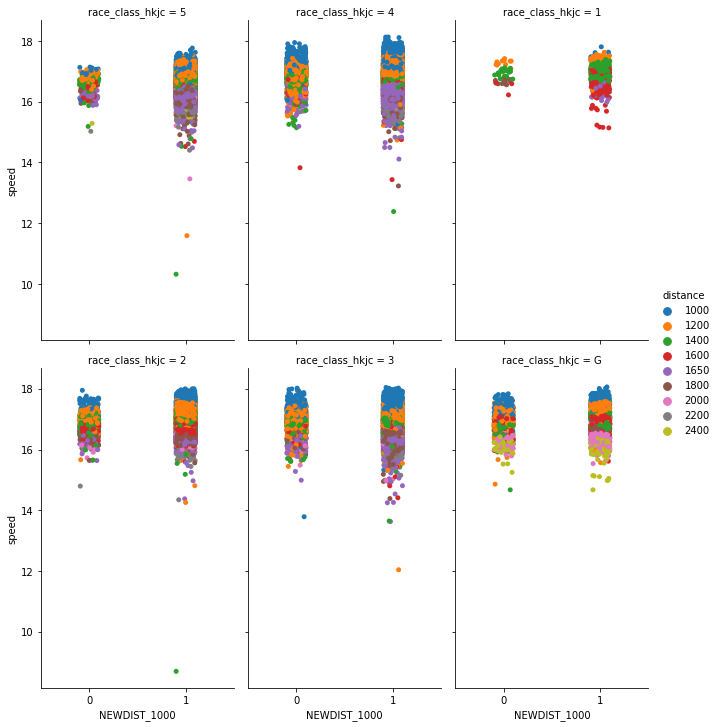

In [12]:
g = sns.catplot(x="NEWDIST_1000", y="speed", col="race_class_hkjc",hue='distance',data=df,kind="strip",aspect=.6,col_wrap=3)

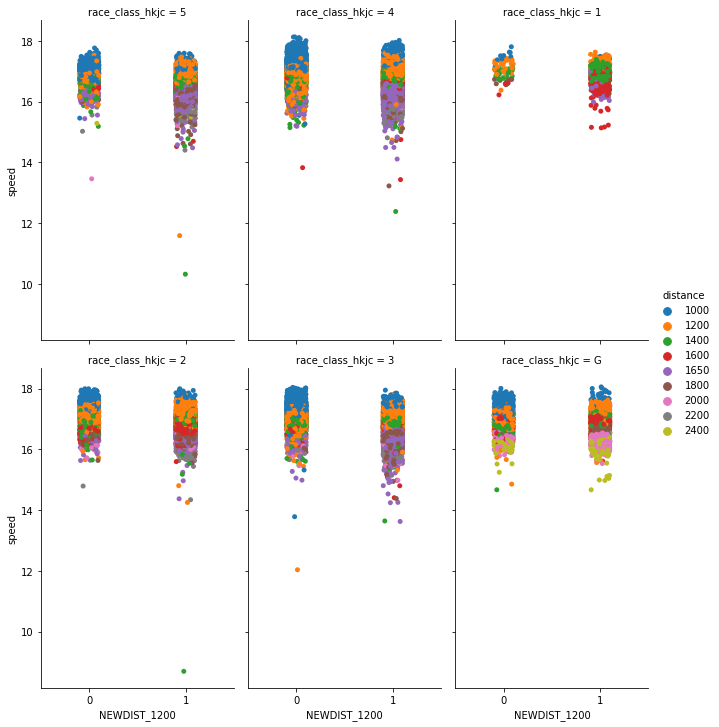

In [11]:
g = sns.catplot(x="NEWDIST_1200", y="speed", col="race_class_hkjc",hue='distance',data=df,kind="strip",aspect=.6,col_wrap=3)

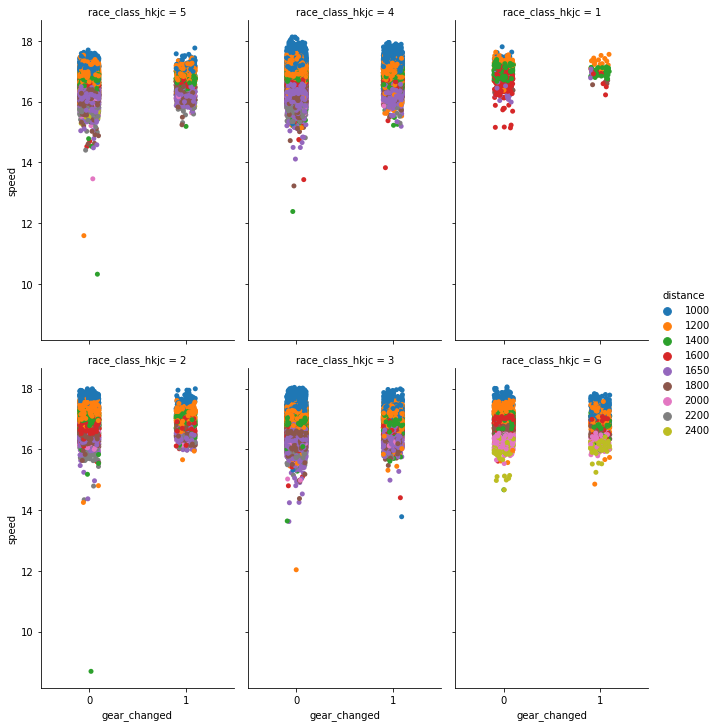

In [13]:
g = sns.catplot(x="gear_changed", y="speed", col="race_class_hkjc",hue='distance',data=df,kind="strip",aspect=.6,col_wrap=3)

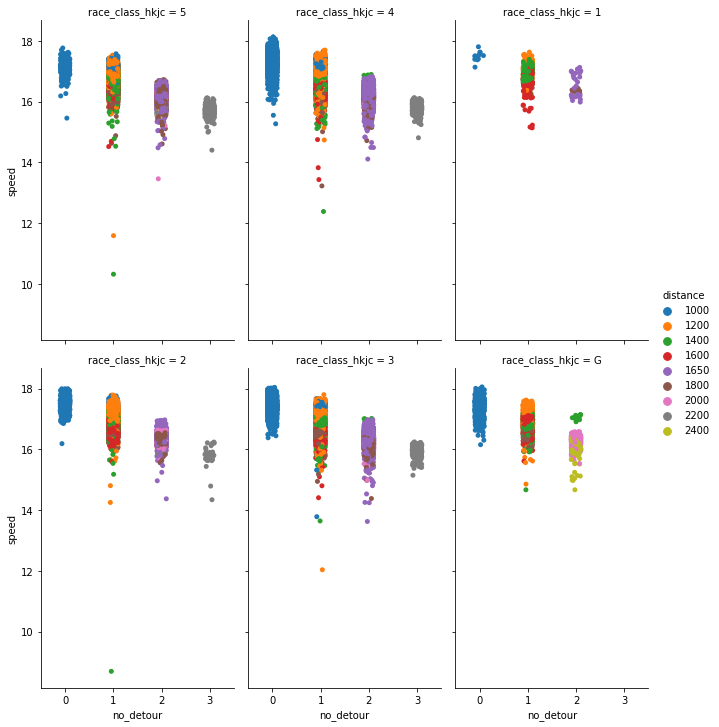

In [14]:
g = sns.catplot(x="no_detour", y="speed", col="race_class_hkjc",hue='distance',data=df,kind="strip",aspect=.6,col_wrap=3)

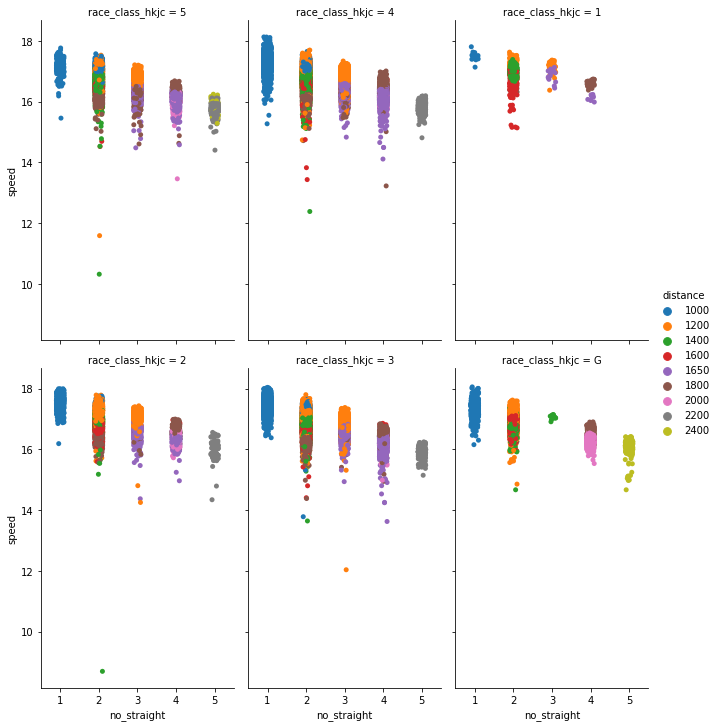

In [16]:
g = sns.catplot(x="no_straight", y="speed", col="race_class_hkjc",hue='distance',data=df,kind="strip",aspect=.6,col_wrap=3)

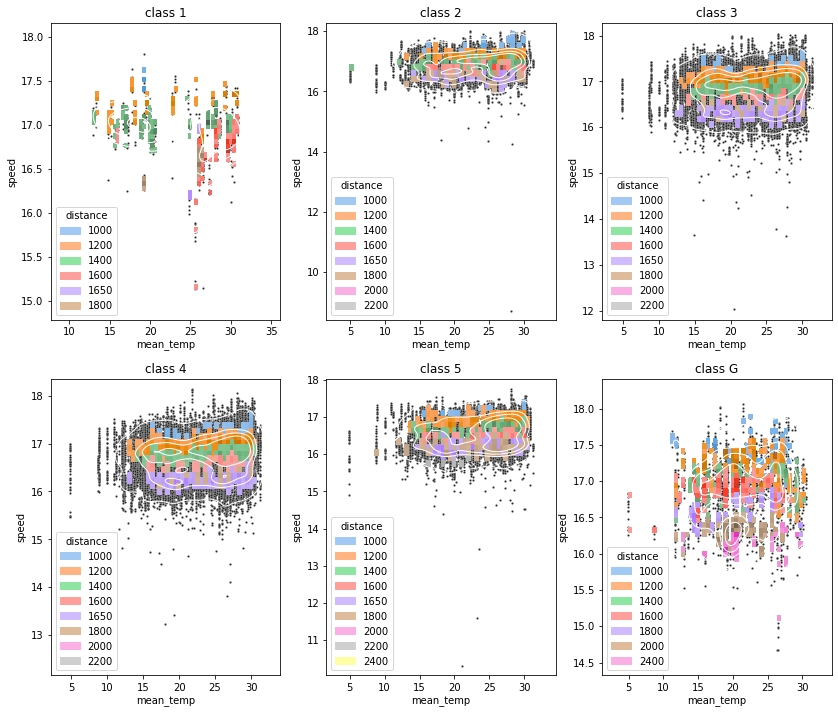

In [19]:
fig = plt.figure(figsize=(14,12))

feat='mean_temp'

plt.subplot(231)
plt.title('class 1')
sns.scatterplot(x=df_race_class.get_group('1')[feat], y=df_race_class.get_group('1')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('1')[feat],y=df_race_class.get_group('1')['speed'],hue=df_race_class.get_group('1')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('1')[feat], y=df_race_class.get_group('1')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(232)
plt.title('class 2')
sns.scatterplot(x=df_race_class.get_group('2')[feat], y=df_race_class.get_group('2')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('2')[feat],y=df_race_class.get_group('2')['speed'],hue=df_race_class.get_group('2')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('2')[feat], y=df_race_class.get_group('2')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(233)
plt.title('class 3')
sns.scatterplot(x=df_race_class.get_group('3')[feat], y=df_race_class.get_group('3')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('3')[feat],y=df_race_class.get_group('3')['speed'],hue=df_race_class.get_group('3')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('3')[feat], y=df_race_class.get_group('3')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(234)
plt.title('class 4')
sns.scatterplot(x=df_race_class.get_group('4')[feat], y=df_race_class.get_group('4')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('4')[feat],y=df_race_class.get_group('4')['speed'],hue=df_race_class.get_group('4')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('4')[feat], y=df_race_class.get_group('4')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(235)
plt.title('class 5')
sns.scatterplot(x=df_race_class.get_group('5')[feat], y=df_race_class.get_group('5')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('5')[feat],y=df_race_class.get_group('5')['speed'],hue=df_race_class.get_group('5')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('5')[feat], y=df_race_class.get_group('5')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(236)
plt.title('class G')
sns.scatterplot(x=df_race_class.get_group('G')[feat], y=df_race_class.get_group('G')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('G')[feat],y=df_race_class.get_group('G')['speed'],hue=df_race_class.get_group('G')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('G')[feat], y=df_race_class.get_group('G')['speed'], levels=5, color="w", linewidths=1)

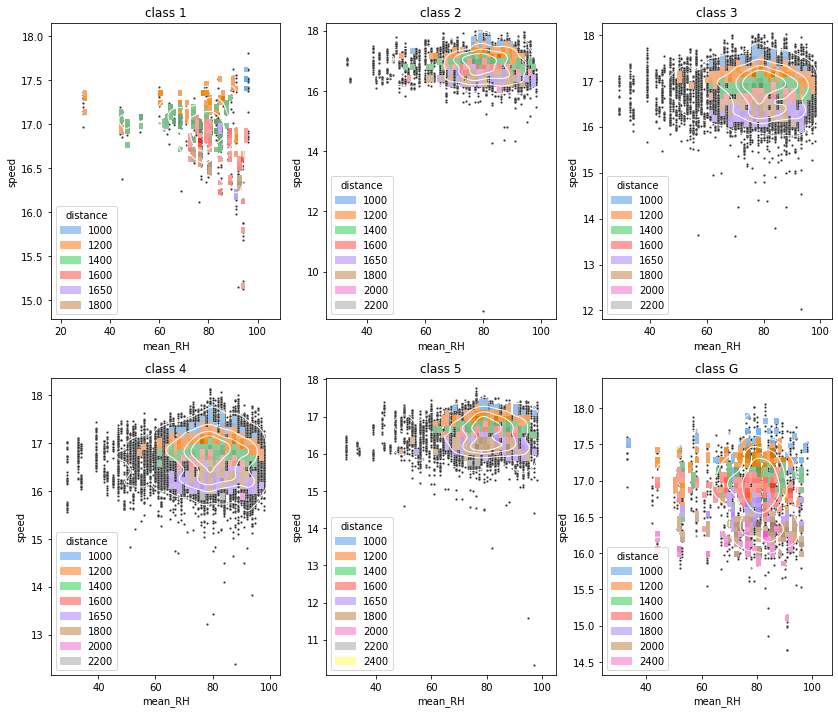

In [20]:
fig = plt.figure(figsize=(14,12))

feat='mean_RH'

plt.subplot(231)
plt.title('class 1')
sns.scatterplot(x=df_race_class.get_group('1')[feat], y=df_race_class.get_group('1')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('1')[feat],y=df_race_class.get_group('1')['speed'],hue=df_race_class.get_group('1')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('1')[feat], y=df_race_class.get_group('1')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(232)
plt.title('class 2')
sns.scatterplot(x=df_race_class.get_group('2')[feat], y=df_race_class.get_group('2')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('2')[feat],y=df_race_class.get_group('2')['speed'],hue=df_race_class.get_group('2')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('2')[feat], y=df_race_class.get_group('2')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(233)
plt.title('class 3')
sns.scatterplot(x=df_race_class.get_group('3')[feat], y=df_race_class.get_group('3')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('3')[feat],y=df_race_class.get_group('3')['speed'],hue=df_race_class.get_group('3')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('3')[feat], y=df_race_class.get_group('3')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(234)
plt.title('class 4')
sns.scatterplot(x=df_race_class.get_group('4')[feat], y=df_race_class.get_group('4')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('4')[feat],y=df_race_class.get_group('4')['speed'],hue=df_race_class.get_group('4')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('4')[feat], y=df_race_class.get_group('4')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(235)
plt.title('class 5')
sns.scatterplot(x=df_race_class.get_group('5')[feat], y=df_race_class.get_group('5')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('5')[feat],y=df_race_class.get_group('5')['speed'],hue=df_race_class.get_group('5')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('5')[feat], y=df_race_class.get_group('5')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(236)
plt.title('class G')
sns.scatterplot(x=df_race_class.get_group('G')[feat], y=df_race_class.get_group('G')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('G')[feat],y=df_race_class.get_group('G')['speed'],hue=df_race_class.get_group('G')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('G')[feat], y=df_race_class.get_group('G')['speed'], levels=5, color="w", linewidths=1)

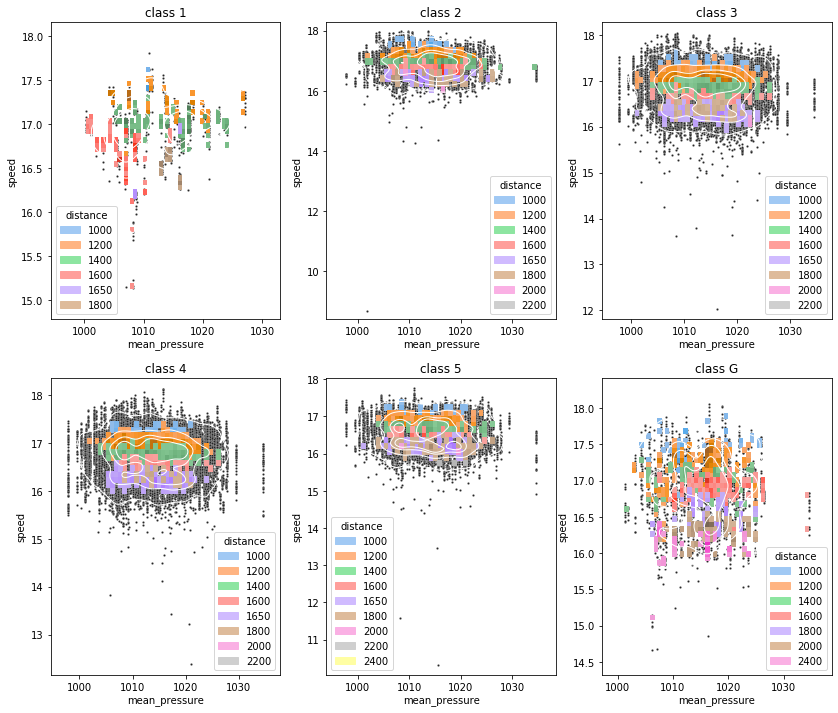

In [21]:
fig = plt.figure(figsize=(14,12))

feat='mean_pressure'

plt.subplot(231)
plt.title('class 1')
sns.scatterplot(x=df_race_class.get_group('1')[feat], y=df_race_class.get_group('1')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('1')[feat],y=df_race_class.get_group('1')['speed'],hue=df_race_class.get_group('1')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('1')[feat], y=df_race_class.get_group('1')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(232)
plt.title('class 2')
sns.scatterplot(x=df_race_class.get_group('2')[feat], y=df_race_class.get_group('2')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('2')[feat],y=df_race_class.get_group('2')['speed'],hue=df_race_class.get_group('2')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('2')[feat], y=df_race_class.get_group('2')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(233)
plt.title('class 3')
sns.scatterplot(x=df_race_class.get_group('3')[feat], y=df_race_class.get_group('3')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('3')[feat],y=df_race_class.get_group('3')['speed'],hue=df_race_class.get_group('3')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('3')[feat], y=df_race_class.get_group('3')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(234)
plt.title('class 4')
sns.scatterplot(x=df_race_class.get_group('4')[feat], y=df_race_class.get_group('4')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('4')[feat],y=df_race_class.get_group('4')['speed'],hue=df_race_class.get_group('4')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('4')[feat], y=df_race_class.get_group('4')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(235)
plt.title('class 5')
sns.scatterplot(x=df_race_class.get_group('5')[feat], y=df_race_class.get_group('5')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('5')[feat],y=df_race_class.get_group('5')['speed'],hue=df_race_class.get_group('5')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('5')[feat], y=df_race_class.get_group('5')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(236)
plt.title('class G')
sns.scatterplot(x=df_race_class.get_group('G')[feat], y=df_race_class.get_group('G')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('G')[feat],y=df_race_class.get_group('G')['speed'],hue=df_race_class.get_group('G')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('G')[feat], y=df_race_class.get_group('G')['speed'], levels=5, color="w", linewidths=1)

In [29]:
df.sd_ratio.unique()

array([2.        ,        inf, 3.        , 1.        , 4.        ,
       1.5       , 1.66666667, 2.5       ])

In [34]:
df['sd_ratio']=df.sd_ratio.replace({np.inf:1})

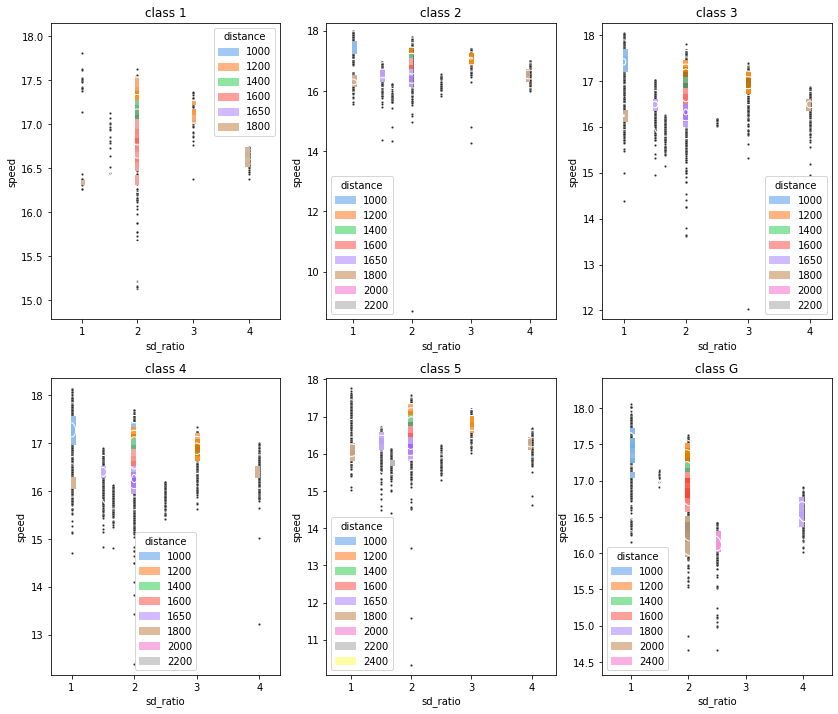

In [35]:
fig = plt.figure(figsize=(14,12))

feat='sd_ratio'

plt.subplot(231)
plt.title('class 1')
sns.scatterplot(x=df_race_class.get_group('1')[feat], y=df_race_class.get_group('1')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('1')[feat],y=df_race_class.get_group('1')['speed'],hue=df_race_class.get_group('1')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('1')[feat], y=df_race_class.get_group('1')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(232)
plt.title('class 2')
sns.scatterplot(x=df_race_class.get_group('2')[feat], y=df_race_class.get_group('2')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('2')[feat],y=df_race_class.get_group('2')['speed'],hue=df_race_class.get_group('2')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('2')[feat], y=df_race_class.get_group('2')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(233)
plt.title('class 3')
sns.scatterplot(x=df_race_class.get_group('3')[feat], y=df_race_class.get_group('3')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('3')[feat],y=df_race_class.get_group('3')['speed'],hue=df_race_class.get_group('3')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('3')[feat], y=df_race_class.get_group('3')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(234)
plt.title('class 4')
sns.scatterplot(x=df_race_class.get_group('4')[feat], y=df_race_class.get_group('4')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('4')[feat],y=df_race_class.get_group('4')['speed'],hue=df_race_class.get_group('4')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('4')[feat], y=df_race_class.get_group('4')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(235)
plt.title('class 5')
sns.scatterplot(x=df_race_class.get_group('5')[feat], y=df_race_class.get_group('5')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('5')[feat],y=df_race_class.get_group('5')['speed'],hue=df_race_class.get_group('5')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('5')[feat], y=df_race_class.get_group('5')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(236)
plt.title('class G')
sns.scatterplot(x=df_race_class.get_group('G')[feat], y=df_race_class.get_group('G')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('G')[feat],y=df_race_class.get_group('G')['speed'],hue=df_race_class.get_group('G')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('G')[feat], y=df_race_class.get_group('G')['speed'], levels=5, color="w", linewidths=1)

In [111]:
df['date2']=pd.to_datetime(df.date)

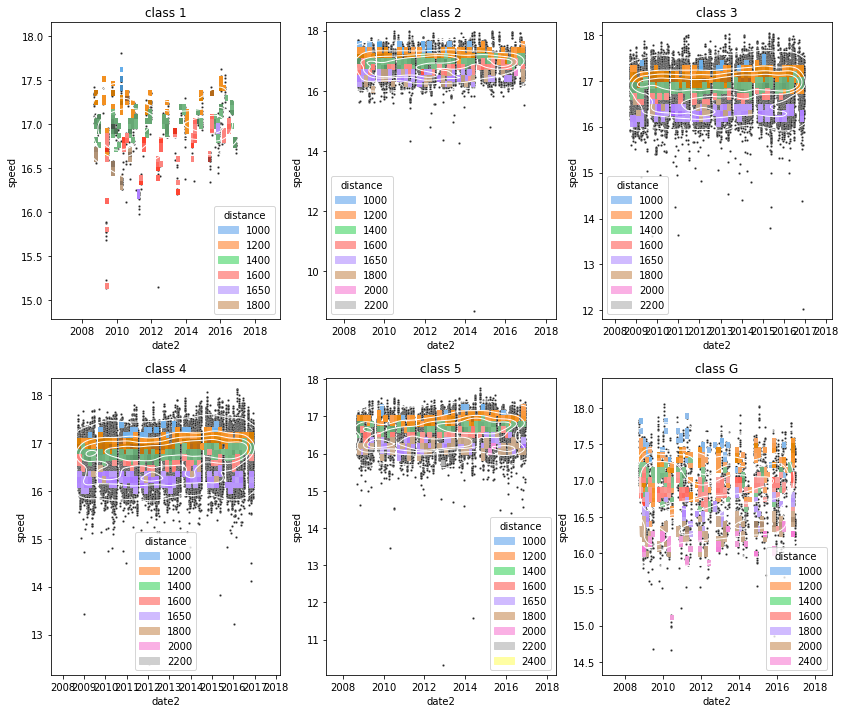

In [56]:
fig = plt.figure(figsize=(14,12))

feat='date2'

plt.subplot(231)
plt.title('class 1')
sns.scatterplot(x=df_race_class.get_group('1')[feat], y=df_race_class.get_group('1')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('1')[feat],y=df_race_class.get_group('1')['speed'],hue=df_race_class.get_group('1')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('1')[feat], y=df_race_class.get_group('1')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(232)
plt.title('class 2')
sns.scatterplot(x=df_race_class.get_group('2')[feat], y=df_race_class.get_group('2')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('2')[feat],y=df_race_class.get_group('2')['speed'],hue=df_race_class.get_group('2')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('2')[feat], y=df_race_class.get_group('2')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(233)
plt.title('class 3')
sns.scatterplot(x=df_race_class.get_group('3')[feat], y=df_race_class.get_group('3')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('3')[feat],y=df_race_class.get_group('3')['speed'],hue=df_race_class.get_group('3')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('3')[feat], y=df_race_class.get_group('3')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(234)
plt.title('class 4')
sns.scatterplot(x=df_race_class.get_group('4')[feat], y=df_race_class.get_group('4')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('4')[feat],y=df_race_class.get_group('4')['speed'],hue=df_race_class.get_group('4')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('4')[feat], y=df_race_class.get_group('4')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(235)
plt.title('class 5')
sns.scatterplot(x=df_race_class.get_group('5')[feat], y=df_race_class.get_group('5')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('5')[feat],y=df_race_class.get_group('5')['speed'],hue=df_race_class.get_group('5')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('5')[feat], y=df_race_class.get_group('5')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(236)
plt.title('class G')
sns.scatterplot(x=df_race_class.get_group('G')[feat], y=df_race_class.get_group('G')['speed'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('G')[feat],y=df_race_class.get_group('G')['speed'],hue=df_race_class.get_group('G')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('G')[feat], y=df_race_class.get_group('G')['speed'], levels=5, color="w", linewidths=1)

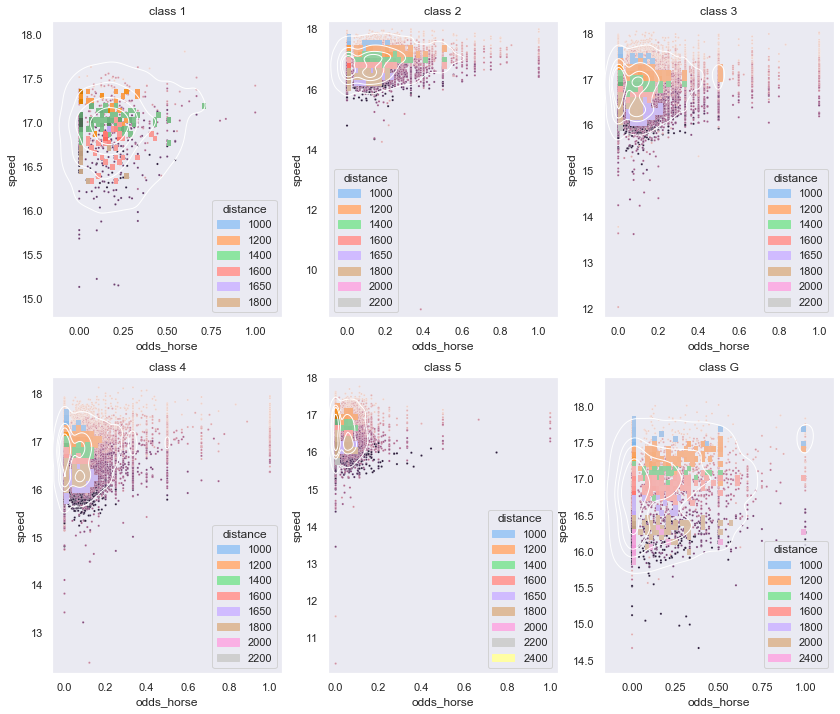

In [84]:
fig = plt.figure(figsize=(14,12))
sns.set_theme(style="dark")
feat='odds_horse'

plt.subplot(231)
plt.title('class 1')
sns.scatterplot(x=df_race_class.get_group('1')[feat], y=df_race_class.get_group('1')['speed'],hue=df_race_class.get_group('1')['distance'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('1')[feat],y=df_race_class.get_group('1')['speed'],hue=df_race_class.get_group('1')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('1')[feat], y=df_race_class.get_group('1')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(232)
plt.title('class 2')
sns.scatterplot(x=df_race_class.get_group('2')[feat], y=df_race_class.get_group('2')['speed'],hue=df_race_class.get_group('2')['distance'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('2')[feat],y=df_race_class.get_group('2')['speed'],hue=df_race_class.get_group('2')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('2')[feat], y=df_race_class.get_group('2')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(233)
plt.title('class 3')
sns.scatterplot(x=df_race_class.get_group('3')[feat], y=df_race_class.get_group('3')['speed'],hue=df_race_class.get_group('3')['distance'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('3')[feat],y=df_race_class.get_group('3')['speed'],hue=df_race_class.get_group('3')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('3')[feat], y=df_race_class.get_group('3')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(234)
plt.title('class 4')
sns.scatterplot(x=df_race_class.get_group('4')[feat], y=df_race_class.get_group('4')['speed'],hue=df_race_class.get_group('4')['distance'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('4')[feat],y=df_race_class.get_group('4')['speed'],hue=df_race_class.get_group('4')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('4')[feat], y=df_race_class.get_group('4')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(235)
plt.title('class 5')
sns.scatterplot(x=df_race_class.get_group('5')[feat], y=df_race_class.get_group('5')['speed'],hue=df_race_class.get_group('5')['distance'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('5')[feat],y=df_race_class.get_group('5')['speed'],hue=df_race_class.get_group('5')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('5')[feat], y=df_race_class.get_group('5')['speed'], levels=5, color="w", linewidths=1)

plt.subplot(236)
plt.title('class G')
sns.scatterplot(x=df_race_class.get_group('G')[feat], y=df_race_class.get_group('G')['speed'],hue=df_race_class.get_group('G')['distance'], s=5, color=".15")
sns.histplot(palette="pastel",x=df_race_class.get_group('G')[feat],y=df_race_class.get_group('G')['speed'],hue=df_race_class.get_group('G')['distance'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df_race_class.get_group('G')[feat], y=df_race_class.get_group('G')['speed'], levels=5, color="w", linewidths=1)

# Pearson's R

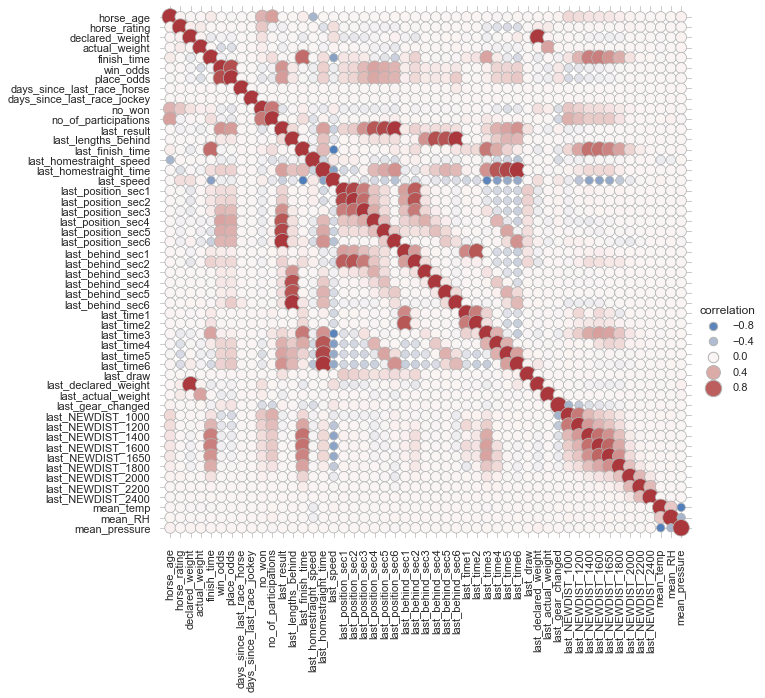

In [10]:
sns.set_theme(style="whitegrid")

# Compute a correlation matrix and convert to long-form
corr_mat = df.drop(cat,axis=1).drop(ids,axis=1).drop(drop_list,axis=1).drop(dates,axis=1).corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(70, 270), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

In [106]:
def Pearsons_R(df,target):
    Pearsons_R=df.corr()
    cmatrix=abs(Pearsons_R).sort_values(by=target,ascending=False)

    weak_Pearsons_R=[]
    for i,j in zip(cmatrix[target].index,cmatrix[target]):
        if j >= 0.3 and j <= 0.7:
            print(str(target),str('-'),i,str(':'),j,str('(moderate)'))
        if j > 0.7:
            print(str(target),str('-'),i,str(':'),j,str('(strong)'))     
        if j < 0.3 and j !=0:
            print(str(target),str('-'),i,str(':'),j,str('(weak)'))
        if j ==0:
            print(str(target),str('-'),i,str(':'),j,str('(no relationship)'))
        if j < 0.05:
            weak_Pearsons_R.append(i)
    return weak_Pearsons_R

In [107]:
weak_Pearsons_R=Pearsons_R(df.drop(cat,axis=1).drop(ids,axis=1).drop(drop_list,axis=1).drop(dates,axis=1),'finish_time')

finish_time - finish_time : 1.0 (strong)
finish_time - last_finish_time : 0.7309109070484998 (strong)
finish_time - last_NEWDIST_1400 : 0.6294734488499173 (moderate)
finish_time - last_NEWDIST_1600 : 0.6255016260405588 (moderate)
finish_time - last_speed : 0.6002062667571486 (moderate)
finish_time - last_NEWDIST_1650 : 0.5225761564666672 (moderate)
finish_time - last_time3 : 0.43881347399391657 (moderate)
finish_time - last_NEWDIST_1800 : 0.3863835205588074 (moderate)
finish_time - last_NEWDIST_1200 : 0.3467660899914673 (moderate)
finish_time - last_position_sec6 : 0.2581336824909779 (weak)
finish_time - last_time6 : 0.2099585937035963 (weak)
finish_time - last_behind_sec2 : 0.20840886503938288 (weak)
finish_time - no_of_participations : 0.14806370391316107 (weak)
finish_time - last_homestraight_time : 0.14633609307786705 (weak)
finish_time - last_position_sec5 : 0.14199042251004826 (weak)
finish_time - last_NEWDIST_2000 : 0.12788310934504402 (weak)
finish_time - last_time2 : 0.1198150

In [131]:
def high_corr_feat_Pearsons_R(df,target):
    feat_corr = df.corr().stack().reset_index(name="correlation")
    feat_corr['abs_correlation']=abs(feat_corr['correlation'])
    feat_corr2=feat_corr[feat_corr.level_0 != feat_corr.level_1].sort_values(by='abs_correlation',ascending=False).iloc[:-2:2]
    discard1=[]
    discard2=[]
    for i,j,k in zip(feat_corr2['level_0'],feat_corr2['level_1'],feat_corr2['abs_correlation']):
        if i!=j:
            if k >= 0.3 and k <= 0.7:
                print(i,str('-'),j,str(':'),k,str('(moderate)'))
            if k > 0.7:
                print(i,str('-'),j,str(':'),k,str('(strong)'))     
            if k < 0.3 and k !=0:
                print(i,str('-'),j,str(':'),k,str('(weak)'))
            if k ==0:
                print(i,str('-'),j,str(':'),k,str('(no relationship)')) 
            if k >= 0.85:
                discard1.append(i)
                discard2.append(j) 
                
    discard_Pearsons_R=[]
    for i,j in zip(discard1,discard2):
        if abs(df.corr()[[target]]).loc[i].values[0] > abs(df.corr()[[target]]).loc[j].values[0]:
            discard_Pearsons_R.append(j)
        if abs(df.corr()[[target]]).loc[j].values[0] > abs(df.corr()[[target]]).loc[i].values[0]:
            discard_Pearsons_R.append(i)

    res = [] 
    for i in discard_Pearsons_R: 
        if i not in res: 
            res.append(i)      
            
    return res

In [132]:
discard_Pearsons_R = high_corr_feat_Pearsons_R(df.drop(cat,axis=1).drop(ids,axis=1).drop(drop_list,axis=1).drop(dates,axis=1),'finish_time')

last_behind_sec6 - last_lengths_behind : 0.9999677203394058 (strong)
last_position_sec6 - last_result : 0.9999244574502846 (strong)
finish_time - better_finish_time : 0.9977424317449106 (strong)
last_declared_weight - declared_weight : 0.9804955668054518 (strong)
last_position_sec2 - last_position_sec1 : 0.9291271335103205 (strong)
last_time5 - last_homestraight_time : 0.9277745724015978 (strong)
last_result - last_position_sec5 : 0.9205109625414469 (strong)
win_odds - place_odds : 0.880301374083064 (strong)
last_behind_sec4 - last_lengths_behind : 0.875258973738971 (strong)
last_lengths_behind - last_behind_sec5 : 0.8555232416780812 (strong)
last_speed - last_finish_time : 0.8538428702588151 (strong)
better_finish_time - better_speed : 0.8518952749548409 (strong)
last_position_sec2 - last_behind_sec2 : 0.8497251454888436 (strong)
last_result - last_position_sec4 : 0.840352528641882 (strong)
last_behind_sec1 - last_time2 : 0.8376243008633112 (strong)
better_speed - finish_time : 0.8354

last_gear_changed - last_position_sec6 : 0.04605850231664738 (weak)
last_behind_sec2 - horse_rating : 0.04603463386636518 (weak)
horse_age - horse_rating : 0.045588411545936215 (weak)
last_position_sec2 - last_gear_changed : 0.045416383033979886 (weak)
last_behind_sec6 - no_won : 0.045121087900520496 (weak)
declared_weight - mean_pressure : 0.04488955294511012 (weak)
no_of_participations - last_homestraight_time : 0.04470066669332306 (weak)
last_position_sec3 - last_gear_changed : 0.04460045879805412 (weak)
last_time5 - horse_age : 0.04458360529072035 (weak)
last_behind_sec5 - finish_time : 0.0444506948827553 (weak)
no_of_participations - last_time6 : 0.044278762871261604 (weak)
last_homestraight_time - last_position_sec3 : 0.04340562304839652 (weak)
last_time2 - last_time6 : 0.043266278824573 (weak)
last_position_sec2 - horse_rating : 0.04276818732117299 (weak)
last_gear_changed - last_position_sec1 : 0.042611464373856274 (weak)
last_declared_weight - mean_temp : 0.04235006309330838 (

no_of_participations - last_position_sec1 : 0.002431185185622168 (weak)
days_since_last_race_horse - last_position_sec4 : 0.002417891411416742 (weak)
last_time5 - mean_pressure : 0.0024143300608277236 (weak)
last_lengths_behind - last_time2 : 0.0023835335721775516 (weak)
last_gear_changed - mean_RH : 0.0023548553064843608 (weak)
mean_temp - last_behind_sec3 : 0.0023528170061027066 (weak)
last_time2 - mean_pressure : 0.002305484780775532 (weak)
mean_temp - last_position_sec5 : 0.002300609923084624 (weak)
days_since_last_race_horse - last_actual_weight : 0.002226158241206172 (weak)
last_result - days_since_last_race_jockey : 0.002223868317607691 (weak)
days_since_last_race_jockey - last_draw : 0.002214437733194296 (weak)
last_time6 - actual_weight : 0.0022042399741486734 (weak)
last_draw - last_finish_time : 0.0021433235556081263 (weak)
days_since_last_race_horse - last_behind_sec3 : 0.0020867540387508672 (weak)
days_since_last_race_jockey - days_since_last_race_horse : 0.002076760153659

# Cramer's V

In [21]:
from scipy.stats import chi2_contingency
#Corrected Cramers'V function
def cramers_corrected_stat(contingency_table):
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2/n
    
    r, k = contingency_table.shape
    r_corrected = r - (((r-1)**2)/(n-1))
    k_corrected = k - (((k-1)**2)/(n-1))
    phi2_corrected = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    
    return (phi2_corrected / min( (k_corrected-1), (r_corrected-1)))**0.5

#Corrected Cramers'V matrix buidlin function
def categorical_corr_matrix(df):

  cols = df.columns
  n = len(cols)
  corr_matrix = pd.DataFrame(np.zeros(shape=(n, n)), index=cols, columns=cols)

  for col1 in cols:
    for col2 in cols:
      if col1 == col2:
        corr_matrix.loc[col1, col2] = 1
        break
      df_crosstab = pd.crosstab(df[col1], df[col2], dropna=True)
      corr_matrix.loc[col1, col2] = cramers_corrected_stat(df_crosstab)
      
      # Flip and add to get full correlation matrix
  corr_matrix += np.tril(corr_matrix, k=-1).T
  return corr_matrix

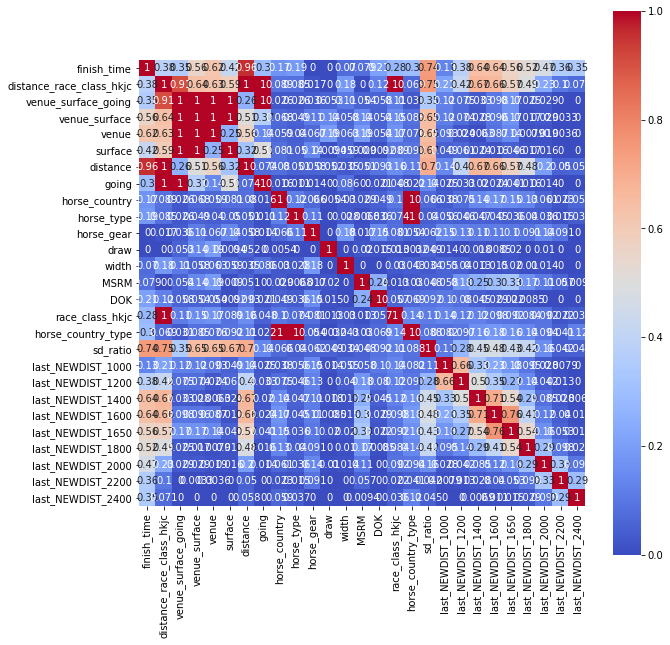

In [22]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap((categorical_corr_matrix(df[cat2])), annot=True, cmap='coolwarm', square=True);

In [26]:
cat2=['finish_time','distance_race_class_hkjc','venue_surface_going','venue_surface','venue','surface','distance','going','horse_country','horse_type','horse_gear','draw','width','MSRM','DOK',
     'race_class_hkjc','horse_country_type','sd_ratio','last_NEWDIST_1000','last_NEWDIST_1200','last_NEWDIST_1400',
      'last_NEWDIST_1600','last_NEWDIST_1650','last_NEWDIST_1800','last_NEWDIST_2000','last_NEWDIST_2200','last_NEWDIST_2400']

In [24]:
def cramers_V(df,target):
    cramersV = categorical_corr_matrix(df)
    cmatrix=cramersV.sort_values(by=target,ascending=False)

    weak_cramers_V=[]
    for i,j in zip(cmatrix[target].index,cmatrix[target]):
        if j >= 0.3 and j <= 0.7:
            print(str(target),str('-'),i,str(':'),j,str('(moderate)'))
        if j > 0.7:
            print(str(target),str('-'),i,str(':'),j,str('(strong)'))     
        if j < 0.3 and j !=0:
            print(str(target),str('-'),i,str(':'),j,str('(weak)'))
        if j ==0:
            print(str(target),str('-'),i,str(':'),j,str('(no relationship)'))
        if j < 0.05:
            weak_cramers_V.append(i)
    return weak_cramers_V

In [25]:
weak_cramers_V=cramers_V(df[cat2],'finish_time')

finish_time - finish_time : 1.0 (strong)
finish_time - distance : 0.9605735513269131 (strong)
finish_time - sd_ratio : 0.743316448974025 (strong)
finish_time - last_NEWDIST_1400 : 0.6426370809489221 (moderate)
finish_time - last_NEWDIST_1600 : 0.6386370294814799 (moderate)
finish_time - venue : 0.617302209987333 (moderate)
finish_time - last_NEWDIST_1650 : 0.5611435870831183 (moderate)
finish_time - venue_surface : 0.5551238812702818 (moderate)
finish_time - last_NEWDIST_1800 : 0.5231840338382865 (moderate)
finish_time - last_NEWDIST_2000 : 0.47132565914818747 (moderate)
finish_time - surface : 0.41905221570226786 (moderate)
finish_time - distance_race_class_hkjc : 0.38159390756085343 (moderate)
finish_time - last_NEWDIST_1200 : 0.379755248052957 (moderate)
finish_time - last_NEWDIST_2200 : 0.35847602266539635 (moderate)
finish_time - venue_surface_going : 0.3530727504596197 (moderate)
finish_time - last_NEWDIST_2400 : 0.3491333861092447 (moderate)
finish_time - going : 0.2961456737169

In [27]:
weak_cramers_V

['draw', 'horse_gear']

In [28]:
  def high_corr_feat_Cramers_V(df,target):
    cramersV = categorical_corr_matrix(df)
    cmatrix=cramersV.sort_values(by=target,ascending=False)
    
    feat_corr = cmatrix.stack().reset_index(name="correlation")
    feat_corr['abs_correlation']=abs(feat_corr['correlation'])
    feat_corr2=feat_corr[feat_corr.level_0 != feat_corr.level_1].sort_values(by='abs_correlation',ascending=False).iloc[:-2:2]
    
    discard1=[]
    discard2=[]
    
    for i,j,k in zip(feat_corr2['level_0'],feat_corr2['level_1'],feat_corr2['abs_correlation']):
        if i!=j:
            if k >= 0.3 and k <= 0.7:
                print(i,str('-'),j,str(':'),k,str('(moderate)'))
            if k > 0.7:
                print(i,str('-'),j,str(':'),k,str('(strong)'))     
            if k < 0.3 and k !=0:
                print(i,str('-'),j,str(':'),k,str('(weak)'))
            if k ==0:
                print(i,str('-'),j,str(':'),k,str('(no relationship)')) 
            if k >= 0.85:
                discard1.append(i)
                discard2.append(j) 
                
    discard_Cramers_V=[]
    for i,j in zip(discard1,discard2):
        if abs(cmatrix[[target]]).loc[i].values[0] > abs(cmatrix[[target]]).loc[j].values[0]:
            discard_Cramers_V.append(j)
        if abs(cmatrix[[target]]).loc[j].values[0] > abs(cmatrix[[target]]).loc[i].values[0]:
            discard_Cramers_V.append(i)
            
    res = [] 
    for i in discard_Cramers_V: 
        if i not in res: 
            res.append(i)             
            
    return res

In [29]:
discard_Cramers_V = high_corr_feat_Cramers_V(df[cat2],'finish_time')

surface - venue_surface : 0.9999937063179128 (strong)
venue - venue_surface : 0.9999937063179127 (strong)
going - venue_surface_going : 0.9999559389565501 (strong)
venue_surface_going - venue_surface : 0.9999118837367137 (strong)
venue - venue_surface_going : 0.9999055906092023 (strong)
surface - venue_surface_going : 0.9999055906092023 (strong)
horse_country_type - horse_country : 0.9996726100446156 (strong)
horse_country_type - horse_type : 0.9996285628718047 (strong)
distance_race_class_hkjc - going : 0.9986710204276774 (strong)
distance_race_class_hkjc - distance : 0.9986647345559072 (strong)
distance_race_class_hkjc - race_class_hkjc : 0.9986458776527383 (strong)
finish_time - distance : 0.9605735513269131 (strong)
venue_surface_going - distance_race_class_hkjc : 0.9087898204223798 (strong)
last_NEWDIST_1600 - last_NEWDIST_1650 : 0.7597242605896048 (strong)
sd_ratio - distance_race_class_hkjc : 0.7470750377134376 (strong)
finish_time - sd_ratio : 0.743316448974025 (strong)
last_NE

In [30]:
discard_Cramers_V

['surface',
 'venue_surface',
 'going',
 'venue_surface_going',
 'horse_country',
 'horse_type',
 'distance_race_class_hkjc',
 'race_class_hkjc',
 'distance']

In [31]:
df2=df.drop(ids,axis=1).drop(drop_list,axis=1).drop(dates,axis=1).drop(cat,axis=1).drop('venue_surface',axis=1).drop('distance_race_class_hkjc',axis=1).drop('last_horse_gear',axis=1)

In [32]:
df2.std(ddof=0).sort_values()

last_gear_changed                0.347472
last_speed                       0.418675
last_time3                       0.866320
horse_age                        0.876758
last_homestraight_time           0.975792
last_time4                       1.027810
last_time5                       1.083345
last_time6                       1.240445
no_won                           1.692085
last_homestraight_speed          2.122067
last_behind_sec2                 2.671922
last_position_sec6               3.376666
last_position_sec5               3.681206
last_time2                       3.695753
last_result                      3.710705
last_position_sec3               3.720894
last_position_sec2               3.729718
last_position_sec1               3.731424
last_draw                        3.746562
last_position_sec4               3.772481
last_behind_sec1                 4.362107
mean_temp                        5.119216
mean_pressure                    5.954640
actual_weight                    6

# Data Processing

In [34]:
df=pd.read_csv('df.csv')

In [30]:
better_speed2=df.sort_values(['date','race_id']).groupby(['horse_id','distance']).fillna(method='bfill')[['better_speed']]

In [31]:
df['better_speed']=better_speed2

In [ ]:
df['better_finish_time']=df.distance/df.better_speed

In [133]:
# replace nans with zeros
zeros=['last_gear_changed','last_NEWDIST_1000','last_NEWDIST_1200','last_NEWDIST_1400','last_NEWDIST_1600','last_NEWDIST_1650',
       'last_NEWDIST_1800','last_NEWDIST_2000', 'last_time1', 'last_time2','last_time3', 'last_time4', 'last_time6']

lateralfill=['last_position_sec1','last_position_sec2', 'last_position_sec3']

lateralfill2=['last_position_sec4', 'last_position_sec5', 'last_position_sec6','last_behind_sec1', 'last_behind_sec2']

In [134]:
df.loc[:][zeros]=df.loc[:][zeros].replace({np.nan:0})

In [135]:
def myround(x, base=5):
    return base * round(x/base)

In [136]:
myround(79447*0.8,14) #split 80% of data into training set and round to closest 14

63560

In [137]:
train=df.sort_values('date',ascending=True).iloc[:][0:63560]
test=df.sort_values('date',ascending=True).iloc[:][63560:79447]

In [138]:
#feats that impute with means
means=['last_finish_time','better_speed','better_finish_time']

#feats that use to group and impute
condi=['distance','race_class_hkjc','venue','surface','horse_country_type']

In [139]:
for i in reversed(range(0,len(condi))):
    train[means]=train.groupby(condi[0:i+1])[means].transform(lambda grp: grp.fillna(grp.mean()))

In [140]:
for i in reversed(range(0,len(condi))):
    test[means]=test.groupby(condi[0:i+1])[means].transform(lambda grp: grp.fillna(grp.mean()))

In [141]:
for i in means:
    print(i,str(':'),train[i].isnull().sum())

last_finish_time : 0
better_speed : 0
better_finish_time : 0


In [142]:
for i in means:
    print(i,str(':'),test[i].isnull().sum())

last_finish_time : 0
better_speed : 0
better_finish_time : 0


In [143]:
# fill positions with median
train[lateralfill]=train.sort_values(['date','race_id']).groupby(['distance','race_class_hkjc']).transform(lambda grp: grp.median())[lateralfill]

In [144]:
for i in lateralfill:
    print(i,str(':'),train[i].isnull().sum())

last_position_sec1 : 0
last_position_sec2 : 0
last_position_sec3 : 0


In [145]:
train[lateralfill]=train.sort_values(['date','race_id']).groupby(['distance']).transform(lambda grp: grp.median())[lateralfill]

In [146]:
for i in lateralfill:
    print(i,str(':'),train[i].isnull().sum())

last_position_sec1 : 0
last_position_sec2 : 0
last_position_sec3 : 0


In [147]:
test[lateralfill]=test.sort_values(['date','race_id']).groupby(['distance','race_class_hkjc']).transform(lambda grp: grp.median())[lateralfill]

In [148]:
test[lateralfill]=test.sort_values(['date','race_id']).groupby(['distance']).transform(lambda grp: grp.median())[lateralfill]

In [149]:
for i in lateralfill:
    print(i,str(':'),test[i].isnull().sum())

last_position_sec1 : 0
last_position_sec2 : 0
last_position_sec3 : 0


In [150]:
for i in lateralfill2:
    print(i,str(':'),train[i].isnull().sum())

last_position_sec4 : 28593
last_position_sec5 : 56090
last_position_sec6 : 62675
last_behind_sec1 : 3742
last_behind_sec2 : 3742


In [151]:
for i in lateralfill2:
    print(i,str(':'),test[i].isnull().sum())

last_position_sec4 : 7281
last_position_sec5 : 13961
last_position_sec6 : 15611
last_behind_sec1 : 663
last_behind_sec2 : 663


In [152]:
train['last_position_sec4']=train.last_position_sec4.fillna(train.last_position_sec3)
train['last_position_sec5']=train.last_position_sec4.fillna(train.last_position_sec3)
train['last_position_sec6']=train.last_position_sec4.fillna(train.last_position_sec3)

test['last_position_sec4']=test.last_position_sec4.fillna(test.last_position_sec3)
test['last_position_sec5']=test.last_position_sec4.fillna(test.last_position_sec3)
test['last_position_sec6']=test.last_position_sec4.fillna(test.last_position_sec3)

In [153]:
for i in lateralfill2:
    print(i,str(':'),train[i].isnull().sum())

last_position_sec4 : 0
last_position_sec5 : 0
last_position_sec6 : 0
last_behind_sec1 : 3742
last_behind_sec2 : 3742


In [154]:
for i in lateralfill2:
    print(i,str(':'),test[i].isnull().sum())

last_position_sec4 : 0
last_position_sec5 : 0
last_position_sec6 : 0
last_behind_sec1 : 663
last_behind_sec2 : 663


In [155]:
train[lateralfill2]=train.sort_values(['date','race_id']).groupby(['distance','race_class_hkjc']).transform(lambda grp: grp.median())[lateralfill2]
train[lateralfill2]=train.sort_values(['date','race_id']).groupby(['distance']).transform(lambda grp: grp.median())[lateralfill2]

In [156]:
test[lateralfill2]=test.sort_values(['date','race_id']).groupby(['distance','race_class_hkjc']).transform(lambda grp: grp.median())[lateralfill2]
test[lateralfill2]=test.sort_values(['date','race_id']).groupby(['distance']).transform(lambda grp: grp.median())[lateralfill2]

In [157]:
for i in lateralfill2:
    print(i,str(':'),train[i].isnull().sum())

last_position_sec4 : 0
last_position_sec5 : 0
last_position_sec6 : 0
last_behind_sec1 : 0
last_behind_sec2 : 0


In [158]:
for i in lateralfill2:
    print(i,str(':'),test[i].isnull().sum())

last_position_sec4 : 0
last_position_sec5 : 0
last_position_sec6 : 0
last_behind_sec1 : 0
last_behind_sec2 : 0


In [159]:
for i,j in zip(train.drop(ids,axis=1).drop(drop_list,axis=1).drop(dates,axis=1).drop(discard_Pearsons_R,axis=1).drop(discard_Cramers_V,axis=1).drop(weak_Pearsons_R,axis=1).drop(weak_cramers_V,axis=1).isnull().sum().index,train.drop(ids,axis=1).drop(drop_list,axis=1).drop(dates,axis=1).drop(discard_Pearsons_R,axis=1).drop(discard_Cramers_V,axis=1).drop(weak_Pearsons_R,axis=1).drop(weak_cramers_V,axis=1).isnull().sum()):
    if j > 0:
        print(i,str(':'),j)

last_homestraight_time : 3742
last_horse_gear : 3742


In [160]:
for i,j in zip(test.drop(ids,axis=1).drop(drop_list,axis=1).drop(dates,axis=1).drop(discard_Pearsons_R,axis=1).drop(discard_Cramers_V,axis=1).drop(weak_Pearsons_R,axis=1).drop(weak_cramers_V,axis=1).isnull().sum().index,test.drop(ids,axis=1).drop(drop_list,axis=1).drop(dates,axis=1).drop(discard_Pearsons_R,axis=1).drop(discard_Cramers_V,axis=1).drop(weak_Pearsons_R,axis=1).drop(weak_cramers_V,axis=1).isnull().sum()):
    if j > 0:
        print(i,str(':'),j)

last_homestraight_time : 663
last_horse_gear : 663


In [161]:
train.sort_values(['date','race_id']).groupby(['distance','race_class_hkjc'])[['last_horse_gear']].apply(lambda grp: grp.mode())

last_horse_gear
distance race_class_hkjc                  
1000     1               0              --
         2               0              --
         3               0              --
         4               0              --
         5               0              --
         G               0              --
1200     1               0              --
         2               0              --
         3               0              --
         4               0              --
         5               0              --
         G               0              --
1400     1               0              --
         2               0              --
         3               0              --
         4               0              --
         5               0              --
         G               0              --
1600     1               0              --
         2               0              --
         3               0              --
         4               0              --
         5               0              --
         G               0              --
1650     1               0              --
         2               0              --
         3               0              --
         4               0              --
         5               0              --
1800     1               0              --
         2               0              --
         3               0              --
         4               0              --
         5               0              --
         G               0              --
2000     2               0              --
         3               0              --
         4               0              --
         5               0              --
         G               0              --
2200     2               0              --
         3               0              --
         4               0              --
         5               0              --
2400     5               0              --
         G               0              --

In [162]:
train['last_horse_gear']=train['last_horse_gear'].replace({np.nan:'--'})

In [163]:
test['last_horse_gear']=test['last_horse_gear'].replace({np.nan:'--'})

In [164]:
test.shape

(15887, 138)

In [165]:
for i,j in zip(train.drop(ids,axis=1).drop(drop_list,axis=1).drop(dates,axis=1).drop(discard_Pearsons_R,axis=1).drop(discard_Cramers_V,axis=1).drop(weak_Pearsons_R,axis=1).drop(weak_cramers_V,axis=1).isnull().sum().index,test.drop(ids,axis=1).drop(drop_list,axis=1).drop(dates,axis=1).drop(discard_Pearsons_R,axis=1).drop(discard_Cramers_V,axis=1).drop(weak_Pearsons_R,axis=1).drop(weak_cramers_V,axis=1).isnull().sum()):
    if j > 0:
        print(i,str(':'),j)

last_homestraight_time : 663


In [166]:
for i,j in zip(test.drop(ids,axis=1).drop(drop_list,axis=1).drop(dates,axis=1).drop(discard_Pearsons_R,axis=1).drop(discard_Cramers_V,axis=1).drop(weak_Pearsons_R,axis=1).drop(weak_cramers_V,axis=1).isnull().sum().index,test.drop(ids,axis=1).drop(drop_list,axis=1).drop(dates,axis=1).drop(discard_Pearsons_R,axis=1).drop(discard_Cramers_V,axis=1).drop(weak_Pearsons_R,axis=1).drop(weak_cramers_V,axis=1).isnull().sum()):
    if j > 0:
        print(i,str(':'),j)

last_homestraight_time : 663


# Ordinal Encoding

In [167]:
train=train.replace({'ST':'0','HV':1})
train['venue']=train['venue'].astype('int')

In [168]:
test=test.replace({'ST':'0','HV':1})
test['venue']=test['venue'].astype('int')

# Target Encoding

In [169]:
for i in ['last_horse_gear','horse_country_type']:
    print('The number of categories of ',i, str(':'), len(train[i].unique()))

The number of categories of  last_horse_gear : 513
The number of categories of  horse_country_type : 64


In [170]:
train.drop(ids,axis=1).drop(drop_list,axis=1).drop(dates,axis=1).drop(discard_Pearsons_R,axis=1).drop(discard_Cramers_V,axis=1).drop(weak_Pearsons_R,axis=1).drop(weak_cramers_V,axis=1).select_dtypes('object').head()

last_horse_gear horse_country_type
0                --        AUS_Gelding
100              --        IRE_Gelding
99               --         NZ_Gelding
98               --         NZ_Gelding
97               --         NZ_Gelding

In [171]:
def calc_smooth_mean(df, feat, target, m):
    # Compute the global mean
    mean = df[target].replace({np.NaN:df[feat].mode().values[0]}).mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(feat)[target].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return df[feat].replace({np.NaN:df[feat].mode().values[0]}).map(smooth)

In [172]:
train['last_horse_gear']=calc_smooth_mean(train,'last_horse_gear','finish_time',300)
test['last_horse_gear']=calc_smooth_mean(test,'last_horse_gear','finish_time',300)

In [173]:
train['horse_country_type']=calc_smooth_mean(train,'horse_country_type','finish_time',300)
test['horse_country_type']=calc_smooth_mean(test,'horse_country_type','finish_time',300)

In [174]:
train=train.replace({np.inf:1})
test=test.replace({np.inf:1})

In [175]:
train2=train.drop(ids,axis=1).drop(drop_list,axis=1).drop(dates,axis=1).drop(discard_Pearsons_R,axis=1).drop(discard_Cramers_V,axis=1).drop(weak_Pearsons_R,axis=1).drop(weak_cramers_V,axis=1)

In [176]:
test2=test.drop(ids,axis=1).drop(drop_list,axis=1).drop(dates,axis=1).drop(discard_Pearsons_R,axis=1).drop(discard_Cramers_V,axis=1).drop(weak_Pearsons_R,axis=1).drop(weak_cramers_V,axis=1)

In [182]:
train[['better_finish_time','finish_time']]

better_finish_time  finish_time
0               83.920000        83.92
100             56.720000        56.72
99              57.910000        57.91
98              56.730000        56.73
97              57.253605        56.76
...                   ...          ...
63487           57.280000        56.87
63496           58.006028        57.73
63485           57.620000        57.44
63471           68.840000        73.95
63486           58.050000        57.43

[63560 rows x 2 columns]

In [184]:
((train.better_finish_time - train.finish_time).sum())/train.shape[0]

-0.060948880432542867

In [189]:
abs(train.better_finish_time - train.finish_time) > 0.7

0        False
100      False
99       False
98       False
97       False
         ...  
63487    False
63496    False
63485    False
63471     True
63486    False
Length: 63560, dtype: bool

In [177]:
for i in train2.columns:
    print(i,str(':'),train2[i].isnull().sum())

venue : 0
horse_age : 0
declared_weight : 0
finish_time : 0
win_odds : 0
width : 0
MSRM : 0
no_won : 0
no_of_participations : 0
last_finish_time : 0
last_homestraight_time : 3742
last_position_sec2 : 0
last_position_sec3 : 0
last_position_sec4 : 0
last_position_sec5 : 0
last_position_sec6 : 0
last_behind_sec1 : 0
last_behind_sec2 : 0
last_time1 : 0
last_time2 : 0
last_time3 : 0
last_time4 : 0
last_time6 : 0
last_horse_gear : 0
DOK : 0
last_gear_changed : 0
last_NEWDIST_1000 : 0
last_NEWDIST_1200 : 0
last_NEWDIST_1400 : 0
last_NEWDIST_1600 : 0
last_NEWDIST_1650 : 0
last_NEWDIST_1800 : 0
last_NEWDIST_2000 : 0
horse_country_type : 0
sd_ratio : 0


In [127]:
train2.shape, test2.shape

((63560, 36), (15887, 36))

In [128]:
train2

venue  horse_age  declared_weight  finish_time  win_odds  width  MSRM  \
0          0          3           1020.0        83.92       9.7   30.5     5   
100        0          3           1096.0        56.72       6.3   30.5    11   
99         0          3           1212.0        57.91       2.7   30.5     2   
98         0          3           1182.0        56.73      24.0   30.5    10   
97         0          3           1179.0        56.76      26.0   30.5     9   
...      ...        ...              ...          ...       ...    ...   ...   
63487      0          5           1163.0        56.87      11.0   22.5    13   
63496      0          3           1051.0        57.73      12.0   30.5     1   
63485      0          4           1171.0        57.44      11.0   22.5     9   
63471      0          3           1043.0        73.95       4.0   22.5     5   
63486      0          5           1096.0        57.43      62.0   22.5     8   

       no_won  no_of_participations  last_finish_time  ...  last_NEWDIST_1200  \
0           0                     1         85.573962  ...                0.0   
100         0                     1         70.355870  ...                0.0   
99          0                     1         66.992527  ...                0.0   
98          0                     1         66.992527  ...                0.0   
97          0                     1         66.992527  ...                0.0   
...       ...                   ...               ...  ...                ...   
63487       4                    29         57.280000  ...                0.0   
63496       0                     9         71.570000  ...                1.0   
63485       2                    12         57.620000  ...                0.0   
63471       2                    18         68.840000  ...                1.0   
63486       2                    21         58.050000  ...                0.0   

       last_NEWDIST_1400  last_NEWDIST_1600  last_NEWDIST_1650  \
0                    0.0                0.0                0.0   
100                  0.0                0.0                0.0   
99                   0.0                0.0                0.0   
98                   0.0                0.0                0.0   
97                   0.0                0.0                0.0   
...                  ...                ...                ...   
63487                0.0                0.0                0.0   
63496                1.0                0.0                0.0   
63485                0.0                0.0                0.0   
63471                0.0                0.0                0.0   
63486                0.0                0.0                0.0   

       last_NEWDIST_1800  last_NEWDIST_2000  horse_country_type  sd_ratio  \
0                    0.0                0.0           82.368037       2.0   
100                  0.0                0.0           88.528343       1.0   
99                   0.0                0.0           86.298368       1.0   
98                   0.0                0.0           86.298368       1.0   
97                   0.0                0.0           86.298368       1.0   
...                  ...                ...                 ...       ...   
63487                0.0                0.0           86.298368       1.0   
63496                0.0                0.0           86.298368       1.0   
63485                0.0                0.0           82.368037       1.0   
63471                0.0                0.0           86.298368       2.0   
63486                0.0                0.0           85.277028       1.0   

       better_speed  better_finish_time  
0         16.682555           83.920000  
100       17.630465           56.720000  
99        17.268175           57.910000  
98        17.627358           56.730000  
97        17.468238           57.253605  
...             ...                 ...  
63487     17.458101           57.280000  
63496     17.244008

# Min Max Scaling

In [364]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [190]:
X_train = train2.drop('finish_time',axis=1)
X_test = test2.drop('finish_time',axis=1)

y_train = train2[['finish_time']]
y_test = test2[['finish_time']]

In [237]:
num=['horse_age','declared_weight','win_odds','no_won','no_of_participations','last_finish_time','last_position_sec2',
             'last_position_sec3','last_position_sec4','last_position_sec5','last_position_sec6','last_behind_sec1',
             'last_behind_sec2','last_time1','last_time2','last_time3','last_time4','last_time6']

In [236]:
cat=['venue','width','MSRM','last_horse_gear','DOK','last_gear_changed','horse_country_type','sd_ratio',
 'last_NEWDIST_1000','last_NEWDIST_1200','last_NEWDIST_1400','last_NEWDIST_1600','last_NEWDIST_1650',
 'last_NEWDIST_1800','last_NEWDIST_2000',]

In [193]:
X_train[num]=scaler.fit_transform(X_train[num])
X_test[num]=scaler.fit_transform(X_test[num])

In [194]:
X_train.head()

venue  horse_age  declared_weight  win_odds  width  MSRM  no_won  \
0        0   0.142857         0.483728  0.088776   30.5     5     0.0   
100      0   0.142857         0.596154  0.054082   30.5    11     0.0   
99       0   0.142857         0.767751  0.017347   30.5     2     0.0   
98       0   0.142857         0.723373  0.234694   30.5    10     0.0   
97       0   0.142857         0.718935  0.255102   30.5     9     0.0   

     no_of_participations  last_finish_time  last_homestraight_time  ...  \
0                     0.0          0.279124                     NaN  ...   
100                   0.0          0.138489                     NaN  ...   
99                    0.0          0.107407                     NaN  ...   
98                    0.0          0.107407                     NaN  ...   
97                    0.0          0.107407                     NaN  ...   

     last_gear_changed  last_NEWDIST_1000  last_NEWDIST_1200  \
0                  0.0                0.0                0.0   
100                0.0                0.0                0.0   
99                 0.0                0.0                0.0   
98                 0.0                0.0                0.0   
97                 0.0                0.0                0.0   

     last_NEWDIST_1400  last_NEWDIST_1600  last_NEWDIST_1650  \
0                  0.0                0.0                0.0   
100                0.0                0.0                0.0   
99                 0.0                0.0                0.0   
98                 0.0                0.0                0.0   
97                 0.0                0.0                0.0   

     last_NEWDIST_1800  last_NEWDIST_2000  horse_country_type  sd_ratio  
0                  0.0                0.0           82.368037       2.0  
100                0.0                0.0           88.528343       1.0  
99                 0.0                0.0           86.298368       1.0  
98                 0.0                0.0           86.298368       1.0  
97                 0.0                0.0           86.298368       1.0  

[5 rows x 34 columns]

In [195]:
y_test.head()

finish_time
63472        71.37
63473        69.89
63474        72.34
63476        71.36
63477        70.92

In [12]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

# Modeling

In [2]:
import xgboost 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# Naive modeling

In [91]:
# fit regressor
xgb=xgboost.XGBRegressor()
rf=RandomForestRegressor()
knn=KNeighborsRegressor(n_neighbors=2)
svr = svm.SVR()
poly_rgs = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])

lasso = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('LassoLars', linear_model.LassoLars(alpha=.1))])

br = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('BayesianRidge', linear_model.BayesianRidge())])

sgdr = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('SGDRegressor', linear_model.SGDRegressor(max_iter=1000, tol=1e-3))])

huber = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('HuberRegressor', linear_model.HuberRegressor(max_iter=1000))])

mlp = MLPRegressor()

ada = AdaBoostRegressor(random_state=0, n_estimators=100)

gbr = GradientBoostingRegressor(random_state=0)

In [92]:
def modeling(model,X,Y,kfold,scoring):
    results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))
    return results

In [132]:
modeling(xgb, X_train, y_train.values.ravel(), 5, 'neg_mean_absolute_error')

MAE: -0.720 (0.032)


In [133]:
modeling(rf, X_train, y_train.values.ravel(), 5, 'neg_mean_absolute_error')

MAE: -0.734 (0.032)


In [134]:
modeling(knn, X_train, y_train.values.ravel(), 5, 'neg_mean_absolute_error')

MAE: -3.143 (0.240)


In [140]:
modeling(svr, X_train, y_train.values.ravel(), 5, 'neg_mean_absolute_error')

MAE: -10.659 (0.291)


In [21]:
modeling(poly_rgs, X_train, y_train.values.ravel(), 5, 'neg_mean_absolute_error')

MAE: -161.009 (244.864)


array([-138.47301541,   -4.78468019,  -20.01101982, -640.16413829,
         -1.61260062])

In [22]:
modeling(lasso, X_train, y_train.values.ravel(), 5, 'neg_mean_absolute_error')

MAE: -15.607 (0.206)


array([-15.31173318, -15.67257511, -15.72775687, -15.88604897,
       -15.43741007])

In [24]:
modeling(br, X_train, y_train.values.ravel(), 5, 'neg_mean_absolute_error')

MAE: -0.733 (0.052)


array([-0.82596783, -0.74082732, -0.67205601, -0.70687227, -0.72017162])

In [28]:
modeling(sgdr, X_train, y_train.values.ravel(), 5, 'neg_mean_absolute_error')

MAE: -96056665870293581824.000 (51418530422099279872.000)


array([-1.41973203e+20, -6.07082451e+19, -1.08116253e+20, -1.53517980e+20,
       -1.59676478e+19])

In [30]:
modeling(huber, X_train, y_train.values.ravel(), 5, 'neg_mean_absolute_error')

F:\Anaconda\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
F:\Anaconda\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
F:\Anaconda\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

MAE: -3.475 (0.110)


array([-3.51171735, -3.57801662, -3.36973686, -3.32159421, -3.59405283])

In [35]:
modeling(huber, X_train, y_train.values.ravel(), 5, 'neg_mean_absolute_error')# take 2,@500

F:\Anaconda\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
F:\Anaconda\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
F:\Anaconda\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

MAE: -3.475 (0.110)


array([-3.51171735, -3.57801662, -3.36973686, -3.32159421, -3.59405283])

In [34]:
modeling(mlp, X_train, y_train.values.ravel(), 5, 'neg_mean_absolute_error')

MAE: -0.933 (0.134)


array([-0.83120453, -0.77135978, -0.99334772, -0.91460603, -1.15428116])

In [87]:
modeling(ada, X_train, y_train.values.ravel(), 5, 'neg_mean_absolute_error')

MAE: -2.903 (0.900)


array([-2.36858725, -2.64979801, -2.14220755, -4.65800418, -2.6972503 ])

In [88]:
modeling(gbr, X_train, y_train.values.ravel(), 5, 'neg_mean_absolute_error')

MAE: -0.733 (0.032)


array([-0.77254713, -0.76038456, -0.68700483, -0.70562277, -0.73981198])

In [42]:
MAE={'xgb':-0.720,'rfr':-0.734,'knn':-3.143,'svr':-10.659,'ploy':-161.009,'lasso':-15.607,'br':-0.733,'sgdr':-96056665870293581824,'huber':-3.475 ,'mlp':-0.933}
std={'xgb':0.032,'rfr':0.032,'knn':0.240,'svr':0.291,'ploy':244.864,'lasso':0.206,'br':0.052,'sgdr':51418530422099279872.000,'huber':0.110 ,'mlp':0.134}

In [45]:
res = pd.DataFrame([MAE,std],index=['MAE','std'])

In [57]:
res

xgb    rfr    knn     svr     ploy   lasso     br  \
MAE -0.720 -0.734 -3.143 -10.659 -161.009 -15.607 -0.733   
std  0.032  0.032  0.240   0.291  244.864   0.206  0.052   

                       sgdr  huber    mlp  
MAE   -96056665870293581824 -3.475 -0.933  
std  51418530422099279872.0  0.110  0.134

# Hyperameters tuning with grid search, randomized search cv, Bayesian Opt.

In [2]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [4]:
from bayes_opt import BayesianOptimization
from bayes_opt.util import Colours
from bayes_opt import SequentialDomainReductionTransformer

In [4]:
def svr_cv(C, gamma, data, targets):
    estimator = svm.SVR(C=C, gamma=gamma)
    cval = cross_val_score(estimator, data, targets, scoring='neg_mean_absolute_error', cv=4)
    return cval.mean()

In [5]:
def optimize_svr(data, targets):
    """Apply Bayesian Optimization to SVC parameters."""
    def svr_crossval(expC, expGamma):
        """Wrapper of SVC cross validation.
        Notice how we transform between regular and log scale. While this
        is not technically necessary, it greatly improves the performance
        of the optimizer.
        """
        C = 10 ** expC
        gamma = 10 ** expGamma
        return svr_cv(C=C, gamma=gamma, data=data, targets=targets)

    optimizer = BayesianOptimization(
        f=svr_crossval,
        pbounds={"expC": (2, 3), "expGamma": (-5, 0)},
        verbose=2,
        bounds_transformer=bounds_transformer
    )
    optimizer.maximize(n_iter=10)

    print("Final result:", optimizer.max)

In [6]:
def rfr_cv(n_estimators, min_samples_split, max_features, data, targets):
    estimator = RandomForestRegressor(
        n_estimators=n_estimators,
        min_samples_split=min_samples_split,
        max_features=max_features,
        random_state=2
    )
    cval = cross_val_score(estimator, data, targets,scoring='neg_mean_absolute_error', cv=4)
    return cval.mean()

In [7]:
def optimize_rfr(data, targets):
    """Apply Bayesian Optimization to Random Forest parameters."""
    def rfr_crossval(n_estimators, min_samples_split, max_features):
        """Wrapper of RandomForest cross validation.
        Notice how we ensure n_estimators and min_samples_split are casted
        to integer before we pass them along. Moreover, to avoid max_features
        taking values outside the (0, 1) range, we also ensure it is capped
        accordingly.
        """
        return rfr_cv(
            n_estimators=int(n_estimators),
            min_samples_split=int(min_samples_split),
            max_features=max(min(max_features, 0.999), 1e-3),
            data=data,
            targets=targets,
        )

    optimizer = BayesianOptimization(
        f=rfr_crossval,
        pbounds={
            "n_estimators": (10, 250),
            "min_samples_split": (2, 25),
            "max_features": (0.1, 0.999),
        },
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=10)

    print("Final result:", optimizer.max)

In [13]:
bounds_transformer = SequentialDomainReductionTransformer()

In [ ]:
'''print(Colours.yellow("--- Optimizing SVM ---"))
optimize_svr(X_train, y_train.values.ravel())'''

--- Optimizing SVM ---
|   iter    |  target   |   expC    | expGamma  |
-------------------------------------------------
|  1        | -3.754    | -0.3677   | -2.264    |
|  2        | -3.661    |  0.337    | -3.194    |
|  3        | -15.26    | -2.392    | -3.386    |
|  4        | -9.664    | -0.2294   | -3.751    |
|  5        | -15.01    | -2.983    | -1.986    |
|  6        | -1.319    |  1.554    | -2.476    |
|  7        | -1.767    |  0.7745   | -1.866    |
|  8        | -1.303    |  2.0      | -3.025    |
|  9        | -2.587    |  1.472    | -3.492    |
|  10       | -1.893    |  1.205    | -2.743    |


In [ ]:
print(Colours.yellow("--- Optimizing SVM ---"))
optimize_svr(X_train, y_train.values.ravel())

--- Optimizing SVM ---
|   iter    |  target   |   expC    | expGamma  |
-------------------------------------------------
|  1        | -0.8076   |  2.22     | -2.039    |
|  2        | -4.94     |  2.385    | -0.01055  |
|  3        | -2.598    |  2.409    | -4.402    |


In [23]:
print(Colours.green("--- Optimizing Random Forest ---"))
optimize_rfr(X_train, y_train.values.ravel())

--- Optimizing Random Forest ---
|   iter    |  target   | max_fe... | min_sa... | n_esti... |
-------------------------------------------------------------
|  1        | -0.7258   |  0.2722   |  16.31    |  115.1    |
|  2        | -0.7245   |  0.806    |  19.94    |  75.42    |
|  3        | -0.719    |  0.3485   |  20.44    |  240.0    |
|  4        | -0.7282   |  0.8875   |  10.23    |  130.2    |
|  5        | -0.7234   |  0.7144   |  18.39    |  98.86    |
|  6        | -0.7327   |  0.999    |  2.0      |  221.1    |
|  7        | -0.7185   |  0.3838   |  20.71    |  240.9    |
|  8        | -0.9348   |  0.1      |  13.06    |  250.0    |
|  9        | -0.7249   |  0.8673   |  19.55    |  87.2     |
|  10       | -0.7309   |  0.9688   |  7.613    |  105.8    |
|  11       | -0.9263   |  0.1      |  8.075    |  91.76    |
|  12       | -0.726    |  0.999    |  20.48    |  107.1    |
|  13       | -0.7267   |  0.673    |  6.185    |  118.0    |
|  14       | -0.7232   |  0.8272   |

In [156]:
# XBG
param_tuning_xgb = {'learning_rate': [0.01, 0.1],'max_depth': [3, 5, 7, 10],'min_child_weight': [1, 3, 5],'subsample': [0.5, 0.7],
                'colsample_bytree': [0.5, 0.7],'n_estimators' : [100, 200, 500],'objective': ['reg:squarederror']}

gs_xgb = gs(xgb, param_tuning_xgb, X_train, y_train.values.ravel())
gs_xgb

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

# XGB:

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

# KNN

In [69]:
# Import HyperOpt Library
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [20]:
def hyperopt_train_test(params):
    rgs = KNeighborsRegressor(n_jobs=-1,**params)
    return cross_val_score(rgs, X_train, y_train.values.ravel()).mean()

In [24]:
# Define the search space.
space = {
    'n_neighbors': hp.randint('n_neighbors', 1, 30),
    'leaf_size': hp.randint('leaf_size', 30, 500),
    'weights': hp.choice('weights', ['uniform', 'distance']),
    'algorithm': hp.choice('algorithm', ['auto', 'ball_tree','kd_tree','brute']),
}

In [25]:
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

In [26]:
trials = Trials()
best = fmin(f, space, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:')
print(best)

100%|█████████████████████████████████████████████| 100/100 [51:36<00:00, 30.97s/trial, best loss: -0.8584495867940612]
best:
{'algorithm': 3, 'leaf_size': 223, 'n_neighbors': 4, 'weights': 1}


In [174]:
search_space_knn = {'n_neighbors':[5,6,7,8,9,10],'leaf_size':[1,2,3,5],'weights':['uniform', 'distance'],
                    'algorithm':['auto', 'ball_tree','kd_tree','brute'],'n_jobs':[-1]}

rgs = RandomizedSearchCV(KNeighborsRegressor(), search_space_knn, random_state=0, scoring='neg_mean_absolute_error', n_jobs=3)
search = rgs.fit(X_train, y_train.values.ravel())
search.best_params_

{'weights': 'distance',
 'n_neighbors': 5,
 'n_jobs': -1,
 'leaf_size': 2,
 'algorithm': 'brute'}

Best of knn:

RandomizedSearchCV: {'weights': 'distance',
 'n_neighbors': 5,
 'n_jobs': -1,
 'leaf_size': 2,
 'algorithm': 'brute'}
 
 Hyperot: {'algorithm': 3, 'leaf_size': 223, 'n_neighbors': 4, 'weights': 1}

# Random Forest

In [34]:
def hyperopt_train_test_rfr(params):
    rgs = RandomForestRegressor(n_jobs=-1,criterion='mae',random_state=42,**params)
    return cross_val_score(rgs, X_train, y_train.values.ravel()).mean()

In [43]:
# Define the search space.
space_rfr = {
    'n_estimators': hp.randint('n_estimators', 50, 500),
    'min_samples_split': hp.randint('min_samples_split', 30, 500),
    'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2']),
}

In [46]:
def f_rfr(params):
    acc = hyperopt_train_test_rfr(params)
    return {'loss': -acc, 'status': STATUS_OK}

In [ ]:
trials = Trials()
best_rfr = fmin(f_rfr, space_rfr, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:')
print(best_rfr)

  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

# MLP

In [78]:
def hyperopt_train_test_mlp(params):
    rgs = MLPRegressor(**params)
    return cross_val_score(rgs, X_train, y_train.values.ravel()).mean()

In [79]:
# Define the search space.
space_mlp = {
    'hidden_layer_sizes': hp.randint('hidden_layer_sizes', 11, 200),
    'activation': hp.choice('activation', ['identity', 'logistic', 'tanh', 'relu'])
}

In [80]:
def f_mlp(params):
    acc = hyperopt_train_test_mlp(params)
    return {'loss': -acc, 'status': STATUS_OK}

In [81]:
trials = Trials()
best_mlp = fmin(f_mlp, space_mlp, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:')
print(best_mlp)

 10%|████▎                                      | 10/100 [20:01<2:40:34, 107.05s/trial, best loss: -0.9954352070676844]

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



 11%|████▊                                       | 11/100 [21:07<2:20:35, 94.78s/trial, best loss: -0.9954352070676844]

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



 12%|█████▎                                      | 12/100 [22:14<2:06:42, 86.39s/trial, best loss: -0.9954352070676844]

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



 16%|███████                                     | 16/100 [28:49<2:01:43, 86.94s/trial, best loss: -0.9955021693402669]

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



 20%|████████▌                                  | 20/100 [37:16<2:46:45, 125.07s/trial, best loss: -0.9955389965505498]

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



 21%|█████████                                  | 21/100 [38:21<2:20:50, 106.97s/trial, best loss: -0.9955389965505498]

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



 28%|████████████                               | 28/100 [56:38<2:53:00, 144.17s/trial, best loss: -0.9955389965505498]

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



 29%|████████████▍                              | 29/100 [57:40<2:21:25, 119.51s/trial, best loss: -0.9955389965505498]

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



 31%|████████████▋                            | 31/100 [1:00:49<2:08:58, 112.15s/trial, best loss: -0.9955389965505498]

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



 41%|████████████████▊                        | 41/100 [1:20:36<1:49:51, 111.73s/trial, best loss: -0.9955389965505498]

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



 42%|█████████████████▋                        | 42/100 [1:21:41<1:34:15, 97.51s/trial, best loss: -0.9955389965505498]

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



 48%|███████████████████▋                     | 48/100 [1:34:00<1:45:29, 121.72s/trial, best loss: -0.9955389965505498]

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



 49%|████████████████████                     | 49/100 [1:35:02<1:28:17, 103.87s/trial, best loss: -0.9956274854070417]

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



 50%|█████████████████████                     | 50/100 [1:36:11<1:17:38, 93.17s/trial, best loss: -0.9956274854070417]

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



 59%|████████████████████████▏                | 59/100 [1:53:56<1:17:38, 113.62s/trial, best loss: -0.9956274854070417]

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



 70%|████████████████████████████▋            | 70/100 [2:16:05<1:03:06, 126.22s/trial, best loss: -0.9956274854070417]

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



 81%|██████████████████████████████████▊        | 81/100 [2:39:48<37:33, 118.63s/trial, best loss: -0.9956274854070417]

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



 82%|███████████████████████████████████▎       | 82/100 [2:40:52<30:40, 102.27s/trial, best loss: -0.9956274854070417]

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



 88%|█████████████████████████████████████▊     | 88/100 [2:55:29<25:35, 127.94s/trial, best loss: -0.9956274854070417]

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



 89%|██████████████████████████████████████▎    | 89/100 [2:56:32<19:52, 108.38s/trial, best loss: -0.9956274854070417]

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



 98%|██████████████████████████████████████████▏| 98/100 [3:17:46<04:41, 140.97s/trial, best loss: -0.9956274854070417]

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



100%|██████████████████████████████████████████| 100/100 [3:21:09<00:00, 120.70s/trial, best loss: -0.9956274854070417]
best:
{'activation': 1, 'hidden_layer_sizes': 16}


# Ada

In [97]:
def hyperopt_train_test_ada(params):
    rgs = AdaBoostRegressor(**params)
    return cross_val_score(rgs, X_train, y_train.values.ravel()).mean()

In [98]:
# Define the search space.
space_ada = {
    'n_estimators': hp.randint('n_estimators', 50, 500),
    'learning_rate': hp.uniform('learning_rate', 0.001,1),
    'loss': hp.choice('loss', ['linear', 'square', 'exponential'])
}

In [101]:
def f_ada(params):
    acc = hyperopt_train_test_ada(params)
    return {'loss': -acc, 'status': STATUS_OK}

In [102]:
trials = Trials()
best_ada = fmin(f_ada, space_ada, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:')
print(best_ada)

100%|███████████████████████████████████████████| 100/100 [1:49:38<00:00, 65.78s/trial, best loss: -0.9727950260962988]
best:
{'learning_rate': 0.5539222646128757, 'loss': 2, 'n_estimators': 59}


# GradientBoost

In [103]:
def hyperopt_train_test_gbr(params):
    rgs = GradientBoostingRegressor(**params)
    return cross_val_score(rgs, X_train, y_train.values.ravel()).mean()

In [104]:
# Define the search space.
space_gbr = {
    'n_estimators': hp.randint('n_estimators', 50, 500),
    'learning_rate': hp.uniform('learning_rate', 0.001,1),
    'loss': hp.choice('loss', ['ls', 'lad', 'huber','quantile'])
}

In [105]:
def f_gbr(params):
    acc = hyperopt_train_test_gbr(params)
    return {'loss': -acc, 'status': STATUS_OK}

In [106]:
trials = Trials()
best_gbr = fmin(f_gbr, space_gbr, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:')
print(best_gbr)

100%|██████████████████████████████████████████| 100/100 [3:36:42<00:00, 130.03s/trial, best loss: -0.9964893435952142]
best:
{'learning_rate': 0.14540981303964995, 'loss': 0, 'n_estimators': 379}


# Retrain with best param

In [19]:
# fit regressor
xgb=xgboost.XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.1, max_depth= 3, min_child_weight= 5, n_estimators= 500, 
                         objective= 'reg:squarederror', subsample= 0.7)
rf=RandomForestRegressor(max_features= 0.38383036645843205, min_samples_split= 21, n_estimators= 241)
knn=KNeighborsRegressor(algorithm= 'brute', leaf_size= 223, n_neighbors= 4, weights= 'distance')
svr = svm.SVR(C = 166,  gamma = 0.00914)
mlp = MLPRegressor(activation='logistic',hidden_layer_sizes=16,max_iter=1000)
ada = AdaBoostRegressor(random_state=0, n_estimators=59, learning_rate=0.5539222646128757, loss='exponential')
gbr = GradientBoostingRegressor(learning_rate=0.14540981303964995, loss='ls',n_estimators=379, random_state=0)

In [9]:
xgb_res = modeling(xgb, X_train, y_train.values.ravel(), 5, 'neg_mean_absolute_error')

MAE: -0.702 (0.034)


In [13]:
rf_res = modeling(rf, X_train, y_train.values.ravel(), 5, 'neg_mean_absolute_error')

MAE: -0.716 (0.032)


In [14]:
knn_res = modeling(knn, X_train, y_train.values.ravel(), 5, 'neg_mean_absolute_error')

MAE: -3.119 (0.257)


In [15]:
svr_res = modeling(svr, X_train, y_train.values.ravel(), 5, 'neg_mean_absolute_error')

MAE: -0.801 (0.036)


In [166]:
mlp_res = modeling(mlp, X_train, y_train.values.ravel(), 2, 'neg_mean_absolute_error')

MAE: -0.779 (0.007)


In [111]:
ada_res = modeling(ada, X_train, y_train.values.ravel(), 5, 'neg_mean_absolute_error')

MAE: -1.889 (0.201)


In [112]:
gbr_res = modeling(gbr, X_train, y_train.values.ravel(), 5, 'neg_mean_absolute_error')

MAE: -0.701 (0.033)


In [145]:
MAE={'gbr':-0.701,'xgb':-0.702,'rfr':-0.716,'br':-0.733,'mlp':-0.779,'svr':-0.801,'knn':-3.119,'ada':-1.889,}

In [94]:
lg = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [95]:
xgb.fit(X_train, y_train.values.ravel())

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [105]:
xgb.predict(X_test)

array([ 71.14098,  70.18161,  71.55337, ...,  87.86465,  71.22001,
       122.9213 ], dtype=float32)

In [168]:
compare=pd.DataFrame(xgb.predict(X_test),columns=['predicted_finish_time'])

In [169]:
compare[['finish_time']]=y_test

In [170]:
df10=df.iloc[:][63560:79447][['race_id','result','better_finish_time']]

In [171]:
df10

race_id  result  better_finish_time
63560     5080      11               95.53
63561     5080       4               94.72
63562     5080      10                 NaN
63563     5080       8               95.58
63564     5080       9               94.92
...        ...     ...                 ...
79442     6348       6                 NaN
79443     6348       7                 NaN
79444     6348      10               95.00
79445     6348       8                 NaN
79446     6348      11                 NaN

[15887 rows x 3 columns]

In [172]:
compare=stick(compare,df10,['predicted_finish_time','finish_time','race_id','result','better_finish_time'])

In [176]:
compare['better_finish_time']=compare['better_finish_time'].fillna(compare['predicted_finish_time'])

In [181]:
compare[compare.race_id==5081]

predicted_finish_time  finish_time  race_id  result  better_finish_time
13              72.921898        69.96   5081.0     5.0            70.69000
14              71.366730        71.07   5081.0     2.0            69.57000
15              70.453957        70.79   5081.0    12.0            71.92000
16              70.793236        70.94   5081.0     1.0            70.07000
17              70.556786        70.91   5081.0     6.0            70.09000
18              70.380020        70.35   5081.0     9.0            70.05000
19              72.107109        70.06   5081.0    11.0            71.05000
20              72.528610        71.18   5081.0     7.0            72.52861
21              72.043663        70.17   5081.0     8.0            71.18000
22              70.968307        70.29   5081.0    10.0            71.73000
23              75.684036        69.94   5081.0     4.0            71.58000
24              72.201500        69.63   5081.0     3.0            71.32000

In [183]:
grped1=compare[['race_id','predicted_finish_time','finish_time','result','better_finish_time']].groupby(['race_id']).apply(lambda grp: grp.rank(method='max'))[['predicted_finish_time','better_finish_time']]

In [184]:
compare[['predicted_rank','predicted_better_rank']]=grped1

In [186]:
len(compare[compare.predicted_rank==compare.result])/len(compare)

0.08264618870774848

In [187]:
len(compare[compare.predicted_better_rank==compare.result])/len(compare)

0.1141184616352993

In [197]:
compare2=compare.replace({1:"top3",2:"top3",3:"top3", 
                          4:"non_top3", 5:"non_top3", 6:"non_top3", 7:"non_top3", 8:"non_top3",
                          9:"non_top3", 10:"non_top3", 11:"non_top3", 12:"non_top3", 13:"non_top3",14:"non_top3"})

In [198]:
len(compare2[compare2.predicted_better_rank==compare2.result])/len(compare2)

0.6828853779819979

In [199]:
len(compare2[compare2.predicted_rank==compare2.result])/len(compare2)

0.6371246931453389

In [211]:
compare2['prediction_rate'] = compare2[['predicted_rank','predicted_better_rank']].astype(str).agg('-'.join, axis=1)

In [214]:
compare2=compare2.replace({'top3-top3':1,'non_top3-non_top3':0,'non_top3-top3':0,'top3-non_top3':0})

In [219]:
grpped2=compare2.groupby('race_id').apply(lambda grp: grp.sum())[['prediction_rate']]

In [225]:
grpped2.rename(columns={'prediction_rate':'prediction_sum'}).reset_index('race_id')

race_id  prediction_rate2
0      5080.0                 0
1      5081.0                 1
2      5082.0                 0
3      5083.0                 2
4      5084.0                 0
...       ...               ...
1263   6344.0                 0
1264   6345.0                 0
1265   6346.0                 2
1266   6347.0                 2
1267   6348.0                 2

[1268 rows x 2 columns]

In [228]:
compare2=pd.merge(compare2,grpped2.rename(columns={'prediction_rate':'prediction_sum'}).reset_index('race_id'),on='race_id')

In [232]:
len(compare2[compare2.prediction_sum>=1])/len(compare2)

0.6448039277396613

# Stacking Regressors

In [98]:
from sklearn.ensemble import StackingRegressor

In [14]:
estimators = [
    ('br', br),
    ('xgb', xgb),
    ('rf', rf),
    ('svr', svr),
    ('mlp', mlp),
    ('gbr', gbr),
]

reg = StackingRegressor(
    estimators=estimators,
    final_estimator=xgboost.XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.1, max_depth= 3, min_child_weight= 5, n_estimators= 500, 
                         objective= 'reg:squarederror', subsample= 0.7))

In [169]:
reg_res = modeling(reg, X_train, y_train.values.ravel(), 5, 'neg_mean_absolute_error')

MAE: -0.710 (0.044)


In [ ]:
estimators = [
    ('gbr', gbr),
    
]

stack_reg2 = StackingRegressor(
    estimators=estimators,
    final_estimator=xgboost.XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.1, max_depth= 3, min_child_weight= 5, n_estimators= 500, 
                         objective= 'reg:squarederror', subsample= 0.7))

# Votting

In [9]:
from sklearn.ensemble import VotingRegressor

In [22]:
estimators2 = [
    ('xgb',xgb),
    ('br', br),
    ('rf', rf),
    ('svr', svr),
    ('mlp', mlp),
    ('gbr', gbr),
]

reg_bagging = VotingRegressor(
    estimators=estimators2,
    n_jobs=2,
    verbose=True)

In [23]:
bagging_res = modeling(reg_bagging, X_train, y_train.values.ravel(), 5, 'neg_mean_absolute_error')

MAE: -0.715 (0.035)


# Classifiers

In [546]:
df2=df.copy()

In [547]:
df2.drop(drop_list,axis=1,inplace=True)

In [548]:
def missingpct(df):
    desc = df.describe().T
    desc['missing %'] = 1 - (desc['count'] / len(df))
    desc2=desc['missing %'].sort_values(ascending=False).head(20)
    return desc2

In [549]:
missing_list=missingpct(df2)

In [550]:
missing_list

last_behind_sec6           0.985386
last_position_sec6         0.985386
last_position_sec5         0.881732
last_time5                 0.881732
last_behind_sec5           0.881732
last_position_sec4         0.451546
last_behind_sec4           0.451546
better_finish_time         0.098078
better_speed               0.098078
better_rank                0.098078
last_homestraight_time     0.055446
last_behind_sec3           0.055446
last_position_sec2         0.055446
last_position_sec1         0.055446
last_speed                 0.055446
last_homestraight_speed    0.055446
last_finish_time           0.055446
last_lengths_behind        0.055446
last_result                0.055446
last_behind_sec1           0.055446
Name: missing %, dtype: float64

# Save Models

In [30]:
from joblib import dump, load

In [39]:
import joblib

In [40]:
joblib.dump(bagging_res, 'bagging_res') #Votting

['bagging_res']

In [42]:
# load the model from disk
loaded_model = joblib.load('bagging_res')

In [545]:
ids=['race_id','horse_id','trainer_id','jockey_id','horse_jockey_id','horse_trainer_id','jockey_trainer_id','horse_jockey_trainer_id']

dates=['date']

cat=['distance_race_class_hkjc','venue_surface_going','venue_surface','venue','surface','distance','going','horse_country','horse_type','horse_gear','draw','width','MSRM','DOK',
     'race_class_hkjc','horse_country_type','sd_ratio','last_NEWDIST_1000','last_NEWDIST_1200','last_NEWDIST_1400',
     'last_NEWDIST_1600','last_NEWDIST_1650','last_NEWDIST_1800','last_NEWDIST_2000','last_NEWDIST_2200','last_NEWDIST_2400',
     'last_horse_gear']

num=['horse_age','horse_rating','declared_weight','actual_weight','win_odds','place_odds',
     'days_since_last_race_horse','days_since_last_race_jockey','no_won','no_of_participations',
     'mean_temp','mean_RH','mean_pressure']

target=['finish_time']

drop_list=['config','homestraight','homestraight_time','horse_ratings','race_class','no_detour','no_straight','race_no',
           'horse_no','result','won','lengths_behind','gear_changed','time1','time2','time3','time4','time5','time6',
           'position_sec1','position_sec2','position_sec3','position_sec4','position_sec5','position_sec6',
           'behind_sec1','behind_sec2','behind_sec3','behind_sec4','behind_sec5','behind_sec6','homestraight_speed','speed',
           'NEWDIST_1000','NEWDIST_1200','NEWDIST_1400','NEWDIST_1600','NEWDIST_1650','NEWDIST_1800','NEWDIST_2000',
           'NEWDIST_2200','NEWDIST_2400','median_speed_past4','mean_speed_past4','odds_horse_past4','odds_jockey_past4',
           'odds_trainer_past4','odds_horse_jockey_past4','odds_horse_trainer_past4','odds_jockey_trainer_past4',
           'odds_horse_jockey_trainer_past4','odds_horse','odds_jockey','odds_trainer','odds_horse_jockey','odds_horse_trainer',
           'odds_jockey_trainer','odds_horse_jockey_trainer']

discard_Pearsons_R=['last_homestraight_time','last_lengths_behind','last_result','last_declared_weight','last_position_sec1',
                    'last_time5','place_odds','last_speed']

discard_Cramers_V=['surface','venue_surface','going','venue_surface_going','horse_country','horse_type',
                   'distance_race_class_hkjc','race_class_hkjc','distance']

weak_Pearsons_R=['last_behind_sec5','last_behind_sec4','mean_temp','last_behind_sec6','last_NEWDIST_2200',
                 'mean_pressure','last_homestraight_speed','last_behind_sec3','last_NEWDIST_2400','actual_weight',
                 'last_actual_weight','days_since_last_race_horse','horse_rating','mean_RH',
                 'days_since_last_race_jockey','last_draw']

weak_cramers_V=['horse_gear', 'draw']

In [146]:
X_train.to_csv('X_train.csv',index = False)
y_train.to_csv('y_train.csv',index = False)
X_test.to_csv('X_test.csv',index = False)
y_test.to_csv('y_test.csv',index = False)

In [202]:
df.to_csv('df.csv',index = False)
df.to_csv('df_backup.csv',index = False)